# IMPORTAZIONE LIBRERIE

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [4]:
# Leggo il file CSV
db_scarpe = pd.read_csv('scarpe_concatenato.csv')
display(db_scarpe)

categoria  taglia     marca  \
0          Stivali classici    35.0      ZIGN   
1          Stivali classici    35.0  EVEN&ODD   
2          Stivali classici    35.0      ALDO   
3          Stivali classici    35.0      ZIGN   
4          Stivali classici    35.0  EVEN&ODD   
...                     ...     ...       ...   
2373  Tacchi alti decollete    45.0  EVEN&ODD   
2374  Tacchi alti decollete    45.0  EVEN&ODD   
2375  Tacchi alti decollete    45.0  EVEN&ODD   
2376  Tacchi alti decollete    45.0  EVEN&ODD   
2377  Tacchi alti decollete    45.0  EVEN&ODD   

                            nome_prodotto prezzo_effettivo prezzo_ordinario  \
0          Stivali texani / biker - black           129,99           129,99   
1                    Stivali alti - black            41,99            69,99   
2     HAY - Stivali alti - beige overflow            81,99           149,99   
3     Stivali texani / biker - dark brown            70,99           129,99   
4                   Stivali alti - silver            51,99            69,99   
...                                   ...              ...              ...   
2373    Decolleté - pink/ gold/ turquoise            39,99            39,99   
2374              Decolleté - gold/silver            39,99            39,99   
2375                    Decolleté - black            33,99            39,99   
2376                     Decolleté - gold            33,99            39,99   
2377                    Decolleté - white            36,19            44,99   

                                           url_prodotto  
0     https://www.zalando.it/zign-stivali-alti-black...  
1     https://www.zalando.it/evenandodd-stivali-con-...  
2     https://www.zalando.it/aldo-hay-stivali-alti-b...  
3     https://www.zalando.it/zign-stivali-alti-dark-...  
4     https://www.zalando.it/evenandodd-stivali-con-...  
...                                                 ...  
2373  https://www.zalando.it/evenandodd-decollete-pi...  
2374  https://www.zalando.it/evenandodd-decollete-go...  
2375  https://www.zalando.it/evenandodd-decollete-bl...  
2376  https://www.zalando.it/evenandodd-decollete-go...  
2377  https://www.zalando.it/evenandodd-decollete-wh...  

[2378 rows x 7 columns]

In [5]:
#dimensione dataset
db_scarpe.shape

(2378, 7)

In [6]:
#metadati
db_scarpe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378 entries, 0 to 2377
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   categoria         2378 non-null   object 
 1   taglia            2378 non-null   float64
 2   marca             2378 non-null   object 
 3   nome_prodotto     2378 non-null   object 
 4   prezzo_effettivo  2378 non-null   object 
 5   prezzo_ordinario  2378 non-null   object 
 6   url_prodotto      2378 non-null   object 
dtypes: float64(1), object(6)
memory usage: 130.2+ KB


In [7]:
#statistiche principali
db_scarpe.describe()

taglia
count  2378.000000
mean     39.051304
std       2.396994
min      34.000000
25%      37.000000
50%      39.000000
75%      41.000000
max      45.000000

In [8]:
#conversione da object a float dei campi prezzo_ordinario e prezzo_effettivo
db_scarpe['prezzo_effettivo'] = db_scarpe['prezzo_effettivo'].str.replace(',', '.').astype(float)
db_scarpe['prezzo_ordinario'] = db_scarpe['prezzo_ordinario'].str.replace(',', '.').astype(float)

In [9]:
#statistiche principali 
db_scarpe.describe()

taglia  prezzo_effettivo  prezzo_ordinario
count  2378.000000       2378.000000       2378.000000
mean     39.051304         69.019403         80.959491
std       2.396994         28.595994         33.267569
min      34.000000         15.990000         21.990000
25%      37.000000         42.490000         59.990000
50%      39.000000         69.950000         79.950000
75%      41.000000         89.950000         99.950000
max      45.000000        233.890000        259.950000

In [10]:
#metadati con aggiornamento dei campi
db_scarpe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378 entries, 0 to 2377
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   categoria         2378 non-null   object 
 1   taglia            2378 non-null   float64
 2   marca             2378 non-null   object 
 3   nome_prodotto     2378 non-null   object 
 4   prezzo_effettivo  2378 non-null   float64
 5   prezzo_ordinario  2378 non-null   float64
 6   url_prodotto      2378 non-null   object 
dtypes: float64(3), object(4)
memory usage: 130.2+ KB


In [11]:
#quali categorie di scarpe abbiamo nel db
db_scarpe["categoria"].unique()

array(['Stivali classici', 'Stivali con i tacchi', 'Stivali invernali',
       'Stivali plateau', 'Stivali sopra il ginocchio',
       'Stivali tacco alto', 'Stivali texani', 'Tacchi alti sandaletti',
       'Sneakers Alte', 'Sneakers Basse', 'Tacchi alti decollete'],
      dtype=object)

In [12]:
#quanti sono i valori unici delle categorie che abbiamo
len(db_scarpe["categoria"].unique())

11

In [13]:
#quali taglie  di scarpe abbiamo nel db
db_scarpe["taglia"].unique()

array([35. , 36. , 37. , 38. , 39. , 40. , 41. , 42. , 42.5, 43. , 38.5,
       44. , 45. , 34. , 37.5])

In [14]:
#quante sono le taglie uniche delle taglie che abbiamo
len(db_scarpe["taglia"].unique())

15

In [15]:
#controllo valori nulli espliciti
db_scarpe.isna().sum()

categoria           0
taglia              0
marca               0
nome_prodotto       0
prezzo_effettivo    0
prezzo_ordinario    0
url_prodotto        0
dtype: int64

# CREAZIONE DF PER MARCA

In [17]:
#DataFrame ALDO
db_aldo = db_scarpe[db_scarpe["marca"] == "ALDO"]
db_aldo

categoria  taglia marca  \
2          Stivali classici    35.0  ALDO   
5          Stivali classici    35.0  ALDO   
6          Stivali classici    35.0  ALDO   
20         Stivali classici    36.0  ALDO   
42         Stivali classici    37.0  ALDO   
...                     ...     ...   ...   
2343  Tacchi alti decollete    42.5  ALDO   
2344  Tacchi alti decollete    42.5  ALDO   
2345  Tacchi alti decollete    42.5  ALDO   
2346  Tacchi alti decollete    42.5  ALDO   
2347  Tacchi alti decollete    42.5  ALDO   

                                          nome_prodotto  prezzo_effettivo  \
2                   HAY - Stivali alti - beige overflow             81.99   
5     PILLOW WALK PULL ON GLAJAR - Stivali con i tac...            131.97   
6                       AGATHEA - Stivali alti - pewter             98.99   
20                  HAY - Stivali alti - beige overflow             81.99   
42                  HAY - Stivali alti - beige overflow             81.99   
...                                                 ...               ...   
2343   PILLOW WALK STESSYMID-SE - Decolleté - other red             74.96   
2344           PUCKERUP PILLOW WALK - Decolleté - brown             89.99   
2345                    STESSY - Decolleté - white/bone             89.99   
2346  LOVEBLOOM PILLOW WALK - Decolleté - multi-colo...             99.99   
2347                       LYSANDRE - Decolleté - black             89.95   

      prezzo_ordinario                                       url_prodotto  
2               149.99  https://www.zalando.it/aldo-hay-stivali-alti-b...  
5               219.95  https://www.zalando.it/aldo-glajar-stivali-alt...  
6               179.99  https://www.zalando.it/aldo-agathea-pillow-wal...  
20              149.99  https://www.zalando.it/aldo-hay-stivali-alti-b...  
42              149.99  https://www.zalando.it/aldo-hay-stivali-alti-b...  
...                ...                                                ...  
2343             99.95  https://www.zalando.it/aldo-decollete-other-re...  
2344             89.99  https://www.zalando.it/aldo-puckerup-pillow-wa...  
2345             89.99  https://www.zalando.it/aldo-stessy-decollete-w...  
2346             99.99  https://www.zalando.it/aldo-lovebloom-pillow-w...  
2347             89.95  https://www.zalando.it/aldo-lysandre-decollete...  

[492 rows x 7 columns]

In [18]:
#DataFrame EVEN&ODD
db_even = db_scarpe[db_scarpe["marca"] == "EVEN&ODD"]
db_even

categoria  taglia     marca  \
1          Stivali classici    35.0  EVEN&ODD   
4          Stivali classici    35.0  EVEN&ODD   
7          Stivali classici    35.0  EVEN&ODD   
14         Stivali classici    36.0  EVEN&ODD   
18         Stivali classici    36.0  EVEN&ODD   
...                     ...     ...       ...   
2373  Tacchi alti decollete    45.0  EVEN&ODD   
2374  Tacchi alti decollete    45.0  EVEN&ODD   
2375  Tacchi alti decollete    45.0  EVEN&ODD   
2376  Tacchi alti decollete    45.0  EVEN&ODD   
2377  Tacchi alti decollete    45.0  EVEN&ODD   

                          nome_prodotto  prezzo_effettivo  prezzo_ordinario  \
1                  Stivali alti - black             41.99             69.99   
4                 Stivali alti - silver             51.99             69.99   
7                 Stivali alti - silver             37.99             69.99   
14                 Stivali alti - black             31.99             64.99   
18                 Stivali alti - black             41.99             69.99   
...                                 ...               ...               ...   
2373  Decolleté - pink/ gold/ turquoise             39.99             39.99   
2374            Decolleté - gold/silver             39.99             39.99   
2375                  Decolleté - black             33.99             39.99   
2376                   Decolleté - gold             33.99             39.99   
2377                  Decolleté - white             36.19             44.99   

                                           url_prodotto  
1     https://www.zalando.it/evenandodd-stivali-con-...  
4     https://www.zalando.it/evenandodd-stivali-con-...  
7     https://www.zalando.it/evenandodd-stivali-alti...  
14    https://www.zalando.it/evenandodd-stivali-con-...  
18    https://www.zalando.it/evenandodd-stivali-con-...  
...                                                 ...  
2373  https://www.zalando.it/evenandodd-decollete-pi...  
2374  https://www.zalando.it/evenandodd-decollete-go...  
2375  https://www.zalando.it/evenandodd-decollete-bl...  
2376  https://www.zalando.it/evenandodd-decollete-go...  
2377  https://www.zalando.it/evenandodd-decollete-wh...  

[761 rows x 7 columns]

In [19]:
#DataFrame TAMARIS
db_tamaris = db_scarpe[db_scarpe["marca"] == "TAMARIS"]
db_tamaris

categoria  taglia    marca           nome_prodotto  \
8          Stivali classici    36.0  TAMARIS    Stivali alti - taupe   
9          Stivali classici    36.0  TAMARIS    Stivali alti - black   
11         Stivali classici    36.0  TAMARIS    Stivali alti - black   
12         Stivali classici    36.0  TAMARIS    Stivali alti - black   
13         Stivali classici    36.0  TAMARIS    Stivali alti - black   
...                     ...     ...      ...                     ...   
2278  Tacchi alti decollete    40.0  TAMARIS         Decolleté - tan   
2279  Tacchi alti decollete    40.0  TAMARIS       Decolleté - black   
2288  Tacchi alti decollete    41.0  TAMARIS       Decolleté - black   
2292  Tacchi alti decollete    41.0  TAMARIS  Decolleté - light gold   
2294  Tacchi alti decollete    41.0  TAMARIS        Decolleté - nude   

      prezzo_effettivo  prezzo_ordinario  \
8                54.99             99.99   
9                96.99            149.99   
11               65.99            119.99   
12              119.95            119.95   
13               89.95             89.95   
...                ...               ...   
2278             79.95             79.95   
2279             59.99             59.99   
2288             69.99             69.99   
2292             69.99             69.99   
2294             59.99             59.99   

                                           url_prodotto  
8     https://www.zalando.it/tamaris-stivali-alti-ta...  
9     https://www.zalando.it/tamaris-stivali-alti-bl...  
11    https://www.zalando.it/tamaris-stivali-alti-bl...  
12    https://www.zalando.it/tamaris-stivali-alti-bl...  
13    https://www.zalando.it/tamaris-stivali-alti-bl...  
...                                                 ...  
2278  https://www.zalando.it/tamaris-decollete-tan-t...  
2279  https://www.zalando.it/tamaris-scarpe-con-plat...  
2288  https://www.zalando.it/tamaris-scarpe-con-plat...  
2292  https://www.zalando.it/tamaris-decollete-light...  
2294  https://www.zalando.it/tamaris-decollete-nude-...  

[945 rows x 7 columns]

In [20]:
#DataFrame ZIGN
db_zign = db_scarpe[db_scarpe["marca"] == "ZIGN"]
db_zign

categoria  taglia marca  \
0          Stivali classici    35.0  ZIGN   
3          Stivali classici    35.0  ZIGN   
10         Stivali classici    36.0  ZIGN   
22         Stivali classici    36.0  ZIGN   
24         Stivali classici    36.0  ZIGN   
...                     ...     ...   ...   
2308  Tacchi alti decollete    42.0  ZIGN   
2311  Tacchi alti decollete    42.0  ZIGN   
2351  Tacchi alti decollete    43.0  ZIGN   
2363  Tacchi alti decollete    44.0  ZIGN   
2371  Tacchi alti decollete    45.0  ZIGN   

                                nome_prodotto  prezzo_effettivo  \
0              Stivali texani / biker - black            129.99   
3         Stivali texani / biker - dark brown             70.99   
10            LEATHER  - Stivali alti - black            129.99   
22         LEATHER  - Stivali alti - bordeaux            129.99   
24                       Stivali alti - black             80.99   
...                                       ...               ...   
2308  LEATHER - Decolleté - orange/lilac/pink             59.99   
2311        LEATHER - Decolleté - black/brown             58.99   
2351  LEATHER - Decolleté - orange/lilac/pink             59.99   
2363  LEATHER - Decolleté - orange/lilac/pink             59.99   
2371  LEATHER - Decolleté - orange/lilac/pink             59.99   

      prezzo_ordinario                                       url_prodotto  
0               129.99  https://www.zalando.it/zign-stivali-alti-black...  
3               129.99  https://www.zalando.it/zign-stivali-alti-dark-...  
10              129.99  https://www.zalando.it/zign-leather-stivali-al...  
22              129.99  https://www.zalando.it/zign-leather-stivali-al...  
24              114.99  https://www.zalando.it/zign-stivali-alti-black...  
...                ...                                                ...  
2308             59.99  https://www.zalando.it/zign-leather-decollete-...  
2311             69.99  https://www.zalando.it/zign-leather-decollete-...  
2351             59.99  https://www.zalando.it/zign-leather-decollete-...  
2363             59.99  https://www.zalando.it/zign-leather-decollete-...  
2371             59.99  https://www.zalando.it/zign-leather-decollete-...  

[180 rows x 7 columns]

# GESTIONE DEI COLORI NEL DF

### ALDO

In [23]:
pd.options.mode.chained_assignment = None  # Disabilita SettingWithCopyWarning

#isoliamo la parte dopo l'ultimo '-' nel nome_prodotto
db_aldo['colore_base'] = db_aldo['nome_prodotto'].str.rsplit('-', n = 1).str[-1].str.strip()

#dividiamo i colori in colonne separate usando '/'
colori_espansi = db_aldo['colore_base'].str.split('/', expand = True)

#rinominiamo le colonne risultanti (colore_1, colore_2, ...)
colori_espansi.columns = [f'colore_{i+1}' for i in colori_espansi.columns]

#uniamo al DataFrame originale
db_aldo = pd.concat([db_aldo, colori_espansi], axis = 1)

#rimuovi colonna temporanea
db_aldo.drop(columns = ['colore_base'])

categoria  taglia marca  \
2          Stivali classici    35.0  ALDO   
5          Stivali classici    35.0  ALDO   
6          Stivali classici    35.0  ALDO   
20         Stivali classici    36.0  ALDO   
42         Stivali classici    37.0  ALDO   
...                     ...     ...   ...   
2343  Tacchi alti decollete    42.5  ALDO   
2344  Tacchi alti decollete    42.5  ALDO   
2345  Tacchi alti decollete    42.5  ALDO   
2346  Tacchi alti decollete    42.5  ALDO   
2347  Tacchi alti decollete    42.5  ALDO   

                                          nome_prodotto  prezzo_effettivo  \
2                   HAY - Stivali alti - beige overflow             81.99   
5     PILLOW WALK PULL ON GLAJAR - Stivali con i tac...            131.97   
6                       AGATHEA - Stivali alti - pewter             98.99   
20                  HAY - Stivali alti - beige overflow             81.99   
42                  HAY - Stivali alti - beige overflow             81.99   
...                                                 ...               ...   
2343   PILLOW WALK STESSYMID-SE - Decolleté - other red             74.96   
2344           PUCKERUP PILLOW WALK - Decolleté - brown             89.99   
2345                    STESSY - Decolleté - white/bone             89.99   
2346  LOVEBLOOM PILLOW WALK - Decolleté - multi-colo...             99.99   
2347                       LYSANDRE - Decolleté - black             89.95   

      prezzo_ordinario                                       url_prodotto  \
2               149.99  https://www.zalando.it/aldo-hay-stivali-alti-b...   
5               219.95  https://www.zalando.it/aldo-glajar-stivali-alt...   
6               179.99  https://www.zalando.it/aldo-agathea-pillow-wal...   
20              149.99  https://www.zalando.it/aldo-hay-stivali-alti-b...   
42              149.99  https://www.zalando.it/aldo-hay-stivali-alti-b...   
...                ...                                                ...   
2343             99.95  https://www.zalando.it/aldo-decollete-other-re...   
2344             89.99  https://www.zalando.it/aldo-puckerup-pillow-wa...   
2345             89.99  https://www.zalando.it/aldo-stessy-decollete-w...   
2346             99.99  https://www.zalando.it/aldo-lovebloom-pillow-w...   
2347             89.95  https://www.zalando.it/aldo-lysandre-decollete...   

            colore_1 colore_2  
2     beige overflow     None  
5         dark brown     None  
6             pewter     None  
20    beige overflow     None  
42    beige overflow     None  
...              ...      ...  
2343       other red     None  
2344           brown     None  
2345           white     bone  
2346        coloured     None  
2347           black     None  

[492 rows x 9 columns]

### EVEND&ODD

In [25]:
pd.options.mode.chained_assignment = None  # Disabilita SettingWithCopyWarning

#isoliamo la parte dopo l'ultimo '-' nel nome_prodotto
db_even['colore_base'] = db_even['nome_prodotto'].str.rsplit('-', n=1).str[-1].str.strip()

#dividiamo i colori in colonne separate usando '/'
colori_espansi = db_even['colore_base'].str.split('/', expand=True)

#rinominiamo le colonne risultanti (colore_1, colore_2, ...)
colori_espansi.columns = [f'colore_{i+1}' for i in colori_espansi.columns]

#uniamo al DataFrame originale
db_even = pd.concat([db_even, colori_espansi], axis=1)

#rimuovi colonna temporanea
db_even.drop(columns=['colore_base'])

categoria  taglia     marca  \
1          Stivali classici    35.0  EVEN&ODD   
4          Stivali classici    35.0  EVEN&ODD   
7          Stivali classici    35.0  EVEN&ODD   
14         Stivali classici    36.0  EVEN&ODD   
18         Stivali classici    36.0  EVEN&ODD   
...                     ...     ...       ...   
2373  Tacchi alti decollete    45.0  EVEN&ODD   
2374  Tacchi alti decollete    45.0  EVEN&ODD   
2375  Tacchi alti decollete    45.0  EVEN&ODD   
2376  Tacchi alti decollete    45.0  EVEN&ODD   
2377  Tacchi alti decollete    45.0  EVEN&ODD   

                          nome_prodotto  prezzo_effettivo  prezzo_ordinario  \
1                  Stivali alti - black             41.99             69.99   
4                 Stivali alti - silver             51.99             69.99   
7                 Stivali alti - silver             37.99             69.99   
14                 Stivali alti - black             31.99             64.99   
18                 Stivali alti - black             41.99             69.99   
...                                 ...               ...               ...   
2373  Decolleté - pink/ gold/ turquoise             39.99             39.99   
2374            Decolleté - gold/silver             39.99             39.99   
2375                  Decolleté - black             33.99             39.99   
2376                   Decolleté - gold             33.99             39.99   
2377                  Decolleté - white             36.19             44.99   

                                           url_prodotto colore_1 colore_2  \
1     https://www.zalando.it/evenandodd-stivali-con-...    black     None   
4     https://www.zalando.it/evenandodd-stivali-con-...   silver     None   
7     https://www.zalando.it/evenandodd-stivali-alti...   silver     None   
14    https://www.zalando.it/evenandodd-stivali-con-...    black     None   
18    https://www.zalando.it/evenandodd-stivali-con-...    black     None   
...                                                 ...      ...      ...   
2373  https://www.zalando.it/evenandodd-decollete-pi...     pink     gold   
2374  https://www.zalando.it/evenandodd-decollete-go...     gold   silver   
2375  https://www.zalando.it/evenandodd-decollete-bl...    black     None   
2376  https://www.zalando.it/evenandodd-decollete-go...     gold     None   
2377  https://www.zalando.it/evenandodd-decollete-wh...    white     None   

        colore_3  
1           None  
4           None  
7           None  
14          None  
18          None  
...          ...  
2373   turquoise  
2374        None  
2375        None  
2376        None  
2377        None  

[761 rows x 10 columns]

### TAMARIS

In [27]:
pd.options.mode.chained_assignment = None  # Disabilita SettingWithCopyWarning

#isoliamo la parte dopo l'ultimo '-' nel nome_prodotto
db_tamaris['colore_base'] = db_tamaris['nome_prodotto'].str.rsplit('-', n=1).str[-1].str.strip()

#dividiamo i colori in colonne separate usando '/'
colori_espansi = db_tamaris['colore_base'].str.split('/', expand=True)

#rinominiamo le colonne risultanti (colore_1, colore_2, ...)
colori_espansi.columns = [f'colore_{i+1}' for i in colori_espansi.columns]

#uniamo al DataFrame originale
db_tamaris = pd.concat([db_tamaris, colori_espansi], axis=1)

#rimuovi colonna temporanea
db_tamaris.drop(columns=['colore_base'])

categoria  taglia    marca           nome_prodotto  \
8          Stivali classici    36.0  TAMARIS    Stivali alti - taupe   
9          Stivali classici    36.0  TAMARIS    Stivali alti - black   
11         Stivali classici    36.0  TAMARIS    Stivali alti - black   
12         Stivali classici    36.0  TAMARIS    Stivali alti - black   
13         Stivali classici    36.0  TAMARIS    Stivali alti - black   
...                     ...     ...      ...                     ...   
2278  Tacchi alti decollete    40.0  TAMARIS         Decolleté - tan   
2279  Tacchi alti decollete    40.0  TAMARIS       Decolleté - black   
2288  Tacchi alti decollete    41.0  TAMARIS       Decolleté - black   
2292  Tacchi alti decollete    41.0  TAMARIS  Decolleté - light gold   
2294  Tacchi alti decollete    41.0  TAMARIS        Decolleté - nude   

      prezzo_effettivo  prezzo_ordinario  \
8                54.99             99.99   
9                96.99            149.99   
11               65.99            119.99   
12              119.95            119.95   
13               89.95             89.95   
...                ...               ...   
2278             79.95             79.95   
2279             59.99             59.99   
2288             69.99             69.99   
2292             69.99             69.99   
2294             59.99             59.99   

                                           url_prodotto    colore_1 colore_2  
8     https://www.zalando.it/tamaris-stivali-alti-ta...       taupe     None  
9     https://www.zalando.it/tamaris-stivali-alti-bl...       black     None  
11    https://www.zalando.it/tamaris-stivali-alti-bl...       black     None  
12    https://www.zalando.it/tamaris-stivali-alti-bl...       black     None  
13    https://www.zalando.it/tamaris-stivali-alti-bl...       black     None  
...                                                 ...         ...      ...  
2278  https://www.zalando.it/tamaris-decollete-tan-t...         tan     None  
2279  https://www.zalando.it/tamaris-scarpe-con-plat...       black     None  
2288  https://www.zalando.it/tamaris-scarpe-con-plat...       black     None  
2292  https://www.zalando.it/tamaris-decollete-light...  light gold     None  
2294  https://www.zalando.it/tamaris-decollete-nude-...        nude     None  

[945 rows x 9 columns]

### ZIGN

In [29]:
pd.options.mode.chained_assignment = None  # Disabilita SettingWithCopyWarning

#isoliamo la parte dopo l'ultimo '-' nel nome_prodotto
db_zign['colore_base'] = db_zign['nome_prodotto'].str.rsplit('-', n=1).str[-1].str.strip()

#dividiamo i colori in colonne separate usando '/'
colori_espansi = db_zign['colore_base'].str.split('/', expand=True)

#rinominiamo le colonne risultanti (colore_1, colore_2, ...)
colori_espansi.columns = [f'colore_{i+1}' for i in colori_espansi.columns]

#uniamo al DataFrame originale
db_zign = pd.concat([db_zign, colori_espansi], axis=1)

#rimuovi colonna temporanea
db_zign.drop(columns=['colore_base'])

categoria  taglia marca  \
0          Stivali classici    35.0  ZIGN   
3          Stivali classici    35.0  ZIGN   
10         Stivali classici    36.0  ZIGN   
22         Stivali classici    36.0  ZIGN   
24         Stivali classici    36.0  ZIGN   
...                     ...     ...   ...   
2308  Tacchi alti decollete    42.0  ZIGN   
2311  Tacchi alti decollete    42.0  ZIGN   
2351  Tacchi alti decollete    43.0  ZIGN   
2363  Tacchi alti decollete    44.0  ZIGN   
2371  Tacchi alti decollete    45.0  ZIGN   

                                nome_prodotto  prezzo_effettivo  \
0              Stivali texani / biker - black            129.99   
3         Stivali texani / biker - dark brown             70.99   
10            LEATHER  - Stivali alti - black            129.99   
22         LEATHER  - Stivali alti - bordeaux            129.99   
24                       Stivali alti - black             80.99   
...                                       ...               ...   
2308  LEATHER - Decolleté - orange/lilac/pink             59.99   
2311        LEATHER - Decolleté - black/brown             58.99   
2351  LEATHER - Decolleté - orange/lilac/pink             59.99   
2363  LEATHER - Decolleté - orange/lilac/pink             59.99   
2371  LEATHER - Decolleté - orange/lilac/pink             59.99   

      prezzo_ordinario                                       url_prodotto  \
0               129.99  https://www.zalando.it/zign-stivali-alti-black...   
3               129.99  https://www.zalando.it/zign-stivali-alti-dark-...   
10              129.99  https://www.zalando.it/zign-leather-stivali-al...   
22              129.99  https://www.zalando.it/zign-leather-stivali-al...   
24              114.99  https://www.zalando.it/zign-stivali-alti-black...   
...                ...                                                ...   
2308             59.99  https://www.zalando.it/zign-leather-decollete-...   
2311             69.99  https://www.zalando.it/zign-leather-decollete-...   
2351             59.99  https://www.zalando.it/zign-leather-decollete-...   
2363             59.99  https://www.zalando.it/zign-leather-decollete-...   
2371             59.99  https://www.zalando.it/zign-leather-decollete-...   

        colore_1 colore_2 colore_3  
0          black     None     None  
3     dark brown     None     None  
10         black     None     None  
22      bordeaux     None     None  
24         black     None     None  
...          ...      ...      ...  
2308      orange    lilac     pink  
2311       black    brown     None  
2351      orange    lilac     pink  
2363      orange    lilac     pink  
2371      orange    lilac     pink  

[180 rows x 10 columns]

# DB_scarpecompleto

In [31]:
#ALDO con i colori
db_aldo

categoria  taglia marca  \
2          Stivali classici    35.0  ALDO   
5          Stivali classici    35.0  ALDO   
6          Stivali classici    35.0  ALDO   
20         Stivali classici    36.0  ALDO   
42         Stivali classici    37.0  ALDO   
...                     ...     ...   ...   
2343  Tacchi alti decollete    42.5  ALDO   
2344  Tacchi alti decollete    42.5  ALDO   
2345  Tacchi alti decollete    42.5  ALDO   
2346  Tacchi alti decollete    42.5  ALDO   
2347  Tacchi alti decollete    42.5  ALDO   

                                          nome_prodotto  prezzo_effettivo  \
2                   HAY - Stivali alti - beige overflow             81.99   
5     PILLOW WALK PULL ON GLAJAR - Stivali con i tac...            131.97   
6                       AGATHEA - Stivali alti - pewter             98.99   
20                  HAY - Stivali alti - beige overflow             81.99   
42                  HAY - Stivali alti - beige overflow             81.99   
...                                                 ...               ...   
2343   PILLOW WALK STESSYMID-SE - Decolleté - other red             74.96   
2344           PUCKERUP PILLOW WALK - Decolleté - brown             89.99   
2345                    STESSY - Decolleté - white/bone             89.99   
2346  LOVEBLOOM PILLOW WALK - Decolleté - multi-colo...             99.99   
2347                       LYSANDRE - Decolleté - black             89.95   

      prezzo_ordinario                                       url_prodotto  \
2               149.99  https://www.zalando.it/aldo-hay-stivali-alti-b...   
5               219.95  https://www.zalando.it/aldo-glajar-stivali-alt...   
6               179.99  https://www.zalando.it/aldo-agathea-pillow-wal...   
20              149.99  https://www.zalando.it/aldo-hay-stivali-alti-b...   
42              149.99  https://www.zalando.it/aldo-hay-stivali-alti-b...   
...                ...                                                ...   
2343             99.95  https://www.zalando.it/aldo-decollete-other-re...   
2344             89.99  https://www.zalando.it/aldo-puckerup-pillow-wa...   
2345             89.99  https://www.zalando.it/aldo-stessy-decollete-w...   
2346             99.99  https://www.zalando.it/aldo-lovebloom-pillow-w...   
2347             89.95  https://www.zalando.it/aldo-lysandre-decollete...   

         colore_base        colore_1 colore_2  
2     beige overflow  beige overflow     None  
5         dark brown      dark brown     None  
6             pewter          pewter     None  
20    beige overflow  beige overflow     None  
42    beige overflow  beige overflow     None  
...              ...             ...      ...  
2343       other red       other red     None  
2344           brown           brown     None  
2345      white/bone           white     bone  
2346        coloured        coloured     None  
2347           black           black     None  

[492 rows x 10 columns]

In [32]:
#EVEN&ODD con i colori
db_even

categoria  taglia     marca  \
1          Stivali classici    35.0  EVEN&ODD   
4          Stivali classici    35.0  EVEN&ODD   
7          Stivali classici    35.0  EVEN&ODD   
14         Stivali classici    36.0  EVEN&ODD   
18         Stivali classici    36.0  EVEN&ODD   
...                     ...     ...       ...   
2373  Tacchi alti decollete    45.0  EVEN&ODD   
2374  Tacchi alti decollete    45.0  EVEN&ODD   
2375  Tacchi alti decollete    45.0  EVEN&ODD   
2376  Tacchi alti decollete    45.0  EVEN&ODD   
2377  Tacchi alti decollete    45.0  EVEN&ODD   

                          nome_prodotto  prezzo_effettivo  prezzo_ordinario  \
1                  Stivali alti - black             41.99             69.99   
4                 Stivali alti - silver             51.99             69.99   
7                 Stivali alti - silver             37.99             69.99   
14                 Stivali alti - black             31.99             64.99   
18                 Stivali alti - black             41.99             69.99   
...                                 ...               ...               ...   
2373  Decolleté - pink/ gold/ turquoise             39.99             39.99   
2374            Decolleté - gold/silver             39.99             39.99   
2375                  Decolleté - black             33.99             39.99   
2376                   Decolleté - gold             33.99             39.99   
2377                  Decolleté - white             36.19             44.99   

                                           url_prodotto  \
1     https://www.zalando.it/evenandodd-stivali-con-...   
4     https://www.zalando.it/evenandodd-stivali-con-...   
7     https://www.zalando.it/evenandodd-stivali-alti...   
14    https://www.zalando.it/evenandodd-stivali-con-...   
18    https://www.zalando.it/evenandodd-stivali-con-...   
...                                                 ...   
2373  https://www.zalando.it/evenandodd-decollete-pi...   
2374  https://www.zalando.it/evenandodd-decollete-go...   
2375  https://www.zalando.it/evenandodd-decollete-bl...   
2376  https://www.zalando.it/evenandodd-decollete-go...   
2377  https://www.zalando.it/evenandodd-decollete-wh...   

                colore_base colore_1 colore_2    colore_3  
1                     black    black     None        None  
4                    silver   silver     None        None  
7                    silver   silver     None        None  
14                    black    black     None        None  
18                    black    black     None        None  
...                     ...      ...      ...         ...  
2373  pink/ gold/ turquoise     pink     gold   turquoise  
2374            gold/silver     gold   silver        None  
2375                  black    black     None        None  
2376                   gold     gold     None        None  
2377                  white    white     None        None  

[761 rows x 11 columns]

In [33]:
#TAMARIS con i colori
db_tamaris

categoria  taglia    marca           nome_prodotto  \
8          Stivali classici    36.0  TAMARIS    Stivali alti - taupe   
9          Stivali classici    36.0  TAMARIS    Stivali alti - black   
11         Stivali classici    36.0  TAMARIS    Stivali alti - black   
12         Stivali classici    36.0  TAMARIS    Stivali alti - black   
13         Stivali classici    36.0  TAMARIS    Stivali alti - black   
...                     ...     ...      ...                     ...   
2278  Tacchi alti decollete    40.0  TAMARIS         Decolleté - tan   
2279  Tacchi alti decollete    40.0  TAMARIS       Decolleté - black   
2288  Tacchi alti decollete    41.0  TAMARIS       Decolleté - black   
2292  Tacchi alti decollete    41.0  TAMARIS  Decolleté - light gold   
2294  Tacchi alti decollete    41.0  TAMARIS        Decolleté - nude   

      prezzo_effettivo  prezzo_ordinario  \
8                54.99             99.99   
9                96.99            149.99   
11               65.99            119.99   
12              119.95            119.95   
13               89.95             89.95   
...                ...               ...   
2278             79.95             79.95   
2279             59.99             59.99   
2288             69.99             69.99   
2292             69.99             69.99   
2294             59.99             59.99   

                                           url_prodotto colore_base  \
8     https://www.zalando.it/tamaris-stivali-alti-ta...       taupe   
9     https://www.zalando.it/tamaris-stivali-alti-bl...       black   
11    https://www.zalando.it/tamaris-stivali-alti-bl...       black   
12    https://www.zalando.it/tamaris-stivali-alti-bl...       black   
13    https://www.zalando.it/tamaris-stivali-alti-bl...       black   
...                                                 ...         ...   
2278  https://www.zalando.it/tamaris-decollete-tan-t...         tan   
2279  https://www.zalando.it/tamaris-scarpe-con-plat...       black   
2288  https://www.zalando.it/tamaris-scarpe-con-plat...       black   
2292  https://www.zalando.it/tamaris-decollete-light...  light gold   
2294  https://www.zalando.it/tamaris-decollete-nude-...        nude   

        colore_1 colore_2  
8          taupe     None  
9          black     None  
11         black     None  
12         black     None  
13         black     None  
...          ...      ...  
2278         tan     None  
2279       black     None  
2288       black     None  
2292  light gold     None  
2294        nude     None  

[945 rows x 10 columns]

In [34]:
#ZIGN con i colori
db_zign

categoria  taglia marca  \
0          Stivali classici    35.0  ZIGN   
3          Stivali classici    35.0  ZIGN   
10         Stivali classici    36.0  ZIGN   
22         Stivali classici    36.0  ZIGN   
24         Stivali classici    36.0  ZIGN   
...                     ...     ...   ...   
2308  Tacchi alti decollete    42.0  ZIGN   
2311  Tacchi alti decollete    42.0  ZIGN   
2351  Tacchi alti decollete    43.0  ZIGN   
2363  Tacchi alti decollete    44.0  ZIGN   
2371  Tacchi alti decollete    45.0  ZIGN   

                                nome_prodotto  prezzo_effettivo  \
0              Stivali texani / biker - black            129.99   
3         Stivali texani / biker - dark brown             70.99   
10            LEATHER  - Stivali alti - black            129.99   
22         LEATHER  - Stivali alti - bordeaux            129.99   
24                       Stivali alti - black             80.99   
...                                       ...               ...   
2308  LEATHER - Decolleté - orange/lilac/pink             59.99   
2311        LEATHER - Decolleté - black/brown             58.99   
2351  LEATHER - Decolleté - orange/lilac/pink             59.99   
2363  LEATHER - Decolleté - orange/lilac/pink             59.99   
2371  LEATHER - Decolleté - orange/lilac/pink             59.99   

      prezzo_ordinario                                       url_prodotto  \
0               129.99  https://www.zalando.it/zign-stivali-alti-black...   
3               129.99  https://www.zalando.it/zign-stivali-alti-dark-...   
10              129.99  https://www.zalando.it/zign-leather-stivali-al...   
22              129.99  https://www.zalando.it/zign-leather-stivali-al...   
24              114.99  https://www.zalando.it/zign-stivali-alti-black...   
...                ...                                                ...   
2308             59.99  https://www.zalando.it/zign-leather-decollete-...   
2311             69.99  https://www.zalando.it/zign-leather-decollete-...   
2351             59.99  https://www.zalando.it/zign-leather-decollete-...   
2363             59.99  https://www.zalando.it/zign-leather-decollete-...   
2371             59.99  https://www.zalando.it/zign-leather-decollete-...   

            colore_base    colore_1 colore_2 colore_3  
0                 black       black     None     None  
3            dark brown  dark brown     None     None  
10                black       black     None     None  
22             bordeaux    bordeaux     None     None  
24                black       black     None     None  
...                 ...         ...      ...      ...  
2308  orange/lilac/pink      orange    lilac     pink  
2311        black/brown       black    brown     None  
2351  orange/lilac/pink      orange    lilac     pink  
2363  orange/lilac/pink      orange    lilac     pink  
2371  orange/lilac/pink      orange    lilac     pink  

[180 rows x 11 columns]

In [35]:
#concatenazione dei DF... db_scarpe completo con i colori associati per brand

db_scarpecompleto = pd.concat([db_aldo, db_even, db_tamaris, db_zign], axis = 0)
display(db_scarpecompleto)

categoria  taglia marca  \
2          Stivali classici    35.0  ALDO   
5          Stivali classici    35.0  ALDO   
6          Stivali classici    35.0  ALDO   
20         Stivali classici    36.0  ALDO   
42         Stivali classici    37.0  ALDO   
...                     ...     ...   ...   
2308  Tacchi alti decollete    42.0  ZIGN   
2311  Tacchi alti decollete    42.0  ZIGN   
2351  Tacchi alti decollete    43.0  ZIGN   
2363  Tacchi alti decollete    44.0  ZIGN   
2371  Tacchi alti decollete    45.0  ZIGN   

                                          nome_prodotto  prezzo_effettivo  \
2                   HAY - Stivali alti - beige overflow             81.99   
5     PILLOW WALK PULL ON GLAJAR - Stivali con i tac...            131.97   
6                       AGATHEA - Stivali alti - pewter             98.99   
20                  HAY - Stivali alti - beige overflow             81.99   
42                  HAY - Stivali alti - beige overflow             81.99   
...                                                 ...               ...   
2308            LEATHER - Decolleté - orange/lilac/pink             59.99   
2311                  LEATHER - Decolleté - black/brown             58.99   
2351            LEATHER - Decolleté - orange/lilac/pink             59.99   
2363            LEATHER - Decolleté - orange/lilac/pink             59.99   
2371            LEATHER - Decolleté - orange/lilac/pink             59.99   

      prezzo_ordinario                                       url_prodotto  \
2               149.99  https://www.zalando.it/aldo-hay-stivali-alti-b...   
5               219.95  https://www.zalando.it/aldo-glajar-stivali-alt...   
6               179.99  https://www.zalando.it/aldo-agathea-pillow-wal...   
20              149.99  https://www.zalando.it/aldo-hay-stivali-alti-b...   
42              149.99  https://www.zalando.it/aldo-hay-stivali-alti-b...   
...                ...                                                ...   
2308             59.99  https://www.zalando.it/zign-leather-decollete-...   
2311             69.99  https://www.zalando.it/zign-leather-decollete-...   
2351             59.99  https://www.zalando.it/zign-leather-decollete-...   
2363             59.99  https://www.zalando.it/zign-leather-decollete-...   
2371             59.99  https://www.zalando.it/zign-leather-decollete-...   

            colore_base        colore_1 colore_2 colore_3  
2        beige overflow  beige overflow     None      NaN  
5            dark brown      dark brown     None      NaN  
6                pewter          pewter     None      NaN  
20       beige overflow  beige overflow     None      NaN  
42       beige overflow  beige overflow     None      NaN  
...                 ...             ...      ...      ...  
2308  orange/lilac/pink          orange    lilac     pink  
2311        black/brown           black    brown     None  
2351  orange/lilac/pink          orange    lilac     pink  
2363  orange/lilac/pink          orange    lilac     pink  
2371  orange/lilac/pink          orange    lilac     pink  

[2378 rows x 11 columns]

# ANALISI STATISTICHE

### ALDO

In [38]:
#statistiche ALDO
db_aldo.describe()

taglia  prezzo_effettivo  prezzo_ordinario
count  492.000000        492.000000        492.000000
mean    39.071138         89.992927        104.369268
std      2.470193         21.287466         36.293998
min     35.000000         37.990000         69.950000
25%     37.500000         79.990000         84.990000
50%     38.500000         89.950000         89.990000
75%     41.000000         99.990000         99.990000
max     44.000000        215.990000        259.950000

### EVEN&ODD

In [40]:
#statistiche EVEN&ODD
db_even.describe()

taglia  prezzo_effettivo  prezzo_ordinario
count  761.000000        761.000000        761.000000
mean    39.348226         38.393942         48.365821
std      2.778375          9.641095         12.635607
min     34.000000         15.990000         21.990000
25%     37.000000         31.990000         39.990000
50%     39.000000         37.990000         44.990000
75%     42.000000         41.990000         59.990000
max     45.000000         69.990000         69.990000

### TAMARIS

In [42]:
#statistiche TAMARIS
db_tamaris.describe()

taglia  prezzo_effettivo  prezzo_ordinario
count  945.000000        945.000000        945.000000
mean    38.817989         80.673683         90.505185
std      1.927360         21.463798         23.828436
min     35.000000         39.880000         49.990000
25%     37.000000         69.950000         69.990000
50%     39.000000         79.950000         89.950000
75%     40.000000         89.950000         99.990000
max     45.000000        233.890000        233.890000

### ZIGN

In [44]:
#statistiche ZIGN
db_zign.describe()

taglia  prezzo_effettivo  prezzo_ordinario
count  180.000000        180.000000        180.000000
mean    38.966667         79.984444        104.656667
std      2.554217         27.516678         18.510151
min     35.000000         44.990000         59.990000
25%     37.000000         54.990000         99.990000
50%     39.000000         71.990000         99.990000
75%     41.000000         99.990000        119.990000
max     45.000000        129.990000        129.990000

### COMPLESSIVA

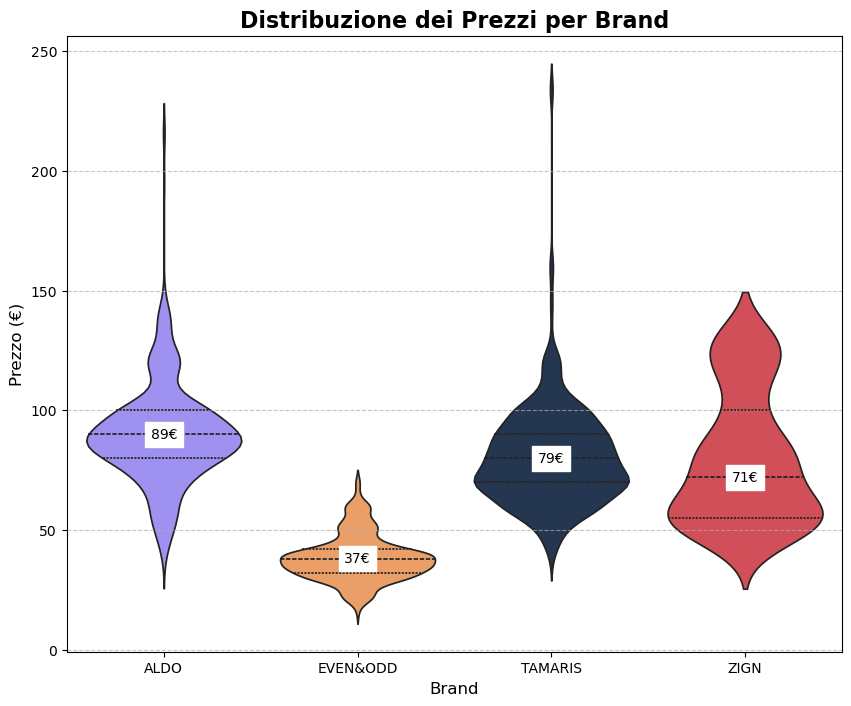

In [46]:
#Distribuzione dei Prezzi per Brand

plt.figure(figsize = (10, 8))
ordine_marche = ['ALDO', 'EVEN&ODD', 'TAMARIS', 'ZIGN']
colori_brand = ['#E63946','#FF9B54','#9381FF', '#1D3557']

sns.violinplot(data = db_scarpe, x = 'marca', y = 'prezzo_effettivo', palette = colori_brand , hue = 'marca', legend = False, inner = "quartile", order = ordine_marche )
plt.title('Distribuzione dei Prezzi per Brand', fontsize = 16, fontweight = 'bold')
plt.xlabel("Brand", fontsize = 12)
plt.ylabel("Prezzo (€)", fontsize = 12)

#calcoliamo la mediana per ogni marca
mediane = db_scarpe.groupby('marca')['prezzo_effettivo'].median()

#aggiungiamo i valori delle mediane al grafico
for i, mediana in enumerate(mediane):
    plt.text(i, mediana, f'{int(mediana)}€', ha = 'center', va = 'center', fontsize = 10, color = 'black', backgroundcolor = 'white')

plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.savefig("db_scarpe.png", dpi=300, bbox_inches='tight')  #salvataggio grafico come immagine
plt.show()

In [47]:
#mediana per ogni brand (prezzo_effettivo)
db_scarpe.groupby("marca")["prezzo_effettivo"].median()

marca
ALDO        89.95
EVEN&ODD    37.99
TAMARIS     79.95
ZIGN        71.99
Name: prezzo_effettivo, dtype: float64

In [48]:
#statistica_prezzoeffettivo
statistica_prezzoeffettivo = db_scarpe.groupby("marca")["prezzo_effettivo"].agg(["min","max","mean"])

display(statistica_prezzoeffettivo)

min     max       mean
marca                             
ALDO      37.99  215.99  89.992927
EVEN&ODD  15.99   69.99  38.393942
TAMARIS   39.88  233.89  80.673683
ZIGN      44.99  129.99  79.984444

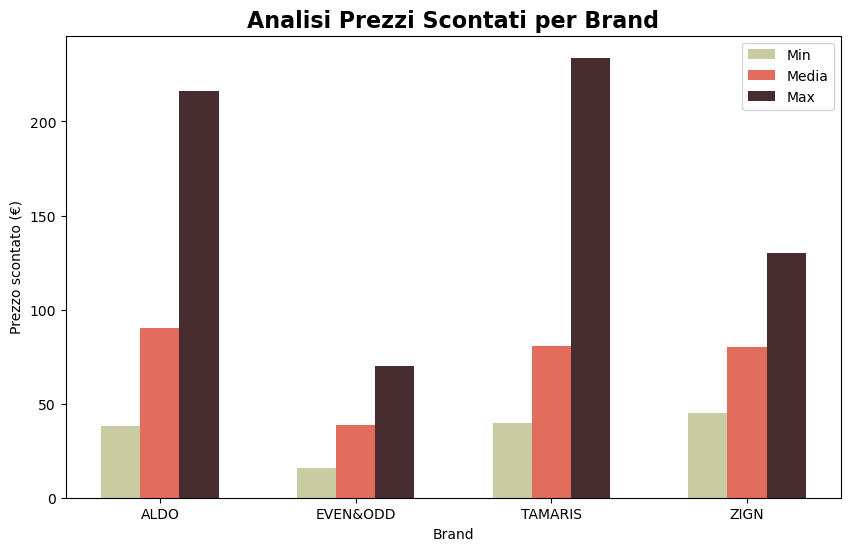

In [49]:
#Analisi Prezzi Scontati per Brand

fig, ax = plt.subplots(figsize = (10, 6))
x = np.arange(len(statistica_prezzoeffettivo.index))

ax.bar(x - 0.2, statistica_prezzoeffettivo["min"], width = 0.2, label = "Min", color = "#C9CBA3")
ax.bar(x, statistica_prezzoeffettivo["mean"], width = 0.2, label = "Media", color = "#E26D5C")
ax.bar(x + 0.2, statistica_prezzoeffettivo["max"], width = 0.2, label = "Max", color = "#472D30")
ax.set_xticks(x)
ax.set_xticklabels(statistica_prezzoeffettivo.index)
ax.set_ylabel("Prezzo scontato (€)")
ax.set_xlabel("Brand")
ax.set_title("Analisi Prezzi Scontati per Brand", fontweight = 'bold', fontsize = 16)
ax.legend()
plt.savefig("statistica_prezzoeffettivo.png", dpi = 300, bbox_inches = 'tight') #salvataggio grafico come immagine
plt.show()

In [50]:
#statistica_prezzoordinario
statistica_prezzoordinario = db_scarpe.groupby("marca")["prezzo_ordinario"].agg(["min","max","mean"])

display(statistica_prezzoordinario)

min     max        mean
marca                              
ALDO      69.95  259.95  104.369268
EVEN&ODD  21.99   69.99   48.365821
TAMARIS   49.99  233.89   90.505185
ZIGN      59.99  129.99  104.656667

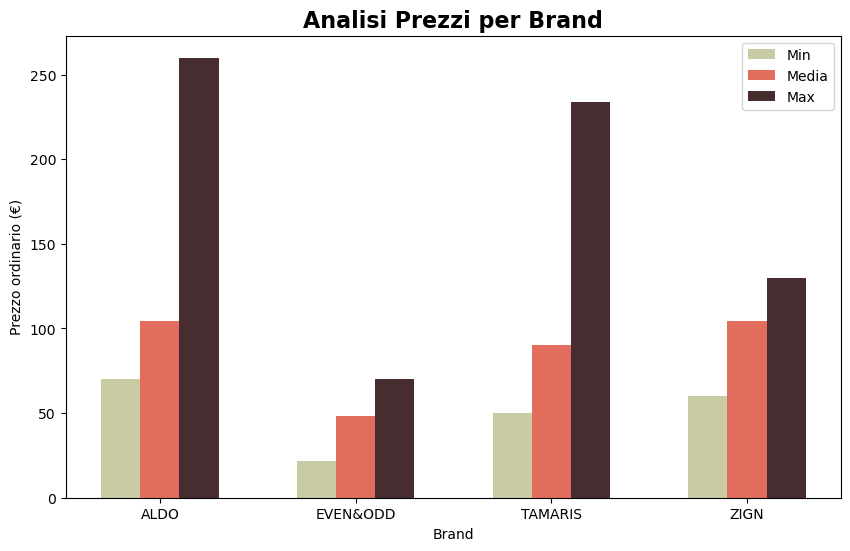

In [51]:
#Analisi Prezzi per Brand

fig, ax = plt.subplots(figsize = (10, 6))
x = np.arange(len(statistica_prezzoordinario.index))

ax.bar(x - 0.2, statistica_prezzoordinario["min"], width = 0.2, label = "Min", color = "#C9CBA3")
ax.bar(x, statistica_prezzoordinario["mean"], width = 0.2, label = "Media", color = "#E26D5C")
ax.bar(x + 0.2, statistica_prezzoordinario["max"], width = 0.2, label = "Max", color = "#472D30")
ax.set_xticks(x)
ax.set_xticklabels(statistica_prezzoordinario.index)
ax.set_ylabel("Prezzo ordinario (€)")
ax.set_xlabel("Brand")
ax.set_title("Analisi Prezzi per Brand", fontsize = 16, fontweight = 'bold')
ax.legend()
plt.savefig("statistica_prezzoordinario.png", dpi = 300, bbox_inches = 'tight') #salvataggio grafico come immagine
plt.show()

In [52]:
#statistica_taglia
statistica_taglia = db_scarpe.groupby("marca")["taglia"].agg(["min","max","mean"])

display(statistica_taglia)

min   max       mean
marca                          
ALDO      35.0  44.0  39.071138
EVEN&ODD  34.0  45.0  39.348226
TAMARIS   35.0  45.0  38.817989
ZIGN      35.0  45.0  38.966667

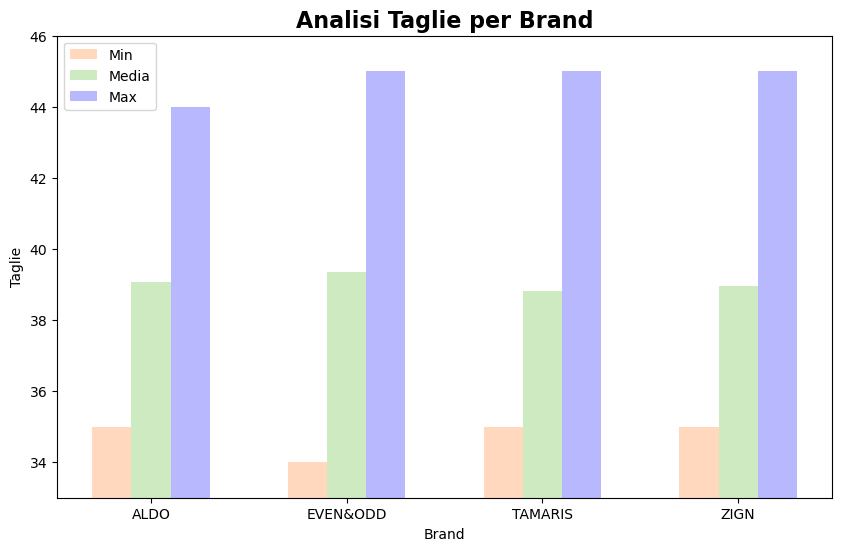

In [53]:
#Analisi Taglie per Brand

fig, ax = plt.subplots(figsize = (10, 6))
x = np.arange(len(statistica_taglia.index))

ax.bar(x - 0.2, statistica_taglia["min"], width = 0.2, label = "Min", color = "#FFD8BE")
ax.bar(x, statistica_taglia["mean"], width = 0.2, label = "Media", color = "#CDEAC0")
ax.bar(x + 0.2, statistica_taglia["max"], width = 0.2, label = "Max", color = "#B8B8FF")
ax.set_xticks(x)
ax.set_xticklabels(statistica_taglia.index)
ax.set_ylabel("Taglie")
ax.set_xlabel("Brand")
ax.set_title("Analisi Taglie per Brand", fontsize = 16, fontweight = 'bold')
ax.set_ylim(statistica_taglia["min"].min() - 1, statistica_taglia["max"].max() + 1)  #limite valori asse x
ax.legend()
plt.savefig("statistica_taglia.png", dpi = 300, bbox_inches='tight') #salvataggio grafico come immagine
plt.show()

In [54]:
#raggruppiamo per taglia e categoria e conta le taglie disponibili
analisimarchepercategoria = db_scarpe.groupby(['marca', 'categoria'])['nome_prodotto'].count()

pd.set_option('display.max_rows', None)  #mostra tutte le righe
analisimarchepercategoria.to_frame()

nome_prodotto
marca    categoria                                
ALDO     Sneakers Basse                        162
         Stivali classici                       17
         Stivali invernali                      24
         Stivali plateau                         1
         Stivali sopra il ginocchio              8
         Stivali tacco alto                     47
         Stivali texani                          3
         Tacchi alti decollete                  94
         Tacchi alti sandaletti                136
EVEN&ODD Sneakers Alte                          77
         Sneakers Basse                         90
         Stivali classici                       40
         Stivali con i tacchi                    6
         Stivali invernali                      21
         Stivali plateau                       115
         Stivali sopra il ginocchio             21
         Stivali tacco alto                    102
         Stivali texani                         40
         Tacchi alti decollete                 116
         Tacchi alti sandaletti                133
TAMARIS  Sneakers Alte                          12
         Sneakers Basse                        554
         Stivali classici                       51
         Stivali con i tacchi                    5
         Stivali invernali                     142
         Stivali plateau                        48
         Stivali sopra il ginocchio              7
         Stivali tacco alto                     18
         Stivali texani                         10
         Tacchi alti decollete                  33
         Tacchi alti sandaletti                 65
ZIGN     Stivali classici                       35
         Stivali con i tacchi                   13
         Stivali invernali                      37
         Stivali plateau                        27
         Stivali tacco alto                     35
         Stivali texani                         13
         Tacchi alti decollete                  19
         Tacchi alti sandaletti                  1

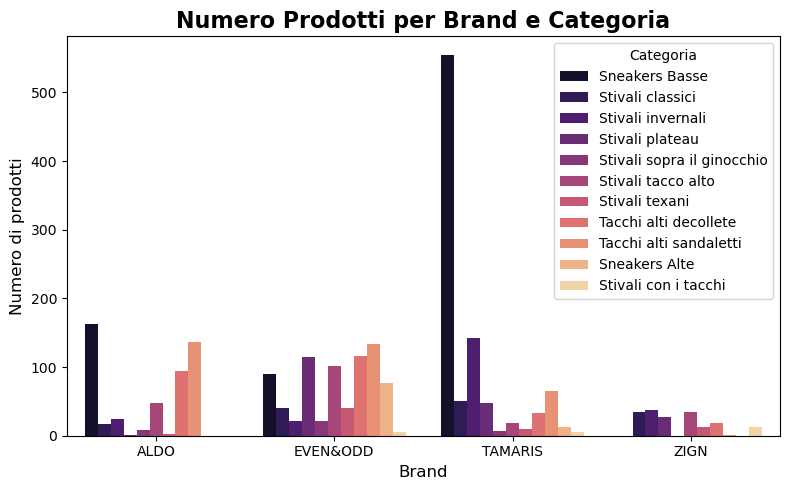

In [55]:
#Numero Prodotti per Brand e Categoria

df = analisimarchepercategoria.reset_index()
df.columns = ['marca', 'categoria', 'conteggio']
plt.figure(figsize = (8, 5))
sns.barplot(data = df, x = 'marca', y = 'conteggio', hue = 'categoria', palette = 'magma', estimator = sum)
plt.title('Numero Prodotti per Brand e Categoria', fontsize = 16, fontweight = 'bold')
plt.xlabel('Brand', fontsize = 12)
plt.ylabel('Numero di prodotti', fontsize = 12)
plt.xticks(rotation = 0)
plt.legend(title = 'Categoria')
plt.tight_layout()
plt.savefig("df.png", dpi = 300, bbox_inches ='tight') #salvataggio grafico come immagine
plt.show()

In [56]:
#raggruppiamo per categoria e otteniamo i colori unici come stringa separata da virgole
analisimarchepercategorie = db_scarpe.groupby('categoria')['marca'].apply(lambda x: ", ".join(sorted(set(x)))).reset_index()

pd.set_option('display.max_colwidth', None)  # Disabilita il troncamento
analisimarchepercategorie

categoria                          marca
0                Sneakers Alte              EVEN&ODD, TAMARIS
1               Sneakers Basse        ALDO, EVEN&ODD, TAMARIS
2             Stivali classici  ALDO, EVEN&ODD, TAMARIS, ZIGN
3         Stivali con i tacchi        EVEN&ODD, TAMARIS, ZIGN
4            Stivali invernali  ALDO, EVEN&ODD, TAMARIS, ZIGN
5              Stivali plateau  ALDO, EVEN&ODD, TAMARIS, ZIGN
6   Stivali sopra il ginocchio        ALDO, EVEN&ODD, TAMARIS
7           Stivali tacco alto  ALDO, EVEN&ODD, TAMARIS, ZIGN
8               Stivali texani  ALDO, EVEN&ODD, TAMARIS, ZIGN
9        Tacchi alti decollete  ALDO, EVEN&ODD, TAMARIS, ZIGN
10      Tacchi alti sandaletti  ALDO, EVEN&ODD, TAMARIS, ZIGN

In [57]:
#raggruppiamo per marca e contiamo le categorie uniche
analisicategoriepermarca = db_scarpe.groupby('marca')['categoria'].nunique().reset_index()
analisicategoriepermarca.columns = ['marca', 'conteggio_categorie']

print(analisicategoriepermarca.to_string(index = False))

   marca  conteggio_categorie
    ALDO                    9
EVEN&ODD                   11
 TAMARIS                   11
    ZIGN                    8


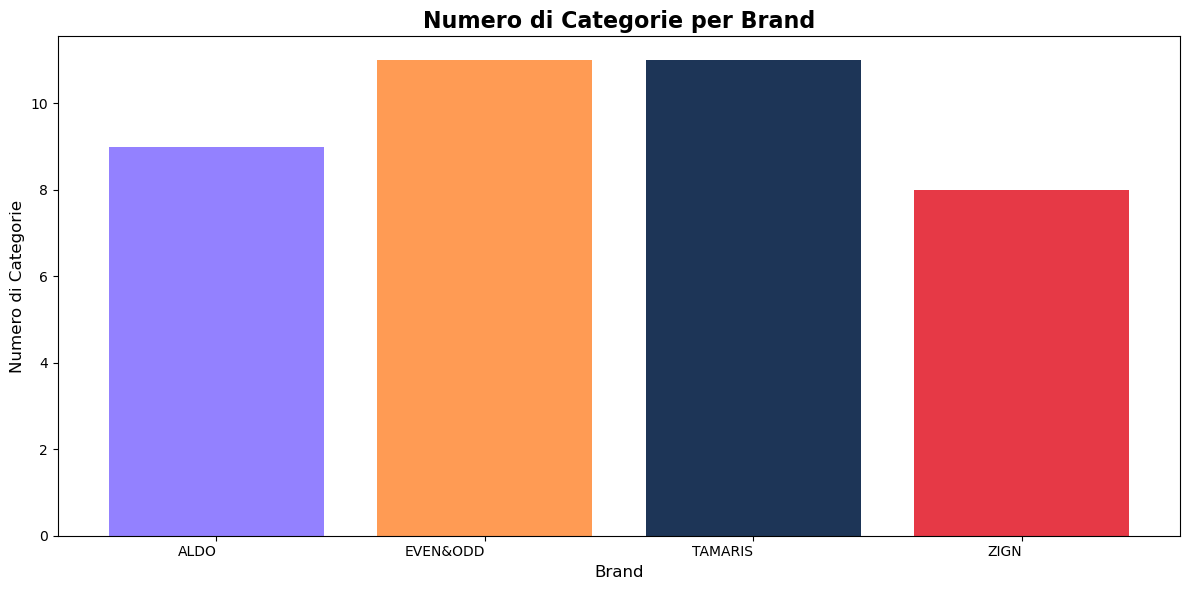

In [58]:
#Numero di Categorie per Brand

colori_brand = ['#9381FF', '#FF9B54' , '#1D3557', '#E63946'] #creo palette di colori 
plt.figure(figsize = (12, 6))
plt.bar(analisicategoriepermarca['marca'], analisicategoriepermarca['conteggio_categorie'], color = colori_brand)
plt.title('Numero di Categorie per Brand', fontsize = 16, fontweight = 'bold')
plt.xlabel('Brand', fontsize = 12)
plt.ylabel('Numero di Categorie', fontsize = 12)
plt.xticks( ha = 'right')
plt.tight_layout()
plt.savefig("analisicategoriepermarca.png", dpi = 300, bbox_inches = 'tight') #salvataggio grafico come immagine
plt.show()

# ANALISI SUI PRODOTTI

## Obiettivo: Analizziamo la distribuzione dei prodotti per ogni categoria in azienda.

### ALDO

In [62]:
#raggruppiamo per categoria e ottenere il numero di prodotti per categoria
analisiprodottialdopercategoria = db_aldo.groupby('categoria')['nome_prodotto'].count()
analisiprodottialdopercategoria = analisiprodottialdopercategoria.to_frame().reset_index()

analisiprodottialdopercategoria

categoria  nome_prodotto
0              Sneakers Basse            162
1            Stivali classici             17
2           Stivali invernali             24
3             Stivali plateau              1
4  Stivali sopra il ginocchio              8
5          Stivali tacco alto             47
6              Stivali texani              3
7       Tacchi alti decollete             94
8      Tacchi alti sandaletti            136

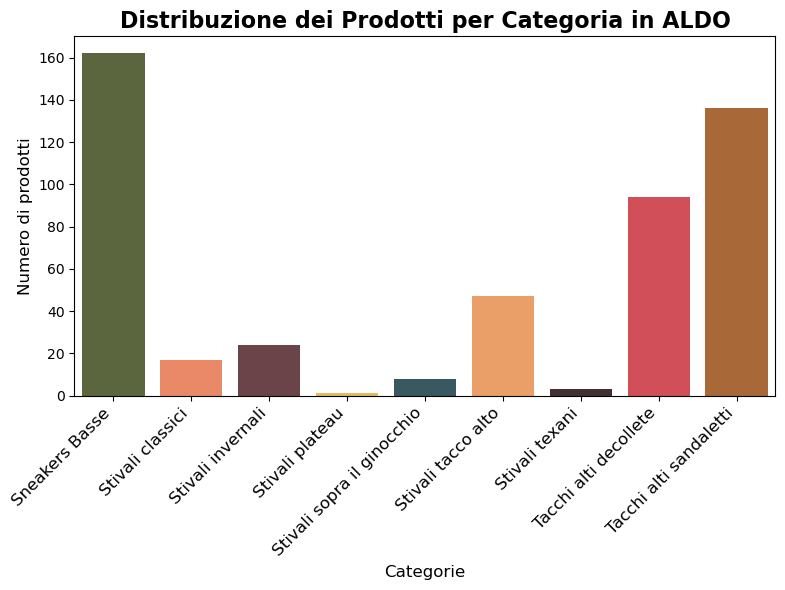

In [63]:
#Distribuzione dei Prodotti per Categoria in ALDO

analisiprodottialdopercategoria.columns = ['Categoria', 'Numero di prodotti']
palette_aldo = ['#606C38', '#FF7F51', '#723D46', '#FCBF49', '#335C67', '#FF9B54', '#472D30', '#E63946', '#BC6525'] #palette_aldo
    
plt.figure(figsize = (8, 6))
sns.barplot(data = analisiprodottialdopercategoria, x = 'Categoria', y = 'Numero di prodotti', hue = 'Categoria', legend = False, palette = palette_aldo)
plt.xlabel('Categorie', fontsize = 12)
plt.ylabel('Numero di prodotti', fontsize = 12)
plt.title('Distribuzione dei Prodotti per Categoria in ALDO', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)
plt.tight_layout()
plt.savefig("analisiprodottialdopercategoria.png", dpi = 300, bbox_inches = 'tight')  #salvataggio immagine come grafico
plt.show()

### EVEN&ODD

In [65]:
#raggruppiamo per categoria e ottenere il numero di prodotti per categoria
analisiprodottievenpercategoria = db_even.groupby('categoria')['nome_prodotto'].count()
analisiprodottievenpercategoria = analisiprodottievenpercategoria.to_frame().reset_index()

analisiprodottievenpercategoria

categoria  nome_prodotto
0                Sneakers Alte             77
1               Sneakers Basse             90
2             Stivali classici             40
3         Stivali con i tacchi              6
4            Stivali invernali             21
5              Stivali plateau            115
6   Stivali sopra il ginocchio             21
7           Stivali tacco alto            102
8               Stivali texani             40
9        Tacchi alti decollete            116
10      Tacchi alti sandaletti            133

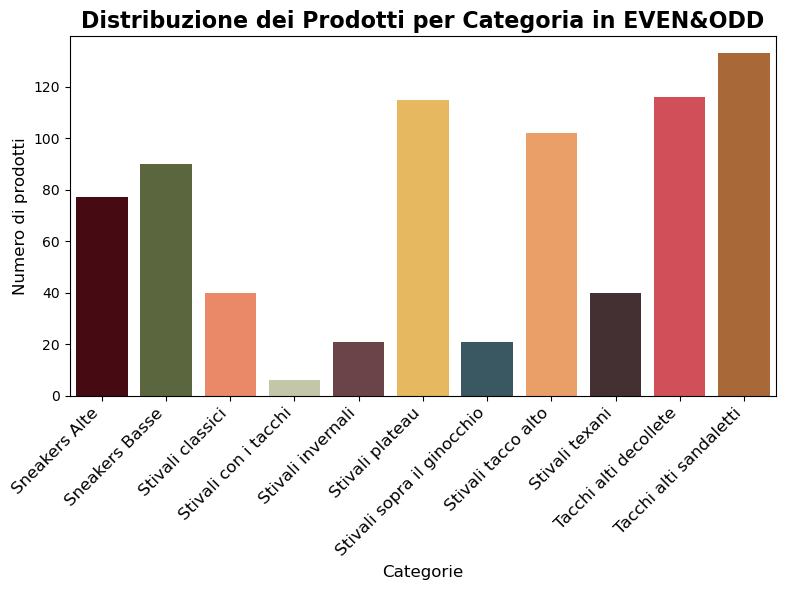

In [66]:
#Distribuzione dei Prodotti per Categoria in EVEN&ODD

analisiprodottievenpercategoria.columns = ['Categoria', 'Numero di prodotti']
palette_even = ['#4F000B','#606C38', '#FF7F51', '#C9CBA3', '#723D46', '#FCBF49', '#335C67', '#FF9B54', '#472D30', '#E63946', '#BC6525'] #palette EVEN&ODD
    
plt.figure(figsize = (8, 6))
sns.barplot(data = analisiprodottievenpercategoria, x = 'Categoria', y = 'Numero di prodotti', hue = 'Categoria', legend = False, palette = palette_even)
plt.xlabel('Categorie', fontsize = 12)
plt.ylabel('Numero di prodotti', fontsize = 12)
plt.title('Distribuzione dei Prodotti per Categoria in EVEN&ODD', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)
plt.tight_layout()
plt.savefig("analisiprodottievenpercategoria.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

### TAMARIS

In [68]:
#raggruppiamo per categoria e ottenere il numero di prodotti per categoria
analisiprodottitamarispercategoria = db_tamaris.groupby('categoria')['nome_prodotto'].count()
analisiprodottitamarispercategoria = analisiprodottitamarispercategoria.to_frame().reset_index()

analisiprodottitamarispercategoria

categoria  nome_prodotto
0                Sneakers Alte             12
1               Sneakers Basse            554
2             Stivali classici             51
3         Stivali con i tacchi              5
4            Stivali invernali            142
5              Stivali plateau             48
6   Stivali sopra il ginocchio              7
7           Stivali tacco alto             18
8               Stivali texani             10
9        Tacchi alti decollete             33
10      Tacchi alti sandaletti             65

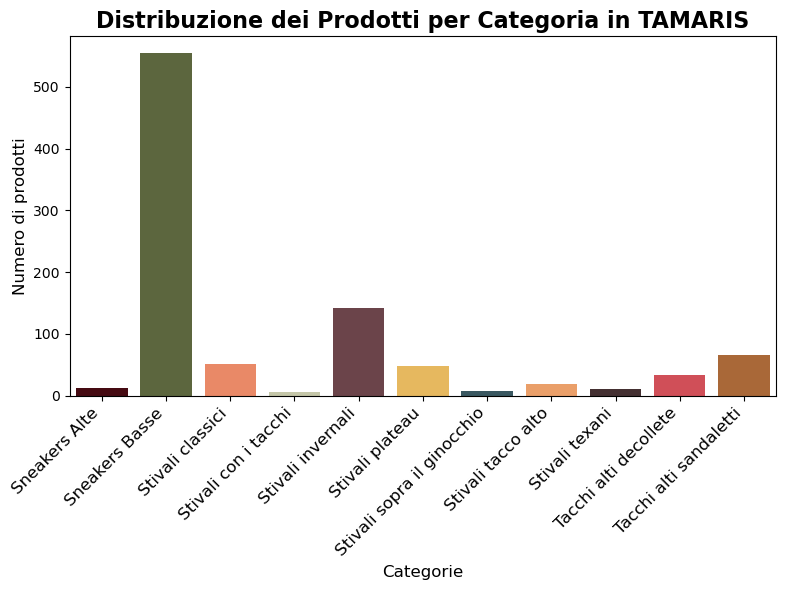

In [69]:
#Distribuzione dei Prodotti per Categoria in TAMARIS

analisiprodottitamarispercategoria.columns = ['Categoria', 'Numero di prodotti']
palette_tamaris = ['#4F000B','#606C38', '#FF7F51', '#C9CBA3', '#723D46', '#FCBF49', '#335C67', '#FF9B54', '#472D30', '#E63946', '#BC6525'] #palette TAMARIS

plt.figure(figsize = (8, 6))
sns.barplot(data = analisiprodottitamarispercategoria, x = 'Categoria', y = 'Numero di prodotti', hue = 'Categoria', legend = False, palette = palette_tamaris)
plt.xlabel('Categorie', fontsize = 12)
plt.ylabel('Numero di prodotti', fontsize = 12)
plt.title('Distribuzione dei Prodotti per Categoria in TAMARIS', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)
plt.tight_layout()
plt.savefig("analisiprodottitamarispercategoria.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

### ZIGN

In [71]:
##raggruppiamo per categoria e ottenere il numero di prodotti per categoria
analisiprodottizignpercategoria = db_zign.groupby('categoria')['nome_prodotto'].count()
analisiprodottizignpercategoria = analisiprodottizignpercategoria.to_frame().reset_index()

analisiprodottizignpercategoria

categoria  nome_prodotto
0        Stivali classici             35
1    Stivali con i tacchi             13
2       Stivali invernali             37
3         Stivali plateau             27
4      Stivali tacco alto             35
5          Stivali texani             13
6   Tacchi alti decollete             19
7  Tacchi alti sandaletti              1

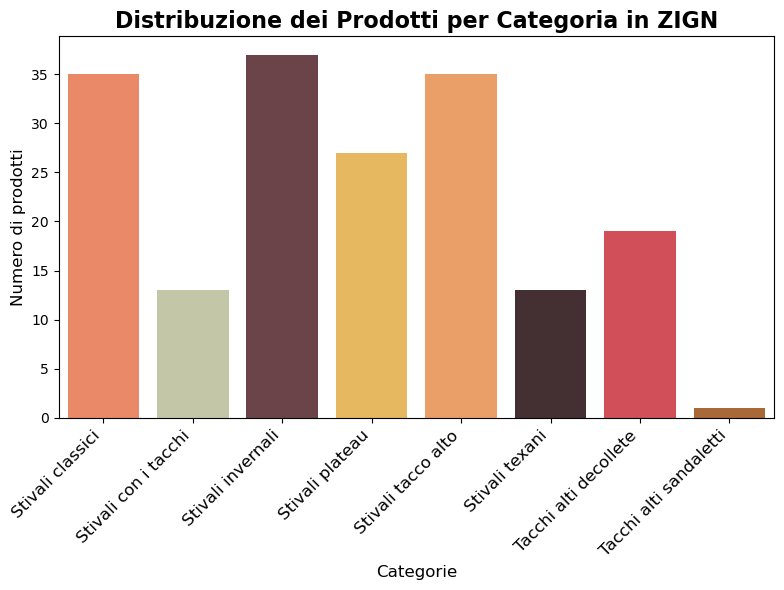

In [72]:
#Distribuzione dei Prodotti per Categoria in ZIGN

analisiprodottizignpercategoria.columns = ['Categoria', 'Numero di prodotti']
palette_zign = ['#FF7F51', '#C9CBA3', '#723D46', '#FCBF49', '#FF9B54', '#472D30', '#E63946', '#BC6525'] #palette ZIGN

plt.figure(figsize = (8, 6))
sns.barplot(data = analisiprodottizignpercategoria, x = 'Categoria', y = 'Numero di prodotti', hue = 'Categoria', legend = False, palette = palette_zign)
plt.xlabel('Categorie', fontsize = 12)
plt.ylabel('Numero di prodotti', fontsize = 12)
plt.title('Distribuzione dei Prodotti per Categoria in ZIGN', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)          
plt.tight_layout()
plt.savefig("analisiprodottizignpercategoria.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

### COMPLESSIVA

In [74]:
#contiamo il numero di prodotti di ogni brand
numeroprodottiperbrand = db_scarpe.groupby("marca")["nome_prodotto"].count()

numeroprodottiperbrand.to_frame()

nome_prodotto
marca                  
ALDO                492
EVEN&ODD            761
TAMARIS             945
ZIGN                180

# ANALISI SUI PREZZI

## Obiettivo: Analizziamo i prezzi medi, minimi e massimi per ogni categoria di ogni azienda

### ALDO

In [78]:
#min, max, mean prezziscontatialdo
prezziscontatialdo = db_aldo.groupby('categoria')['prezzo_effettivo'].agg(["min","max","mean"]).round(2)
display(prezziscontatialdo)

min     max    mean
categoria                                         
Sneakers Basse               42.48  119.99   84.77
Stivali classici             65.99  215.99  105.40
Stivali invernali            59.99  119.99   83.73
Stivali plateau             118.99  118.99  118.99
Stivali sopra il ginocchio   81.99  194.96  120.86
Stivali tacco alto           48.99  215.99   94.07
Stivali texani              136.99  136.99  136.99
Tacchi alti decollete        53.99  139.99   90.26
Tacchi alti sandaletti       37.99  149.95   90.74

In [79]:
#min, max, mean prezzialdo
prezzialdo = db_aldo.groupby('categoria')['prezzo_ordinario'].agg(["min","max","mean"]).round(2)
display(prezzialdo)

min     max    mean
categoria                                         
Sneakers Basse               69.99  129.99   89.36
Stivali classici            119.99  239.99  179.39
Stivali invernali            69.99  119.99  100.61
Stivali plateau             139.99  139.99  139.99
Stivali sopra il ginocchio  149.99  259.95  213.74
Stivali tacco alto           69.99  249.99  137.74
Stivali texani              249.99  249.99  249.99
Tacchi alti decollete        79.99  149.99   94.29
Tacchi alti sandaletti       69.95  199.99   99.06

In [80]:
print("Il prezzo scontato più basso del brand ALDO:", db_aldo['prezzo_effettivo'].min())
print("\nIl prezzo scontato più alto del brand ALDO:", db_aldo['prezzo_effettivo'].max())
print("\nIl prezzo medio scontato del brand ALDO:", db_aldo['prezzo_effettivo'].mean().round(2))

Il prezzo scontato più basso del brand ALDO: 37.99

Il prezzo scontato più alto del brand ALDO: 215.99

Il prezzo medio scontato del brand ALDO: 89.99


In [81]:
print("Il prezzo più basso del brand ALDO:", db_aldo['prezzo_ordinario'].min())
print("\nIl prezzo più alto del brand ALDO:", db_aldo['prezzo_ordinario'].max())
print("\nIl prezzo medio del brand ALDO:", db_aldo['prezzo_ordinario'].mean().round(2))

Il prezzo più basso del brand ALDO: 69.95

Il prezzo più alto del brand ALDO: 259.95

Il prezzo medio del brand ALDO: 104.37


In [82]:
#calcoliamo lo sconto percentuale per ogni prodotto (nuova colonna che aggiunge lo sconto)
db_aldo['sconto_percentuale'] = (((db_aldo['prezzo_ordinario'] - db_aldo['prezzo_effettivo']) / db_aldo['prezzo_ordinario']) * 100).round(2)

In [83]:
#raggruppiamo per categoria e calcoliamo le statistiche dello sconto in percentuale
scontialdopercategoria = db_aldo.groupby('categoria')['sconto_percentuale'].agg(sconto_minimo = 'min',sconto_massimo = 'max',sconto_medio = 'mean').round(2)

scontialdopercategoria

sconto_minimo  sconto_massimo  sconto_medio
categoria                                                              
Sneakers Basse                        0.0           49.99          5.08
Stivali classici                     10.0           45.34         42.16
Stivali invernali                     0.0           50.00         14.58
Stivali plateau                      15.0           15.00         15.00
Stivali sopra il ginocchio           25.0           50.00         43.79
Stivali tacco alto                    0.0           50.00         27.50
Stivali texani                       45.2           45.20         45.20
Tacchi alti decollete                 0.0           40.00          3.62
Tacchi alti sandaletti                0.0           50.01          7.00

In [84]:
print("Lo sconto minimo del brand ALDO:",db_aldo['sconto_percentuale'].min())
print("\nLo sconto massimo del brand ALDO:",db_aldo['sconto_percentuale'].max())
print("\nLo sconto medio del brand ALDO:",db_aldo['sconto_percentuale'].mean().round(2))

Lo sconto minimo del brand ALDO: 0.0

Lo sconto massimo del brand ALDO: 50.01

Lo sconto medio del brand ALDO: 10.11


### EVEN&ODD

In [86]:
#min, max, mean prezziscontatieven
prezziscontatieven = db_even.groupby('categoria')['prezzo_effettivo'].agg(["min","max","mean"]).round(2)
display(prezziscontatieven)

min    max   mean
categoria                                      
Sneakers Alte               21.09  34.99  29.82
Sneakers Basse              15.99  49.99  34.09
Stivali classici            31.99  58.99  44.25
Stivali con i tacchi        45.49  58.99  47.74
Stivali invernali           31.69  42.49  35.31
Stivali plateau             29.99  69.99  47.30
Stivali sopra il ginocchio  33.19  59.99  41.45
Stivali tacco alto          26.99  59.99  39.71
Stivali texani              29.99  69.99  40.13
Tacchi alti decollete       23.99  44.99  35.52
Tacchi alti sandaletti      21.99  49.99  37.37

In [87]:
#min, max, mean prezzieven
prezzieven = db_even.groupby('categoria')['prezzo_ordinario'].agg(["min","max","mean"]).round(2)
display(prezzieven)

min    max   mean
categoria                                      
Sneakers Alte               29.99  44.99  33.82
Sneakers Basse              21.99  49.99  36.42
Stivali classici            64.99  69.99  67.86
Stivali con i tacchi        64.99  69.99  65.82
Stivali invernali           44.99  64.99  54.04
Stivali plateau             44.99  69.99  58.69
Stivali sopra il ginocchio  54.99  69.99  64.99
Stivali tacco alto          39.99  69.99  57.49
Stivali texani              54.99  69.99  62.36
Tacchi alti decollete       34.99  49.99  40.42
Tacchi alti sandaletti      39.99  49.99  41.49

In [88]:
print("Il prezzo scontato più basso del brand EVEN&ODD:", db_even['prezzo_effettivo'].min())
print("\nIl prezzo scontato più alto del brand EVEN&ODD:", db_even['prezzo_effettivo'].max())
print("\nIl prezzo medio scontato del brand EVEN&ODD:", db_even['prezzo_effettivo'].mean().round(2))

Il prezzo scontato più basso del brand EVEN&ODD: 15.99

Il prezzo scontato più alto del brand EVEN&ODD: 69.99

Il prezzo medio scontato del brand EVEN&ODD: 38.39


In [89]:
print("Il prezzo più basso del brand EVEN&ODDO:", db_even['prezzo_ordinario'].min())
print("\nIl prezzo più alto del brand EVEN&ODD:", db_even['prezzo_ordinario'].max())
print("\nIl prezzo medio del brand EVEN&ODD:", db_even['prezzo_ordinario'].mean().round(2))

Il prezzo più basso del brand EVEN&ODDO: 21.99

Il prezzo più alto del brand EVEN&ODD: 69.99

Il prezzo medio del brand EVEN&ODD: 48.37


In [90]:
#calcoliamo lo sconto percentuale per ogni prodotto (nuova colonna che aggiunge lo sconto)
db_even['sconto_percentuale'] = (((db_even['prezzo_ordinario'] - db_even['prezzo_effettivo']) / db_even['prezzo_ordinario']) * 100).round(2)

In [91]:
#raggruppiamo per categoria e calcoliamo le statistiche dello sconto in percentuale
scontievenpercategoria = db_even.groupby('categoria')['sconto_percentuale'].agg(sconto_minimo = 'min',sconto_massimo = 'max',sconto_medio = 'mean').round(2)

scontievenpercategoria

sconto_minimo  sconto_massimo  sconto_medio
categoria                                                              
Sneakers Alte                        0.00           45.01         11.66
Sneakers Basse                       0.00           46.68          6.24
Stivali classici                    14.62           50.78         34.90
Stivali con i tacchi                15.72           30.00         27.62
Stivali invernali                   29.56           45.01         33.91
Stivali plateau                      0.00           50.01         19.42
Stivali sopra il ginocchio           0.00           45.72         35.77
Stivali tacco alto                   0.00           50.78         30.25
Stivali texani                       0.00           50.01         36.49
Tacchi alti decollete                0.00           40.01         10.93
Tacchi alti sandaletti               0.00           45.01          9.97

In [92]:
print("Lo sconto minimo del brand EVEN&ODD:",db_even['sconto_percentuale'].min())
print("\nLo sconto massimo del brand EVEN&ODDO:",db_even['sconto_percentuale'].max())
print("\nLo sconto medio del brand EVEN&ODD:",db_even['sconto_percentuale'].mean().round(2))

Lo sconto minimo del brand EVEN&ODD: 0.0

Lo sconto massimo del brand EVEN&ODDO: 50.78

Lo sconto medio del brand EVEN&ODD: 18.21


### TAMARIS

In [94]:
#min, max, mean prezziscontatitamaris
prezziscontatitamaris = db_tamaris.groupby('categoria')['prezzo_effettivo'].agg(["min","max","mean"]).round(2)
display(prezziscontatitamaris)

min     max    mean
categoria                                        
Sneakers Alte               48.97  120.89   77.29
Sneakers Basse              44.99  109.95   78.01
Stivali classici            54.99  233.89  106.23
Stivali con i tacchi        81.99   81.99   81.99
Stivali invernali           39.99  149.95   86.29
Stivali plateau             55.97  159.95   91.02
Stivali sopra il ginocchio  75.95   75.95   75.95
Stivali tacco alto          59.99   99.95   76.01
Stivali texani              59.99  119.99   70.97
Tacchi alti decollete       59.99   89.95   72.98
Tacchi alti sandaletti      39.88  127.00   71.17

In [95]:
#min, max, mean prezzitamaris
prezzitamaris = db_tamaris.groupby('categoria')['prezzo_ordinario'].agg(["min","max","mean"]).round(2)
display(prezzitamaris)

min     max    mean
categoria                                         
Sneakers Alte                69.95  120.89   99.37
Sneakers Basse               49.99  109.95   80.92
Stivali classici             89.95  233.89  133.49
Stivali con i tacchi        149.99  149.99  149.99
Stivali invernali            79.95  149.95  111.37
Stivali plateau              79.95  159.95  116.40
Stivali sopra il ginocchio   99.95   99.95   99.95
Stivali tacco alto           69.95  119.95   94.12
Stivali texani               89.95  119.99  100.97
Tacchi alti decollete        59.99   89.95   73.46
Tacchi alti sandaletti       59.95  127.00   72.57

In [96]:
print("Il prezzo scontato più basso del brand TAMARIS:", db_tamaris['prezzo_effettivo'].min())
print("\nIl prezzo scontato più alto del brand TAMARIS:", db_tamaris['prezzo_effettivo'].max())
print("\nIl prezzo medio scontato del brand TAMARIS:", db_tamaris['prezzo_effettivo'].mean().round(2))

Il prezzo scontato più basso del brand TAMARIS: 39.88

Il prezzo scontato più alto del brand TAMARIS: 233.89

Il prezzo medio scontato del brand TAMARIS: 80.67


In [97]:
print("Il prezzo più basso del brand TAMARIS:", db_tamaris['prezzo_ordinario'].min())
print("\nIl prezzo più alto del brand TAMARIS:", db_tamaris['prezzo_ordinario'].max())
print("\nIl prezzo medio del brand TAMARIS:", db_tamaris['prezzo_ordinario'].mean().round(2))

Il prezzo più basso del brand TAMARIS: 49.99

Il prezzo più alto del brand TAMARIS: 233.89

Il prezzo medio del brand TAMARIS: 90.51


In [98]:
#calcoliamo lo sconto percentuale per ogni prodotto (nuova colonna che aggiunge lo sconto)
db_tamaris['sconto_percentuale'] = (((db_tamaris['prezzo_ordinario'] - db_tamaris['prezzo_effettivo']) / db_tamaris['prezzo_ordinario']) * 100).round(2)

In [99]:
#raggruppiamo per categoria e calcoliamo le statistiche dello sconto in percentuale
scontitamarispercategoria = db_tamaris.groupby('categoria')['sconto_percentuale'].agg(sconto_minimo = 'min',sconto_massimo = 'max',sconto_medio = 'mean').round(2)

scontitamarispercategoria

sconto_minimo  sconto_massimo  sconto_medio
categoria                                                              
Sneakers Alte                        0.00           45.56         23.94
Sneakers Basse                       0.00           50.01          3.19
Stivali classici                     0.00           50.40         21.83
Stivali con i tacchi                45.34           45.34         45.34
Stivali invernali                    0.00           50.01         22.43
Stivali plateau                      0.00           40.00         22.94
Stivali sopra il ginocchio          24.01           24.01         24.01
Stivali tacco alto                   0.00           45.46         16.52
Stivali texani                       0.00           45.46         29.30
Tacchi alti decollete                0.00           18.73          0.57
Tacchi alti sandaletti               0.00           42.99          1.95

In [100]:
print("Lo sconto minimo del brand TAMARIS:",db_tamaris['sconto_percentuale'].min())
print("\nLo sconto massimo del brand TAMARIS:",db_tamaris['sconto_percentuale'].max())
print("\nLo sconto medio del brand TAMARIS:",db_tamaris['sconto_percentuale'].mean().round(2))

Lo sconto minimo del brand TAMARIS: 0.0

Lo sconto massimo del brand TAMARIS: 50.4

Lo sconto medio del brand TAMARIS: 9.08


### ZIGN

In [102]:
#min, max, mean prezziscontatizign
prezziscontatizign = db_zign.groupby('categoria')['prezzo_effettivo'].agg(["min","max","mean"]).round(2)
display(prezziscontatizign)

min     max    mean
categoria                                    
Stivali classici        65.99  129.99  102.73
Stivali con i tacchi    81.99   84.99   82.68
Stivali invernali       49.99   99.99   59.58
Stivali plateau         68.99  119.99   94.29
Stivali tacco alto      48.99  129.99   81.13
Stivali texani          54.99  129.99   73.61
Tacchi alti decollete   44.99   69.99   58.41
Tacchi alti sandaletti  69.99   69.99   69.99

In [103]:
#min, max, mean prezzizign
prezzizign = db_zign.groupby('categoria')['prezzo_ordinario'].agg(["min","max","mean"]).round(2)
display(prezzizign)

min     max    mean
categoria                                    
Stivali classici        99.99  129.99  121.42
Stivali con i tacchi    99.99  109.99  107.68
Stivali invernali       99.99  119.99  103.23
Stivali plateau         89.99  119.99  109.06
Stivali tacco alto      79.99  129.99  106.28
Stivali texani          99.99  129.99  106.91
Tacchi alti decollete   59.99   79.99   65.52
Tacchi alti sandaletti  69.99   69.99   69.99

In [104]:
print("Il prezzo scontato più basso del brand ZIGN:", db_zign['prezzo_effettivo'].min())
print("\nIl prezzo scontato più alto del brand ZIGN:", db_zign['prezzo_effettivo'].max())
print("\nIl prezzo medio scontato del brand ZIGN:", db_zign['prezzo_effettivo'].mean().round(2))

Il prezzo scontato più basso del brand ZIGN: 44.99

Il prezzo scontato più alto del brand ZIGN: 129.99

Il prezzo medio scontato del brand ZIGN: 79.98


In [105]:
print("Il prezzo più basso del brand ZIGN:", db_zign['prezzo_ordinario'].min())
print("\nIl prezzo più alto del brand ZIGN:", db_zign['prezzo_ordinario'].max())
print("\nIl prezzo medio del brand ZIGN:", db_zign['prezzo_ordinario'].mean().round(2))

Il prezzo più basso del brand ZIGN: 59.99

Il prezzo più alto del brand ZIGN: 129.99

Il prezzo medio del brand ZIGN: 104.66


In [106]:
#calcoliamo lo sconto percentuale per ogni prodotto (nuova colonna che aggiunge lo sconto)
db_zign['sconto_percentuale'] = (((db_zign['prezzo_ordinario'] - db_zign['prezzo_effettivo']) / db_zign['prezzo_ordinario']) * 100).round(2)

In [107]:
#raggruppiamo per categoria e calcoliamo le statistiche dello sconto in percentuale
scontizignpercategoria = db_zign.groupby('categoria')['sconto_percentuale'].agg(sconto_minimo = 'min',sconto_massimo = 'max',sconto_medio = 'mean').round(2)

scontizignpercategoria

sconto_minimo  sconto_massimo  sconto_medio
categoria                                                          
Stivali classici                  0.0           45.39         15.56
Stivali con i tacchi             15.0           25.46         23.05
Stivali invernali                 0.0           50.01         42.03
Stivali plateau                   0.0           40.00         13.52
Stivali tacco alto                0.0           45.56         25.83
Stivali texani                    0.0           45.39         31.21
Tacchi alti decollete             0.0           40.01          9.59
Tacchi alti sandaletti            0.0            0.00          0.00

In [108]:
print("Lo sconto minimo del brand ZIGN:",db_zign['sconto_percentuale'].min())
print("\nLo sconto massimo del brand ZIGN:",db_zign['sconto_percentuale'].max())
print("\nLo sconto medio del brand ZIGN:",db_zign['sconto_percentuale'].mean().round(2))

Lo sconto minimo del brand ZIGN: 0.0

Lo sconto massimo del brand ZIGN: 50.01

Lo sconto medio del brand ZIGN: 23.65


### COMPLESSIVA SCONTI

In [110]:
#calcoliamo lo sconto percentuale per ogni prodotto in tutti i brand (db_scarpe)
db_scarpe['sconto_percentuale'] = ((db_scarpe['prezzo_ordinario'] - db_scarpe['prezzo_effettivo']) / db_scarpe['prezzo_ordinario']) * 100

#raggruppiamo per brand e calcoliamo le statistiche
sconti_per_brand = db_scarpe.groupby('marca')['sconto_percentuale'].agg(['min', 'max', 'mean','median']).round(2).reset_index()

sconti_per_brand

marca  min    max   mean  median
0      ALDO  0.0  50.01  10.11    0.00
1  EVEN&ODD  0.0  50.78  18.21   15.00
2   TAMARIS  0.0  50.40   9.08    0.00
3      ZIGN  0.0  50.01  23.65   25.46

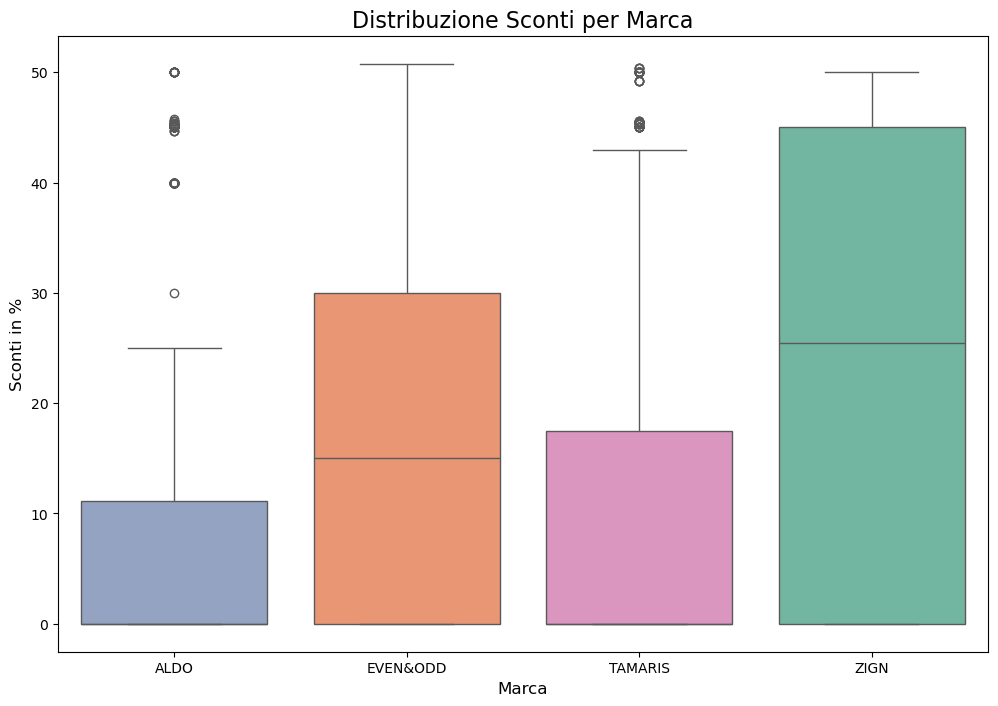

In [111]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = db_scarpe, x = 'marca', y = 'sconto_percentuale', palette = 'Set2', hue = 'marca', legend = False, order = sconti_per_brand['marca'])
plt.title('Distribuzione Sconti per Marca', fontsize = 16)
plt.xlabel("Marca", fontsize = 12)
plt.ylabel("Sconti in %", fontsize = 12)
plt.xticks(rotation = 0)
plt.show()

In [112]:
#raggruppiamo per brand e categoria e calcoliamo le statistiche
sconti_per_brandcategoria = db_scarpe.groupby(['marca','categoria'])['sconto_percentuale'].mean(2).round(2).reset_index()

sconti_per_brandcategoria.columns = ['marca', 'categoria', 'sconto_percentuale_medio']  #assegno un nome alle colonne

sconti_per_brandcategoria

marca                   categoria  sconto_percentuale_medio
0       ALDO              Sneakers Basse                      5.08
1       ALDO            Stivali classici                     42.16
2       ALDO           Stivali invernali                     14.58
3       ALDO             Stivali plateau                     15.00
4       ALDO  Stivali sopra il ginocchio                     43.79
5       ALDO          Stivali tacco alto                     27.50
6       ALDO              Stivali texani                     45.20
7       ALDO       Tacchi alti decollete                      3.62
8       ALDO      Tacchi alti sandaletti                      7.00
9   EVEN&ODD               Sneakers Alte                     11.66
10  EVEN&ODD              Sneakers Basse                      6.24
11  EVEN&ODD            Stivali classici                     34.90
12  EVEN&ODD        Stivali con i tacchi                     27.62
13  EVEN&ODD           Stivali invernali                     33.91
14  EVEN&ODD             Stivali plateau                     19.43
15  EVEN&ODD  Stivali sopra il ginocchio                     35.77
16  EVEN&ODD          Stivali tacco alto                     30.25
17  EVEN&ODD              Stivali texani                     36.49
18  EVEN&ODD       Tacchi alti decollete                     10.93
19  EVEN&ODD      Tacchi alti sandaletti                      9.97
20   TAMARIS               Sneakers Alte                     23.94
21   TAMARIS              Sneakers Basse                      3.19
22   TAMARIS            Stivali classici                     21.83
23   TAMARIS        Stivali con i tacchi                     45.34
24   TAMARIS           Stivali invernali                     22.43
25   TAMARIS             Stivali plateau                     22.94
26   TAMARIS  Stivali sopra il ginocchio                     24.01
27   TAMARIS          Stivali tacco alto                     16.52
28   TAMARIS              Stivali texani                     29.30
29   TAMARIS       Tacchi alti decollete                      0.57
30   TAMARIS      Tacchi alti sandaletti                      1.95
31      ZIGN            Stivali classici                     15.56
32      ZIGN        Stivali con i tacchi                     23.04
33      ZIGN           Stivali invernali                     42.03
34      ZIGN             Stivali plateau                     13.52
35      ZIGN          Stivali tacco alto                     25.83
36      ZIGN              Stivali texani                     31.22
37      ZIGN       Tacchi alti decollete                      9.59
38      ZIGN      Tacchi alti sandaletti                      0.00

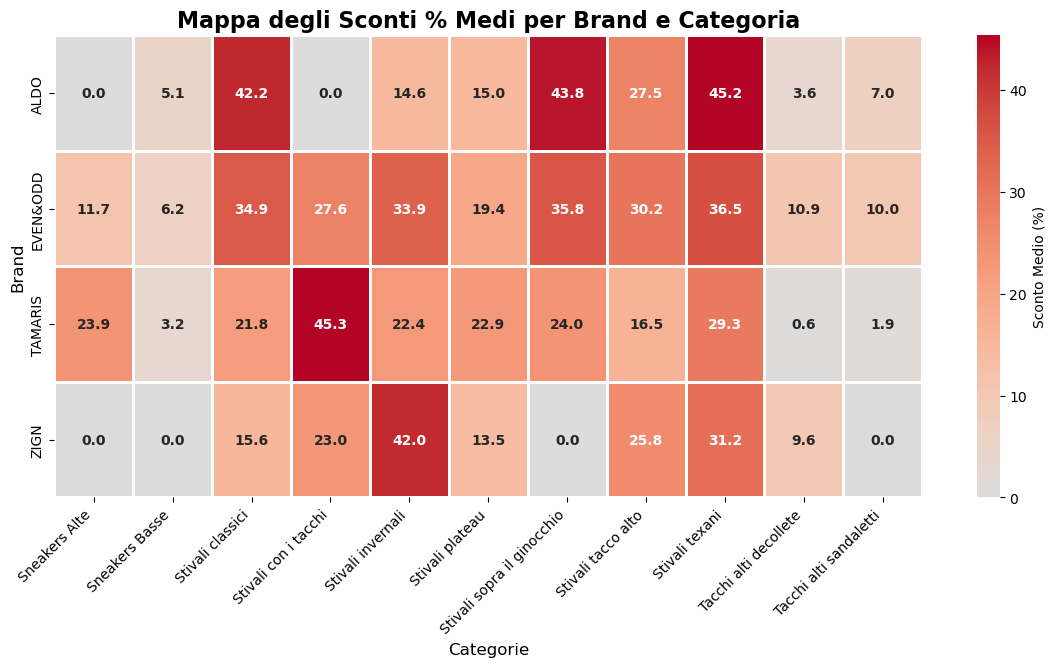

In [113]:
#Mappa degli Sconti % Medi per Brand e Categoria

sconti_per_brandcategoria.columns = ['Brand' , 'Categoria', 'Sconto Medio (%)']
#tabella pivot
heatmap_data = sconti_per_brandcategoria.pivot(index = "Brand", columns = "Categoria", values = "Sconto Medio (%)").fillna(0)

plt.figure(figsize = (14, 6))
sns.heatmap(heatmap_data, annot = True, cmap = "coolwarm", linewidths = 1, fmt = ".1f", cbar_kws = {'label': 'Sconto Medio (%)'}, center = 0, annot_kws = {"weight": "bold"})
plt.title("Mappa degli Sconti % Medi per Brand e Categoria", fontsize = 16, fontweight = "bold")
plt.xlabel("Categorie", fontsize = 12)
plt.ylabel("Brand", fontsize = 12)
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.savefig("sconti_per_brandcategoria.png", dpi = 300, bbox_inches = 'tight')  #salvaggio grafico come immagine
plt.show()

In [114]:
#Raggruppiamo per brand e taglia e calcoliamo le statistiche
sconti_per_brandtaglia = db_scarpe.groupby(['marca','taglia'])['sconto_percentuale'].mean(2).round(2).reset_index()

sconti_per_brandtaglia.columns = ['marca', 'taglia', 'sconto_percentuale_medio']

sconti_per_brandtaglia

marca  taglia  sconto_percentuale_medio
0       ALDO    35.0                     17.22
1       ALDO    36.0                     15.01
2       ALDO    37.0                     14.08
3       ALDO    37.5                      3.00
4       ALDO    38.0                     11.00
5       ALDO    38.5                      5.82
6       ALDO    39.0                     13.94
7       ALDO    40.0                     15.16
8       ALDO    41.0                     12.43
9       ALDO    42.5                      6.48
10      ALDO    44.0                      0.00
11  EVEN&ODD    34.0                     14.12
12  EVEN&ODD    35.0                     17.49
13  EVEN&ODD    36.0                     19.40
14  EVEN&ODD    37.0                     21.11
15  EVEN&ODD    38.0                     18.39
16  EVEN&ODD    39.0                     19.65
17  EVEN&ODD    40.0                     22.13
18  EVEN&ODD    41.0                     19.14
19  EVEN&ODD    42.0                     17.91
20  EVEN&ODD    43.0                     11.43
21  EVEN&ODD    44.0                     10.44
22  EVEN&ODD    45.0                     10.88
23   TAMARIS    35.0                      0.00
24   TAMARIS    36.0                      9.92
25   TAMARIS    37.0                     10.35
26   TAMARIS    38.0                      9.42
27   TAMARIS    39.0                      9.00
28   TAMARIS    40.0                      8.08
29   TAMARIS    41.0                      7.40
30   TAMARIS    42.0                      9.65
31   TAMARIS    43.0                     30.91
32   TAMARIS    44.0                      0.00
33   TAMARIS    45.0                      0.00
34      ZIGN    35.0                     23.17
35      ZIGN    36.0                     20.81
36      ZIGN    37.0                     24.06
37      ZIGN    38.0                     15.81
38      ZIGN    39.0                     27.98
39      ZIGN    40.0                     20.34
40      ZIGN    41.0                     22.43
41      ZIGN    42.0                     28.43
42      ZIGN    43.0                     37.50
43      ZIGN    44.0                     37.50
44      ZIGN    45.0                     40.00

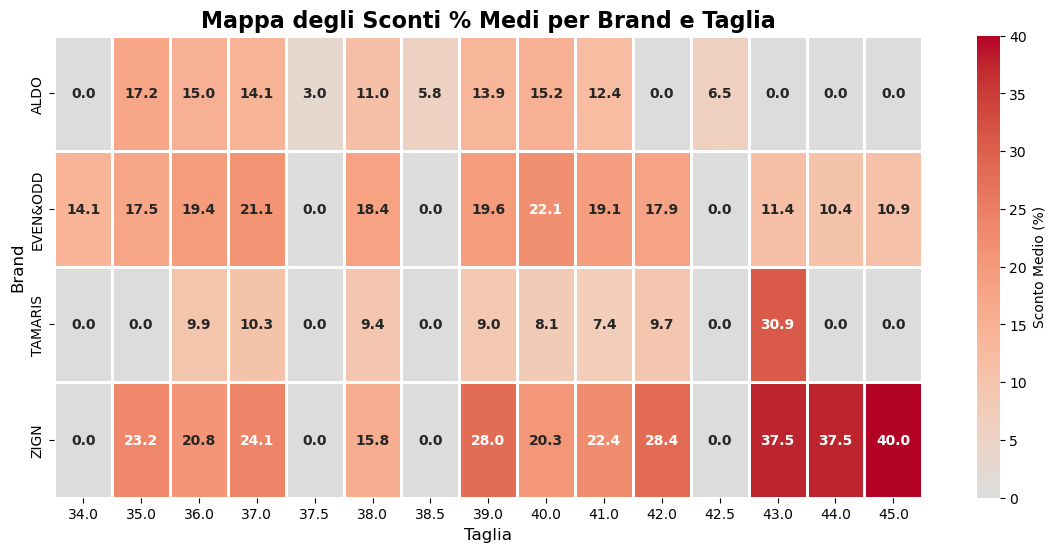

In [115]:
#Mappa degli Sconti % Medi per Brand e Taglia

sconti_per_brandtaglia.columns = ['Brand' , 'Taglia', 'Sconto Medio (%)']
#tabella pivot
heatmap_data = sconti_per_brandtaglia.pivot(index = "Brand", columns = "Taglia", values = "Sconto Medio (%)").fillna(0)

plt.figure(figsize = (14, 6))
sns.heatmap(heatmap_data, annot = True, cmap = "coolwarm", linewidths = 1, fmt = ".1f", cbar_kws = {'label': 'Sconto Medio (%)'}, center = 0, annot_kws = {"weight": "bold"})
plt.title("Mappa degli Sconti % Medi per Brand e Taglia", fontsize = 16, fontweight = "bold")
plt.xlabel("Taglia", fontsize = 12)
plt.ylabel("Brand", fontsize = 12)
plt.xticks(rotation = 0)
plt.savefig("sconti_per_brandtaglia.png", dpi = 300, bbox_inches = 'tight')  #salvaggio grafico come immagine
plt.show()

# ANALISI SUI COLORI

## Obiettivo: Analizziamo quanti e quali colori sono presenti in ogni azienda.

### ALDO

In [119]:
#trasformiamo tutte le colonne colore in una unica colonna tramite .melt (dove ci sono disponibilità multiple di colori, vengono gestite su righe diverse).
frequenzacolorialdo = db_aldo[['colore_1', 'colore_2']].melt(value_name = 'colori').dropna()

In [120]:
frequenzacolorialdo_statistica = frequenzacolorialdo['colori'].value_counts()
frequenzacolorialdo_statistica.to_frame()

count
colori                 
black               107
white                68
coloured             45
multi                35
other black          25
bone                 20
silver               19
open white           16
gold                 12
medium brown         10
medium beige         10
other blue            8
multi coloured        8
brown                 8
champagne             8
dark brown            8
beige                 7
sand                  7
medium orange         7
red                   7
white combo           6
silver coloured       6
other beige           6
gold coloured         6
light pink            6
sky blue              5
beige overflow        5
other red             5
other pink            4
other green           4
natural               4
tan                   4
pewter                3
light yellow          3
multi smooth          3
other dark beige      3
other white           3
open pink             3
light brown           3
dark grey             2
dark green            2
pastel multi          2
blue                  1
green                 1
open grey             1
bright pink           1
denim                 1
white bone            1
cream                 1
pink                  1
light beige           1

In [121]:
#calcoliamo la frequenza in percentuale
frequenzacolorialdo_percentuale = (frequenzacolorialdo['colori'].value_counts(normalize = True) * 100).round(2)
frequenzacolorialdo_percentuale.to_frame()

proportion
colori                      
black                  20.11
white                  12.78
coloured                8.46
multi                   6.58
other black             4.70
bone                    3.76
silver                  3.57
open white              3.01
gold                    2.26
medium brown            1.88
medium beige            1.88
other blue              1.50
multi coloured          1.50
brown                   1.50
champagne               1.50
dark brown              1.50
beige                   1.32
sand                    1.32
medium orange           1.32
red                     1.32
white combo             1.13
silver coloured         1.13
other beige             1.13
gold coloured           1.13
light pink              1.13
sky blue                0.94
beige overflow          0.94
other red               0.94
other pink              0.75
other green             0.75
natural                 0.75
tan                     0.75
pewter                  0.56
light yellow            0.56
multi smooth            0.56
other dark beige        0.56
other white             0.56
open pink               0.56
light brown             0.56
dark grey               0.38
dark green              0.38
pastel multi            0.38
blue                    0.19
green                   0.19
open grey               0.19
bright pink             0.19
denim                   0.19
white bone              0.19
cream                   0.19
pink                    0.19
light beige             0.19

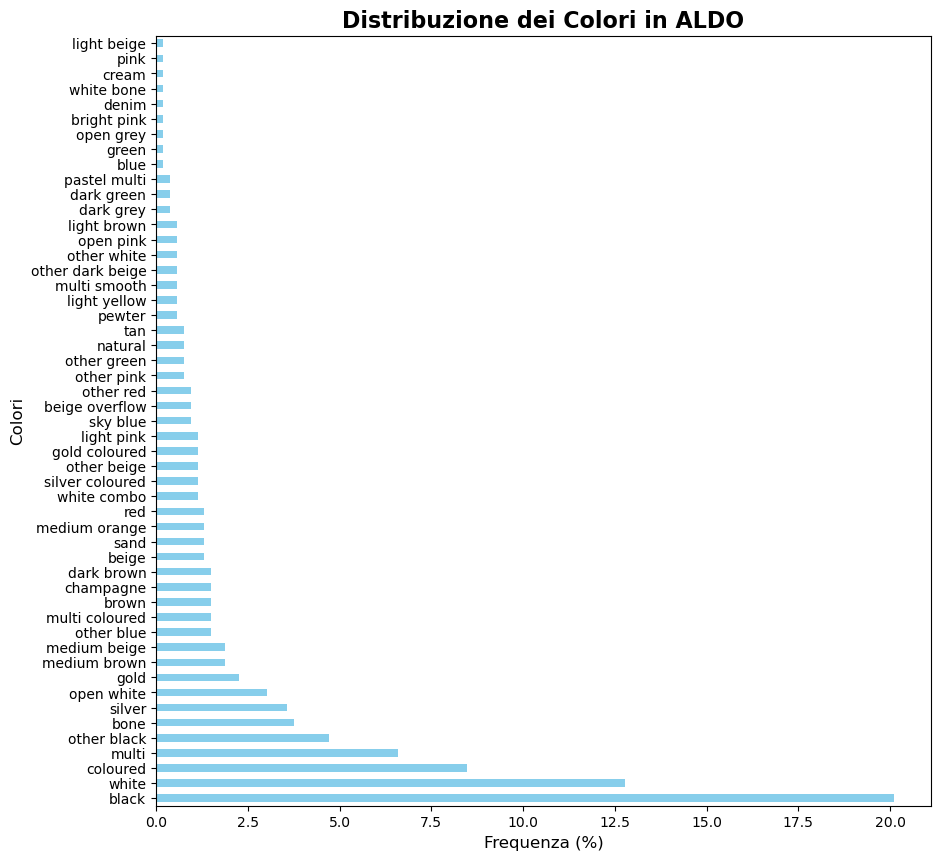

In [122]:
#Distribuzione dei Colori in ALDO

plt.figure(figsize = (10, 10))
frequenzacolorialdo_percentuale.plot(kind = "barh", color = "skyblue")
plt.xlabel("Frequenza (%)", fontsize = 12)
plt.ylabel("Colori", fontsize = 12)
plt.title("Distribuzione dei Colori in ALDO", fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 10)
plt.savefig("frequenzacolorialdo_percentuale.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

C:\Users\Ludovica\AppData\Local\Temp\ipykernel_22256\4292871009.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#A8DADC'` for the same effect.

  sns.barplot(x = top_colors_aldo.index, y = top_colors_aldo.values , hue = top_colors_aldo.index, legend = False, color = '#A8DADC')


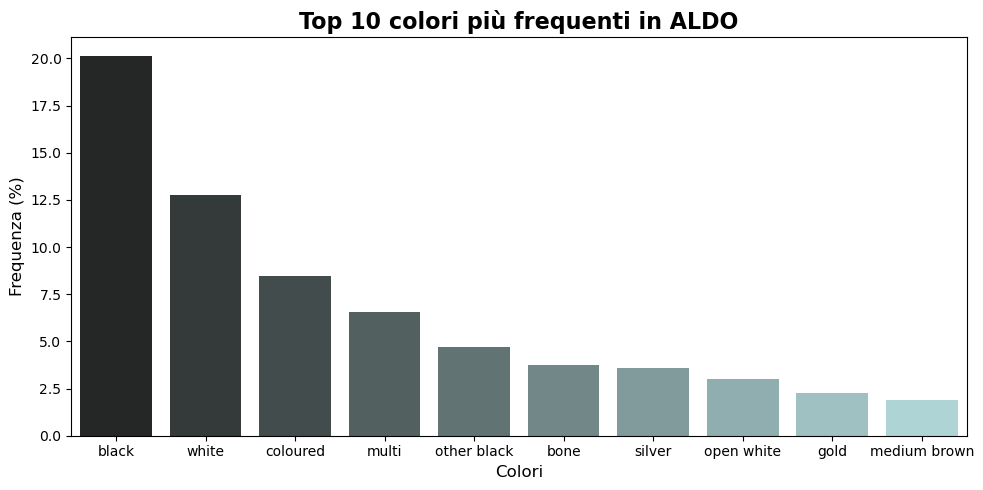

In [123]:
#Top 10 colori più frequenti in ALDO

#top 10 colori di ALDO
top_colors_aldo = frequenzacolorialdo_percentuale.head(10)

plt.figure(figsize = (10, 5))
sns.barplot(x = top_colors_aldo.index, y = top_colors_aldo.values , hue = top_colors_aldo.index, legend = False, color = '#A8DADC')
plt.title('Top 10 colori più frequenti in ALDO', fontsize = 16, fontweight = 'bold')
plt.xlabel('Colori', fontsize = 12)
plt.ylabel('Frequenza (%)', fontsize = 12)
plt.tight_layout()
plt.savefig("top_colors_aldo.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

In [124]:
#calcoliamo i colori univoci venduti in ALDO
numerocolorialdo = frequenzacolorialdo['colori'].nunique()
print(f"Il numero totale di colori venduti in ALDO è: {numerocolorialdo}")

Il numero totale di colori venduti in ALDO è: 51


### EVEN&ODD

In [126]:
#trasformiamo tutte le colonne colore in una unica colonna tramite .melt (dove ci sono disponibilità multiple di colori, vengono gestite su righe diverse).
frequenzacolorieven = db_even[['colore_1', 'colore_2','colore_3']].melt(value_name = 'colori').dropna()

In [127]:
frequenzacolorieven_statistica = frequenzacolorieven['colori'].value_counts()
frequenzacolorieven_statistica.to_frame()

count
colori                
black              419
white               68
silver              51
gold                32
beige               26
light pink          25
brown               17
coloured            16
red                 15
taupe               14
blue denim          11
grey                10
dark brown           9
beige denim          8
blue                 8
bleached blue        8
pink                 8
cognac               8
khaki                7
off white            6
light blue           6
orange               5
yellow               4
transparent          3
gunmetal             3
sand                 3
dark grey denim      2
bleached denim       2
 gold                2
 turquoise           2
dark grey            1
dark red             1

In [128]:
#calcoliamo la frequenza in percentuale
frequenzacolorieven_percentuale = (frequenzacolorieven['colori'].value_counts(normalize = True) * 100).round(2)
frequenzacolorieven_percentuale.to_frame()

proportion
colori                     
black                 52.38
white                  8.50
silver                 6.38
gold                   4.00
beige                  3.25
light pink             3.12
brown                  2.12
coloured               2.00
red                    1.88
taupe                  1.75
blue denim             1.38
grey                   1.25
dark brown             1.12
beige denim            1.00
blue                   1.00
bleached blue          1.00
pink                   1.00
cognac                 1.00
khaki                  0.88
off white              0.75
light blue             0.75
orange                 0.62
yellow                 0.50
transparent            0.38
gunmetal               0.38
sand                   0.38
dark grey denim        0.25
bleached denim         0.25
 gold                  0.25
 turquoise             0.25
dark grey              0.12
dark red               0.12

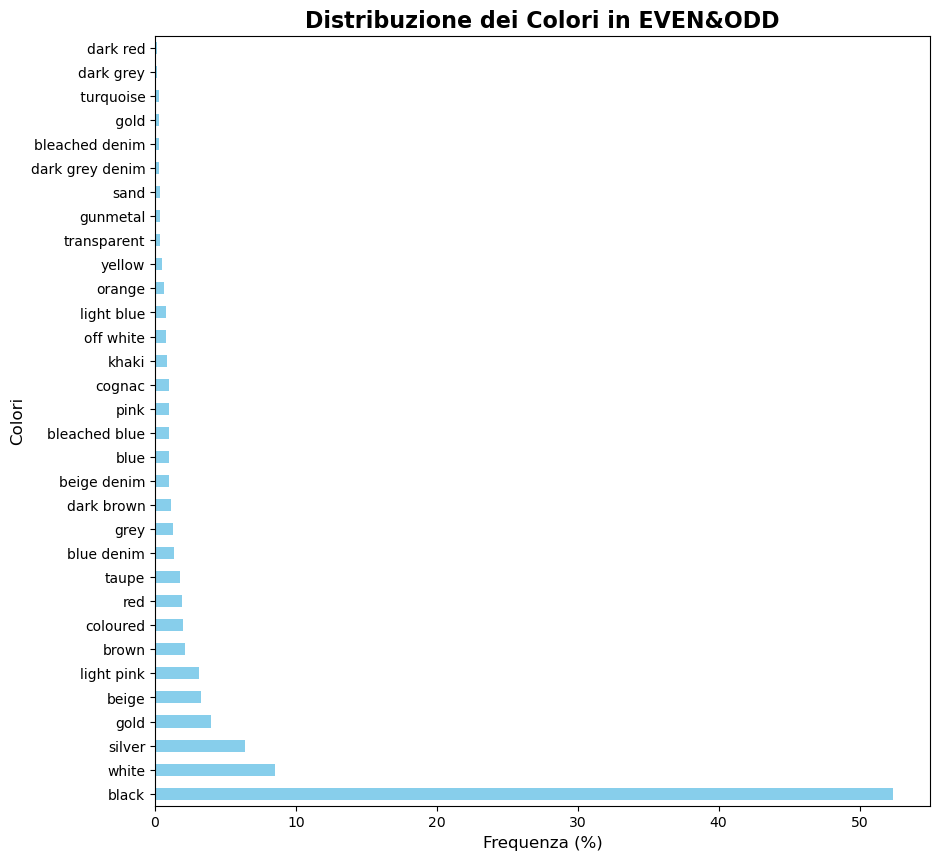

In [196]:
#Distribuzione dei colori in EVEN&ODD

plt.figure(figsize = (10, 10))
frequenzacolorieven_percentuale.plot(kind = "barh", color = "skyblue")
plt.xlabel("Frequenza (%)", fontsize = 12)
plt.ylabel("Colori", fontsize = 12)
plt.title("Distribuzione dei Colori in EVEN&ODD", fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 10)
plt.savefig("frequenzacolorieven_percentuale.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine           
plt.show()

C:\Users\Ludovica\AppData\Local\Temp\ipykernel_22256\571406835.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#A8DADC'` for the same effect.

  sns.barplot(x = top_colors_even.index, y = top_colors_even.values , hue = top_colors_even.index, legend = False,  color = '#A8DADC')


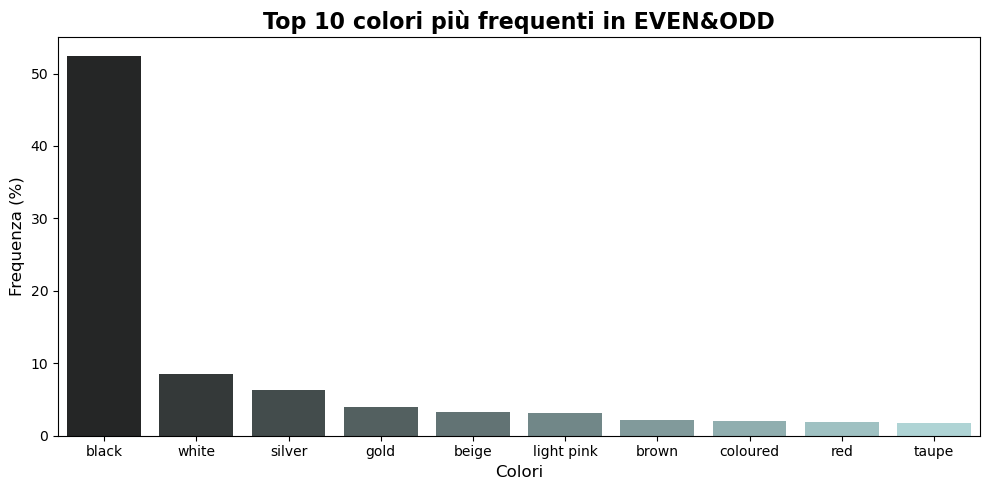

In [130]:
#Top 10 colori più frequenti in EVEN&ODD

#top 10 colori di EVEN&ODD
top_colors_even = frequenzacolorieven_percentuale.head(10)

plt.figure(figsize = (10, 5))
sns.barplot(x = top_colors_even.index, y = top_colors_even.values , hue = top_colors_even.index, legend = False,  color = '#A8DADC')
plt.title('Top 10 colori più frequenti in EVEN&ODD', fontsize = 16, fontweight = 'bold')
plt.xlabel('Colori', fontsize = 12)
plt.ylabel('Frequenza (%)', fontsize = 12)
plt.tight_layout()
plt.savefig("top_colors_even.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine        
plt.show()

In [131]:
#calcoliamo i colori univoci venduti in EVEN&ODD
numerocolorieven = frequenzacolorieven['colori'].nunique()
print(f"Il numero totale di colori venduti in EVEN&ODD è: {numerocolorieven}")

Il numero totale di colori venduti in EVEN&ODD è: 32


### TAMARIS

In [133]:
#trasformiamo tutte le colonne colore in una unica colonna tramite .melt (dove ci sono disponibilità multiple di colori, vengono gestite su righe diverse).
frequenzacoloritamaris = db_tamaris[['colore_1', 'colore_2']].melt(value_name = 'colori').dropna()

In [134]:
frequenzacoloritamaris_statistica = frequenzacoloritamaris['colori'].value_counts()
frequenzacoloritamaris_statistica.to_frame()

count
colori               
black             181
ivory              44
white              40
taupe              28
white comb         23
camel              22
gold               21
navy               21
light gold         19
orange comb        18
orange             17
lt blue comb       16
antelope           15
light grey         14
sage               14
mint               14
grey               13
coloured           13
black nappa        12
black comb         12
pink               11
black uni          11
purple comb         9
pink comb           9
beige comb          8
lt grey comb        8
white uni           7
rose glam           7
peach comb          7
rose comb           6
lavender            6
gold comb           6
pearl               6
olive comb          6
light rose          6
gold silver         6
brown comb          6
anthracite          6
brown               6
beige glam          6
ivory struct        6
ivory uni           6
white nappa         6
beige fur           6
soft lemon          6
sage comb           5
red suede           5
red rose            5
fuxia comb          5
metallic comb       5
yellow              5
denim comb          5
green comb          5
silver glam         5
offwht leo          5
tan                 5
offwhite comb       5
white silver        5
denim               5
muscat              5
taupe patent        5
black gold          4
lt green nubuc      4
beige               4
black leather       4
white gold          4
cognac              4
black suede         4
silver comb         4
red                 4
rose gold           4
white red           4
nude                4
black leopard       3
champagne           3
fuchsia comb        3
leopard comb        3
light blue          3
red patent          3
zebra comb          3
rose green          3
fuxia               3
light green         3
ivory macramee      3
muscat comb         3
ivory metallic      3
wht rose gold       3
blue                3
cuoio               3
leopard             3
beige gold          3
mint patent         3
rose metallic       3
bronce comb         3
ivory patent        2
multicolor          2
sand                2
yellow green        2
white blue          2
ivory comb          2
black lea fur       2
cigar               2
white leather       2
bronce              2
corallo             2
mocca               2
a white silver      2
lilac comb          2
olive               2
rose                2
yellow nubuc        1
merlot              1
peach               1
lt grey silver      1
lt blue             1
offwhite            1
red fuchsia         1
fuxia nubuc         1
light gold met      1
white pink          1
dark pink           1
brons               1
antelope uni        1
white black         1
lt gold             1
sky                 1
denim blue          1
denim nubuc         1

In [135]:
#calcoliamo la frequenza in percentuale
frequenzacoloritamaris_percentuale = (frequenzacoloritamaris['colori'].value_counts(normalize = True) * 100).round(2)
frequenzacoloritamaris_percentuale.to_frame()

proportion
colori                    
black                18.64
ivory                 4.53
white                 4.12
taupe                 2.88
white comb            2.37
camel                 2.27
gold                  2.16
navy                  2.16
light gold            1.96
orange comb           1.85
orange                1.75
lt blue comb          1.65
antelope              1.54
light grey            1.44
sage                  1.44
mint                  1.44
grey                  1.34
coloured              1.34
black nappa           1.24
black comb            1.24
pink                  1.13
black uni             1.13
purple comb           0.93
pink comb             0.93
beige comb            0.82
lt grey comb          0.82
white uni             0.72
rose glam             0.72
peach comb            0.72
rose comb             0.62
lavender              0.62
gold comb             0.62
pearl                 0.62
olive comb            0.62
light rose            0.62
gold silver           0.62
brown comb            0.62
anthracite            0.62
brown                 0.62
beige glam            0.62
ivory struct          0.62
ivory uni             0.62
white nappa           0.62
beige fur             0.62
soft lemon            0.62
sage comb             0.51
red suede             0.51
red rose              0.51
fuxia comb            0.51
metallic comb         0.51
yellow                0.51
denim comb            0.51
green comb            0.51
silver glam           0.51
offwht leo            0.51
tan                   0.51
offwhite comb         0.51
white silver          0.51
denim                 0.51
muscat                0.51
taupe patent          0.51
black gold            0.41
lt green nubuc        0.41
beige                 0.41
black leather         0.41
white gold            0.41
cognac                0.41
black suede           0.41
silver comb           0.41
red                   0.41
rose gold             0.41
white red             0.41
nude                  0.41
black leopard         0.31
champagne             0.31
fuchsia comb          0.31
leopard comb          0.31
light blue            0.31
red patent            0.31
zebra comb            0.31
rose green            0.31
fuxia                 0.31
light green           0.31
ivory macramee        0.31
muscat comb           0.31
ivory metallic        0.31
wht rose gold         0.31
blue                  0.31
cuoio                 0.31
leopard               0.31
beige gold            0.31
mint patent           0.31
rose metallic         0.31
bronce comb           0.31
ivory patent          0.21
multicolor            0.21
sand                  0.21
yellow green          0.21
white blue            0.21
ivory comb            0.21
black lea fur         0.21
cigar                 0.21
white leather         0.21
bronce                0.21
corallo               0.21
mocca                 0.21
a white silver        0.21
lilac comb            0.21
olive                 0.21
rose                  0.21
yellow nubuc          0.10
merlot                0.10
peach                 0.10
lt grey silver        0.10
lt blue               0.10
offwhite              0.10
red fuchsia           0.10
fuxia nubuc           0.10
light gold met        0.10
white pink            0.10
dark pink             0.10
brons                 0.10
antelope uni          0.10
white black           0.10
lt gold               0.10
sky                   0.10
denim blue            0.10
denim nubuc           0.10

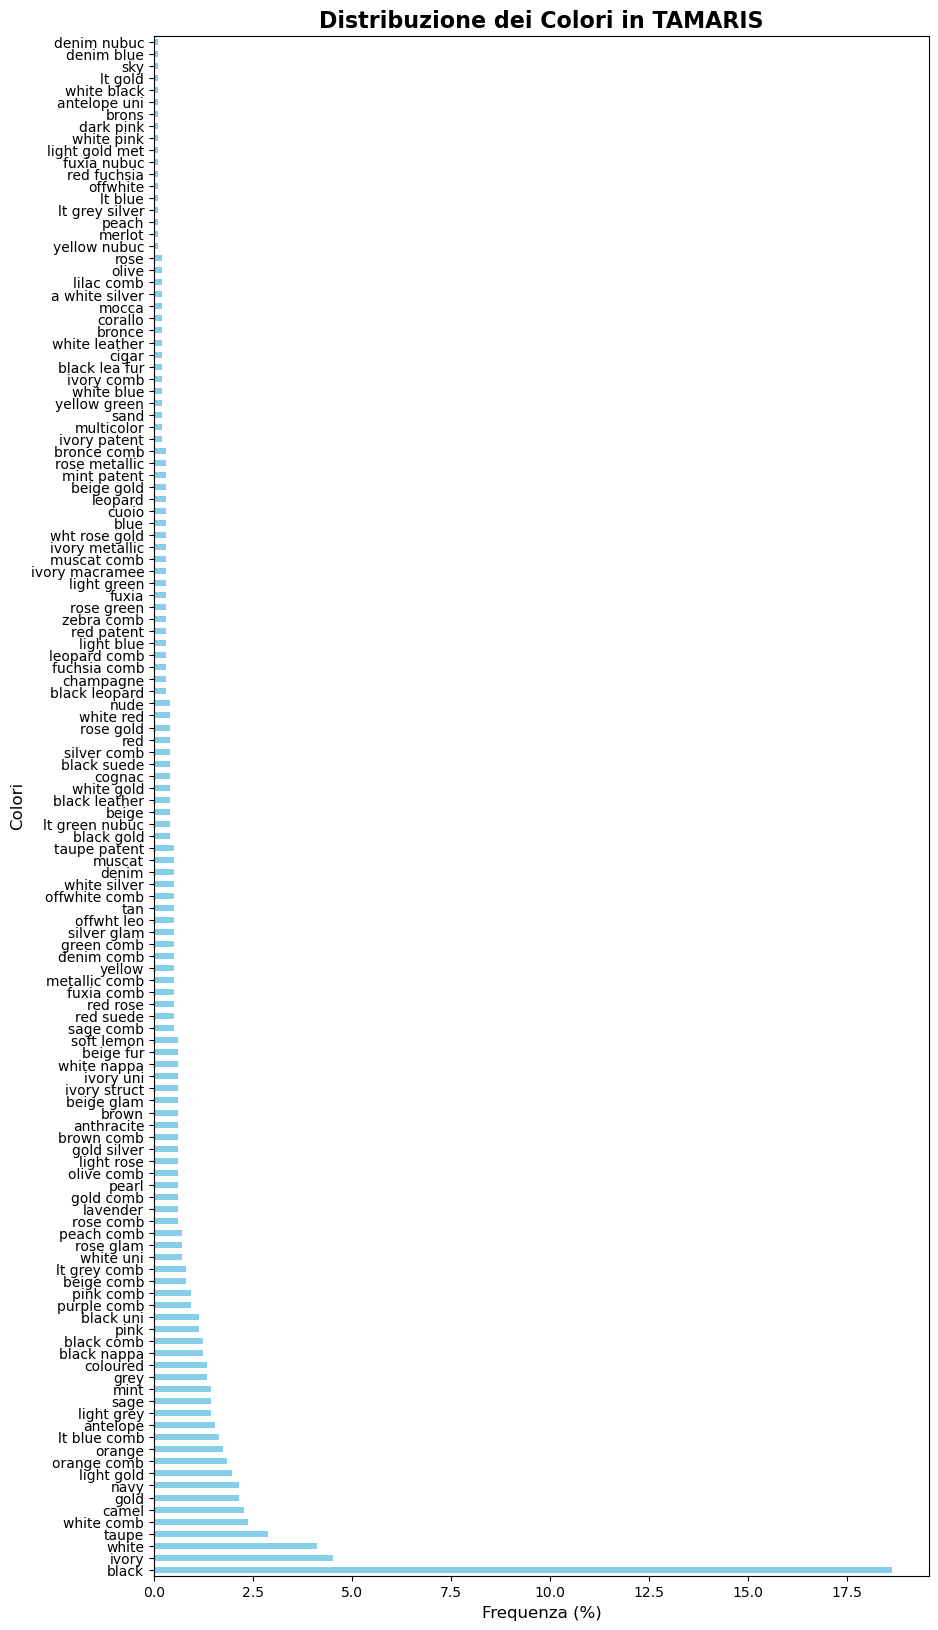

In [136]:
#Distribuzione dei colori in TAMARIS

plt.figure(figsize = (10,20))
frequenzacoloritamaris_percentuale.plot(kind = "barh", color = "skyblue")
plt.xlabel("Frequenza (%)", fontsize = 12)
plt.ylabel("Colori", fontsize = 12)
plt.title("Distribuzione dei Colori in TAMARIS", fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 10)
plt.savefig("frequenzacoloritamaris_percentuale.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

C:\Users\Ludovica\AppData\Local\Temp\ipykernel_22256\1307588557.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#A8DADC'` for the same effect.

  sns.barplot(x = top_colors_tamaris.index, y = top_colors_tamaris.values , hue = top_colors_tamaris.index, legend = False,  color = '#A8DADC')


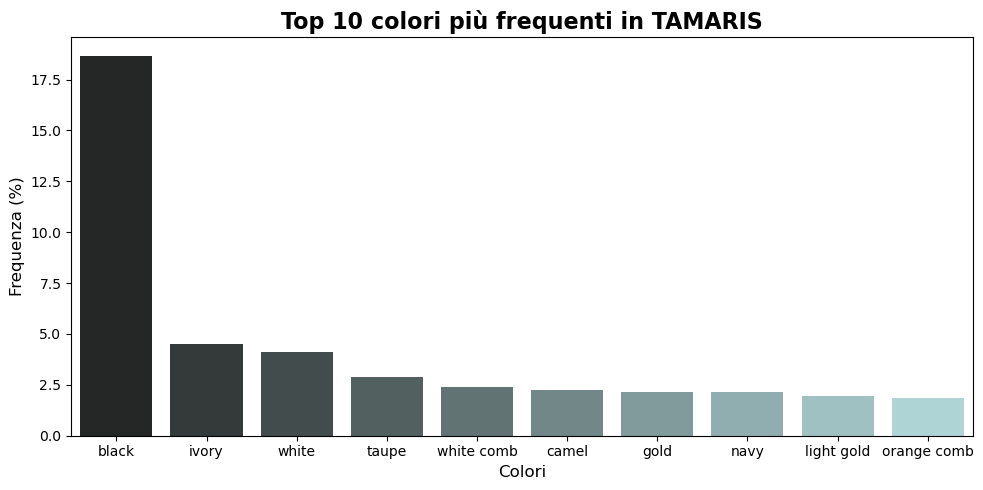

In [137]:
#Top 10 colori più frequenti in TAMARIS

#top 10 colori di TAMARIS
top_colors_tamaris = frequenzacoloritamaris_percentuale.head(10)

plt.figure(figsize = (10, 5))
sns.barplot(x = top_colors_tamaris.index, y = top_colors_tamaris.values , hue = top_colors_tamaris.index, legend = False,  color = '#A8DADC')
plt.title('Top 10 colori più frequenti in TAMARIS', fontsize = 16, fontweight = 'bold')
plt.xlabel('Colori', fontsize = 12)
plt.ylabel('Frequenza (%)', fontsize = 12)
plt.tight_layout()
plt.savefig("top_colors_tamaris.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

In [138]:
#calcoliamo i colori univoci venduti in TAMARIS
numerocoloritamaris = frequenzacoloritamaris['colori'].nunique()
print(f"Il numero totale di colori venduti in TAMARIS è: {numerocoloritamaris}")

Il numero totale di colori venduti in TAMARIS è: 128


### ZIGN

In [140]:
#trasformiamo tutte le colonne colore in una unica colonna tramite .melt (dove ci sono disponibilità multiple di colori, vengono gestite su righe diverse).
frequenzacolorizign = db_zign[['colore_1', 'colore_2','colore_3']].melt(value_name = 'colori').dropna()

In [141]:
frequenzacolorizign_statistica = frequenzacolorizign['colori'].value_counts()
frequenzacolorizign_statistica.to_frame()

count
colori           
black         119
beige          13
orange         11
lilac          11
pink           11
light pink      9
dark brown      8
bordeaux        7
grey            6
white           6
cognac          4
brown           3
off white       2
gold            1
dark red        1

In [142]:
#calcoliamo la frequenza in percentuale
frequenzacolorizign_percentuale = (frequenzacolorizign['colori'].value_counts(normalize = True) * 100).round(2)
frequenzacolorizign_percentuale.to_frame()

proportion
colori                
black            56.13
beige             6.13
orange            5.19
lilac             5.19
pink              5.19
light pink        4.25
dark brown        3.77
bordeaux          3.30
grey              2.83
white             2.83
cognac            1.89
brown             1.42
off white         0.94
gold              0.47
dark red          0.47

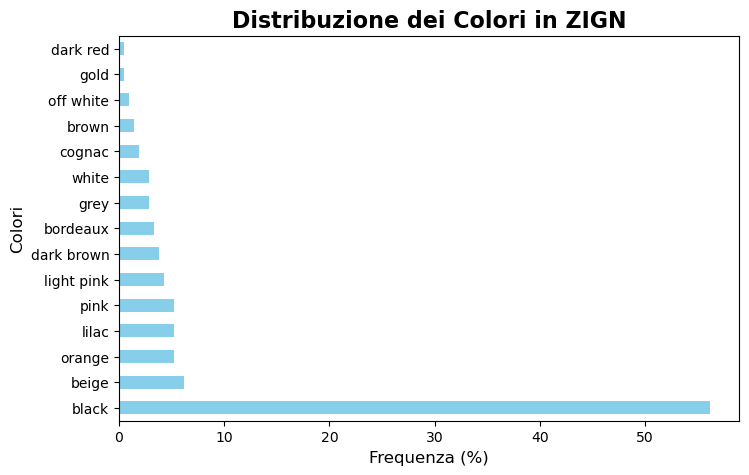

In [143]:
#Distribuzione dei colori in ZIGN

plt.figure(figsize = (8, 5))
frequenzacolorizign_percentuale.plot(kind = "barh", color = "skyblue")
plt.xlabel("Frequenza (%)", fontsize = 12)
plt.ylabel("Colori", fontsize = 12)
plt.title("Distribuzione dei Colori in ZIGN", fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 10)
plt.savefig("frequenzacolorizign_percentuale.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

C:\Users\Ludovica\AppData\Local\Temp\ipykernel_22256\629238749.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#A8DADC'` for the same effect.

  sns.barplot(x = top_colors_zign.index, y = top_colors_zign.values , hue = top_colors_zign.index, legend = False,  color = '#A8DADC')


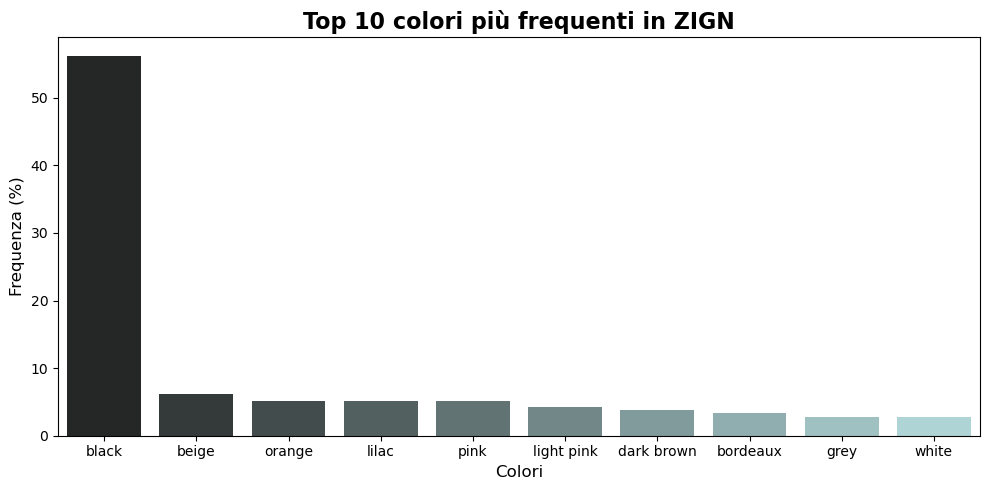

In [144]:
#Top 10 colori più frequenti in ZIGN

#top 10 colori di ZIGN
top_colors_zign = frequenzacolorizign_percentuale.head(10)

plt.figure(figsize = (10, 5))
sns.barplot(x = top_colors_zign.index, y = top_colors_zign.values , hue = top_colors_zign.index, legend = False,  color = '#A8DADC')
plt.title('Top 10 colori più frequenti in ZIGN', fontsize = 16, fontweight = 'bold')
plt.xlabel('Colori', fontsize = 12)
plt.ylabel('Frequenza (%)', fontsize = 12)
plt.tight_layout()
plt.savefig("top_colors_zign.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

In [145]:
#calcoliamo i colori univoci venduti in ZIGN
numerocolorizign = frequenzacolorizign['colori'].nunique()
print(f"Il numero totale di colori venduti in ZIGN è: {numerocolorizign}")

Il numero totale di colori venduti in ZIGN è: 15


### COMPLESSIVO (COLORE PIU' PRESENTE)

In [147]:
#trasformiamo tutte le colonne colore in una unica colonna tramite .melt (dove ci sono disponibilità multiple di colori, vengono gestite su righe diverse).
frequenzacoloriscarpe = db_scarpecompleto[['colore_1', 'colore_2','colore_3']].melt(value_name = 'colori').dropna()

In [148]:
frequenzacoloriscarpe_statistica = frequenzacoloriscarpe['colori'].value_counts()

frequenzacoloriscarpe_statistica.to_frame()

count
colori                 
black               826
white               182
coloured             74
silver               70
gold                 66
beige                50
ivory                44
taupe                42
light pink           40
multi                35
brown                34
orange               33
pink                 31
grey                 29
red                  26
dark brown           25
other black          25
white comb           23
camel                22
navy                 21
bone                 20
light gold           19
orange comb          18
cognac               16
lt blue comb         16
open white           16
antelope             15
light grey           14
mint                 14
sage                 14
black comb           12
blue                 12
black nappa          12
sand                 12
blue denim           11
black uni            11
champagne            11
lilac                11
medium beige         10
medium brown         10
yellow                9
pink comb             9
light blue            9
purple comb           9
tan                   9
beige denim           8
bleached blue         8
off white             8
other blue            8
multi coloured        8
lt grey comb          8
beige comb            8
bordeaux              7
khaki                 7
medium orange         7
white uni             7
rose glam             7
peach comb            7
beige fur             6
soft lemon            6
anthracite            6
lavender              6
rose comb             6
pearl                 6
ivory struct          6
ivory uni             6
brown comb            6
olive comb            6
gold silver           6
gold comb             6
light rose            6
other beige           6
silver coloured       6
beige glam            6
gold coloured         6
white combo           6
white nappa           6
denim                 6
denim comb            5
fuxia comb            5
other red             5
red suede             5
silver glam           5
offwht leo            5
sky blue              5
white silver          5
offwhite comb         5
beige overflow        5
sage comb             5
red rose              5
metallic comb         5
taupe patent          5
muscat                5
green comb            5
lt green nubuc        4
other pink            4
black suede           4
rose gold             4
natural               4
black leather         4
silver comb           4
nude                  4
black gold            4
other green           4
white red             4
white gold            4
fuxia                 3
beige gold            3
zebra comb            3
ivory metallic        3
leopard comb          3
fuchsia comb          3
ivory macramee        3
rose metallic         3
rose green            3
leopard               3
light green           3
other white           3
multi smooth          3
wht rose gold         3
gunmetal              3
dark grey             3
transparent           3
muscat comb           3
open pink             3
light brown           3
mint patent           3
other dark beige      3
black leopard         3
pewter                3
cuoio                 3
bronce comb           3
red patent            3
light yellow          3
a white silver        2
ivory comb            2
lilac comb            2
dark green            2
 gold                 2
white leather         2
white blue            2
pastel multi          2
yellow green          2
rose                  2
 turquoise            2
dark grey denim       2
bronce                2
olive                 2
cigar                 2
black lea fur         2
bleached denim        2
mocca                 2
dark red              2
ivory patent          2
multicolor            2
corallo               2
dark pink             1
white pink            1
peach                 1
lt grey silver        1
lt blue               1
offwhite              1
red fuchsia           1
fuxia nubuc           1
light gold met        1
green     

In [149]:
#calcoliamo la frequenza in percentuale
frequenzacoloriscarpe_percentuale = (frequenzacoloriscarpe['colori'].value_counts(normalize = True) * 100).round(2)
frequenzacoloriscarpe_percentuale.to_frame()

proportion
colori                      
black                  32.84
white                   7.24
coloured                2.94
silver                  2.78
gold                    2.62
beige                   1.99
ivory                   1.75
taupe                   1.67
light pink              1.59
multi                   1.39
brown                   1.35
orange                  1.31
pink                    1.23
grey                    1.15
red                     1.03
dark brown              0.99
other black             0.99
white comb              0.91
camel                   0.87
navy                    0.83
bone                    0.80
light gold              0.76
orange comb             0.72
cognac                  0.64
lt blue comb            0.64
open white              0.64
antelope                0.60
light grey              0.56
mint                    0.56
sage                    0.56
black comb              0.48
blue                    0.48
black nappa             0.48
sand                    0.48
blue denim              0.44
black uni               0.44
champagne               0.44
lilac                   0.44
medium beige            0.40
medium brown            0.40
yellow                  0.36
pink comb               0.36
light blue              0.36
purple comb             0.36
tan                     0.36
beige denim             0.32
bleached blue           0.32
off white               0.32
other blue              0.32
multi coloured          0.32
lt grey comb            0.32
beige comb              0.32
bordeaux                0.28
khaki                   0.28
medium orange           0.28
white uni               0.28
rose glam               0.28
peach comb              0.28
beige fur               0.24
soft lemon              0.24
anthracite              0.24
lavender                0.24
rose comb               0.24
pearl                   0.24
ivory struct            0.24
ivory uni               0.24
brown comb              0.24
olive comb              0.24
gold silver             0.24
gold comb               0.24
light rose              0.24
other beige             0.24
silver coloured         0.24
beige glam              0.24
gold coloured           0.24
white combo             0.24
white nappa             0.24
denim                   0.24
denim comb              0.20
fuxia comb              0.20
other red               0.20
red suede               0.20
silver glam             0.20
offwht leo              0.20
sky blue                0.20
white silver            0.20
offwhite comb           0.20
beige overflow          0.20
sage comb               0.20
red rose                0.20
metallic comb           0.20
taupe patent            0.20
muscat                  0.20
green comb              0.20
lt green nubuc          0.16
other pink              0.16
black suede             0.16
rose gold               0.16
natural                 0.16
black leather           0.16
silver comb             0.16
nude                    0.16
black gold              0.16
other green             0.16
white red               0.16
white gold              0.16
fuxia                   0.12
beige gold              0.12
zebra comb              0.12
ivory metallic          0.12
leopard comb            0.12
fuchsia comb            0.12
ivory macramee          0.12
rose metallic           0.12
rose green              0.12
leopard                 0.12
light green             0.12
other white             0.12
multi smooth            0.12
wht rose gold           0.12
gunmetal                0.12
dark grey               0.12
transparent             0.12
muscat comb             0.12
open pink               0.12
light brown             0.12
mint patent             0.12
other dark beige        0.12
black leopard           0.12
pewter                  0.12
cuoio                   0.12
bronce comb             0.12
red patent              0.12
light yellow            0.12
a white silver          0.08
ivory comb              0.08
lilac comb      

C:\Users\Ludovica\AppData\Local\Temp\ipykernel_22256\1667020389.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#A8DADC'` for the same effect.

  sns.barplot(x = top_colors.index, y = top_colors.values , hue = top_colors.index, legend = False,  color = '#A8DADC')


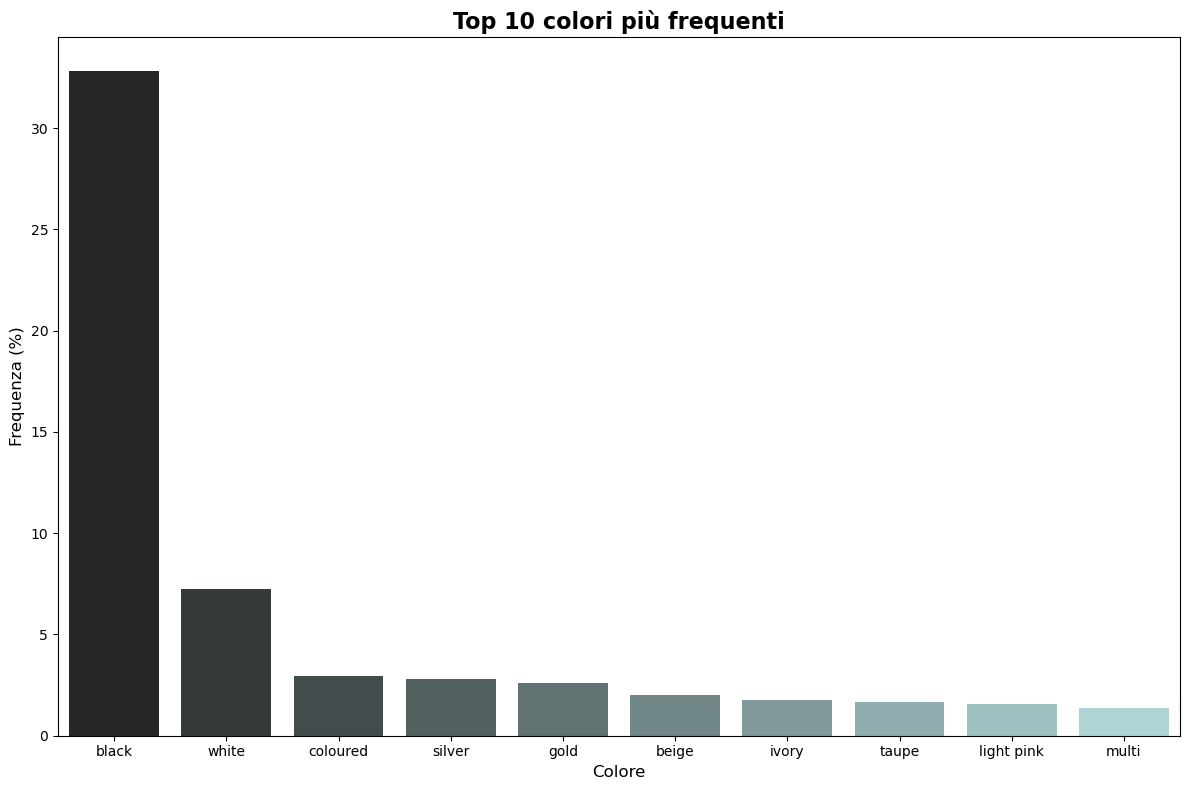

In [150]:
#Top 10 colori più frequenti

#top 10 colori più frequenti nel db
top_colors = frequenzacoloriscarpe_percentuale.head(10)

plt.figure(figsize = (12, 8))
sns.barplot(x = top_colors.index, y = top_colors.values , hue = top_colors.index, legend = False,  color = '#A8DADC')
plt.title('Top 10 colori più frequenti', fontsize = 16, fontweight = 'bold')
plt.xlabel('Colore', fontsize = 12)
plt.ylabel('Frequenza (%)', fontsize = 12)
plt.tight_layout()
plt.savefig("top_colors.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

In [151]:
#calcoliamo i colori univoci venduti in ALDO
numerocolorialdo = frequenzacolorialdo['colori'].nunique()
print(f"Il numero totale di colori venduti in ALDO è: {numerocolorialdo}")

#calcoliamo i colori univoci venduti in EVEN&ODD
numerocolorieven= frequenzacolorieven['colori'].nunique()
print(f"Il numero totale di colori venduti in EVEN&ODD è: {numerocolorieven}")

#calcoliamo i colori univoci venduti in TAMARIS
numerocoloritamaris = frequenzacoloritamaris['colori'].nunique()
print(f"Il numero totale di colori venduti in TAMARIS è: {numerocoloritamaris}")

#calcoliamo i colori univoci venduti in ZIGN
numerocolorizign = frequenzacolorizign['colori'].nunique()
print(f"Il numero totale di colori venduti in ZIGN è: {numerocolorizign}")

Il numero totale di colori venduti in ALDO è: 51
Il numero totale di colori venduti in EVEN&ODD è: 32
Il numero totale di colori venduti in TAMARIS è: 128
Il numero totale di colori venduti in ZIGN è: 15


In [152]:
dizionario = { 'ALDO' : numerocolorialdo , 'EVEN&ODD'  : numerocolorieven, 'TAMARIS' : numerocoloritamaris , 'ZIGN': numerocolorizign}

In [153]:
coloridisponibilipermarca = pd.DataFrame.from_dict(dizionario, orient = 'index', columns = ['numero_colori'])

coloridisponibilipermarca

numero_colori
ALDO                 51
EVEN&ODD             32
TAMARIS             128
ZIGN                 15

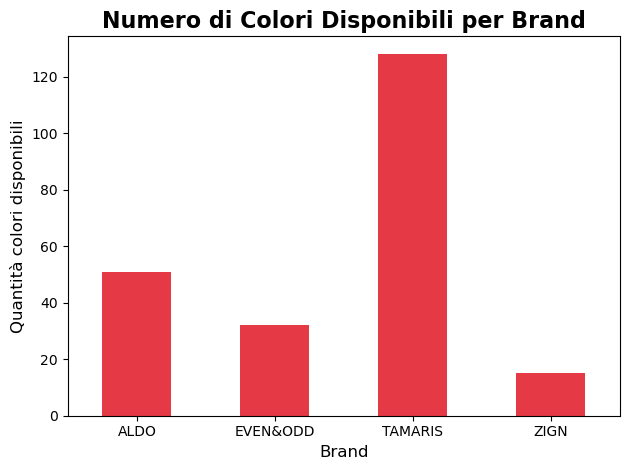

In [154]:
#Numero di Colori Disponibili per Brand

coloridisponibilipermarca.plot(kind = 'bar', color = '#E63946' , legend = False)
plt.title('Numero di Colori Disponibili per Brand', fontsize = 16, fontweight = 'bold')
plt.xlabel('Brand', fontsize = 12)
plt.ylabel('Quantità colori disponibili', fontsize = 12)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig("coloridisponibilipermarca.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

In [155]:
top_10_colori = frequenzacoloriscarpe_statistica.head(10).index.tolist()

top_10_colori

['black',
 'white',
 'coloured',
 'silver',
 'gold',
 'beige',
 'ivory',
 'taupe',
 'light pink',
 'multi']

In [156]:
#ad ogni colore associamo il brand
frequenzacoloriscarpe = frequenzacoloriscarpe.merge(db_scarpecompleto[['marca']], left_index = True, right_index = True, how = 'left')

frequenzacoloriscarpe

variable            colori     marca
0     colore_1    beige overflow      ZIGN
1     colore_1        dark brown  EVEN&ODD
2     colore_1            pewter      ALDO
3     colore_1    beige overflow      ZIGN
4     colore_1    beige overflow  EVEN&ODD
5     colore_1             black      ALDO
6     colore_1             black      ALDO
7     colore_1    beige overflow  EVEN&ODD
8     colore_1            pewter   TAMARIS
9     colore_1        dark brown   TAMARIS
10    colore_1    beige overflow      ZIGN
11    colore_1             black   TAMARIS
12    colore_1        dark brown   TAMARIS
13    colore_1             black   TAMARIS
14    colore_1             black  EVEN&ODD
15    colore_1             black   TAMARIS
16    colore_1        dark brown   TAMARIS
17    colore_1               tan   TAMARIS
18    colore_1             black  EVEN&ODD
19    colore_1               tan   TAMARIS
20    colore_1             black      ALDO
21    colore_1               tan  EVEN&ODD
22    colore_1             black      ZIGN
23    colore_1               tan  EVEN&ODD
24    colore_1             black      ZIGN
25    colore_1    multi coloured      ZIGN
26    colore_1               red  EVEN&ODD
27    colore_1             multi   TAMARIS
28    colore_1             multi   TAMARIS
29    colore_1          coloured   TAMARIS
30    colore_1             white      ZIGN
31    colore_1             white   TAMARIS
32    colore_1      medium brown   TAMARIS
33    colore_1             multi   TAMARIS
34    colore_1        light pink  EVEN&ODD
35    colore_1          coloured   TAMARIS
36    colore_1     medium orange   TAMARIS
37    colore_1        other pink   TAMARIS
38    colore_1   silver coloured      ZIGN
39    colore_1             white   TAMARIS
40    colore_1             black  EVEN&ODD
41    colore_1             black   TAMARIS
42    colore_1             black      ALDO
43    colore_1       other black      ZIGN
44    colore_1       other black  EVEN&ODD
45    colore_1       other black  EVEN&ODD
46    colore_1             black   TAMARIS
47    colore_1       other black      ZIGN
48    colore_1             black      ALDO
49    colore_1             black  EVEN&ODD
50    colore_1             black   TAMARIS
51    colore_1             black   TAMARIS
52    colore_1        dark brown      ZIGN
53    colore_1            pewter   TAMARIS
54    colore_1             black   TAMARIS
55    colore_1         other red      ZIGN
56    colore_1       other black   TAMARIS
57    colore_1             black      ZIGN
58    colore_1             black   TAMARIS
59    colore_1             black      ALDO
60    colore_1             black      ZIGN
61    colore_1             black   TAMARIS
62    colore_1             black  EVEN&ODD
63    colore_1             black      ZIGN
64    colore_1             black   TAMARIS
65    colore_1       other black      ALDO
66    colore_1             black  EVEN&ODD
67    colore_1        dark brown      ZIGN
68    colore_1  other dark beige  EVEN&ODD
69    colore_1             black  EVEN&ODD
70    colore_1       other black      ZIGN
71    colore_1             black   TAMARIS
72    colore_1        dark brown      ALDO
73    colore_1             black      ZIGN
74    colore_1             black   TAMARIS
75    colore_1       other black   TAMARIS
76    colore_1             black   TAMARIS
77    colore_1             black      ZIGN
78    colore_1  other dark beige   TAMARIS
79    colore_1             black   TAMARIS
80    colore_1       other black      ZIGN
81    colore_1        dark brown  EVEN&ODD
82    colore_1    multi coloured   TAMARIS
83    colore_1               red  EVEN&ODD
84    colore_1          coloured      ALDO
85    colore_1             multi   TAMARIS
86    colore_1             multi      ALDO
87    colore_1             white  EVEN&ODD
88    colore_1             white   TAMARIS
89    colore_1      medium brown      ZIGN
90    colore_1             multi  EVEN&ODD
91    colore_1        light pink   TAMARIS
92    c

In [157]:
df_colori_marca = frequenzacoloriscarpe.groupby('marca')['colori'].count()

df_colori_marca.to_frame()

colori
marca           
ALDO         492
EVEN&ODD     761
TAMARIS      945
ZIGN         180

In [158]:
print('ALDO', frequenzacolorialdo['colori'].value_counts().sum())
print('EVEN&ODD', frequenzacolorieven['colori'].value_counts().sum())
print('TAMARIS',frequenzacoloritamaris['colori'].value_counts().sum())
print('ZIGN', frequenzacolorizign['colori'].value_counts().sum())

ALDO 532
EVEN&ODD 800
TAMARIS 971
ZIGN 212


In [159]:
percentuale_errore = df_colori_marca.sum() / frequenzacoloriscarpe['colori'].value_counts().sum()

percentuale_errore.round(2)

0.95

In [160]:
#calcoliamo lo sconto percentuale per ogni prodotto in tutti i brand
db_scarpecompleto['sconto_percentuale'] = ((db_scarpecompleto['prezzo_ordinario'] - db_scarpecompleto['prezzo_effettivo']) / db_scarpecompleto['prezzo_ordinario']) * 100

C:\Users\Ludovica\AppData\Local\Temp\ipykernel_22256\2071021438.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sconti_medi_marca_colore = (db_top_colori.groupby(['marca', 'colori'])['sconto_percentuale'].mean().round(2).unstack()[top_10_colori])


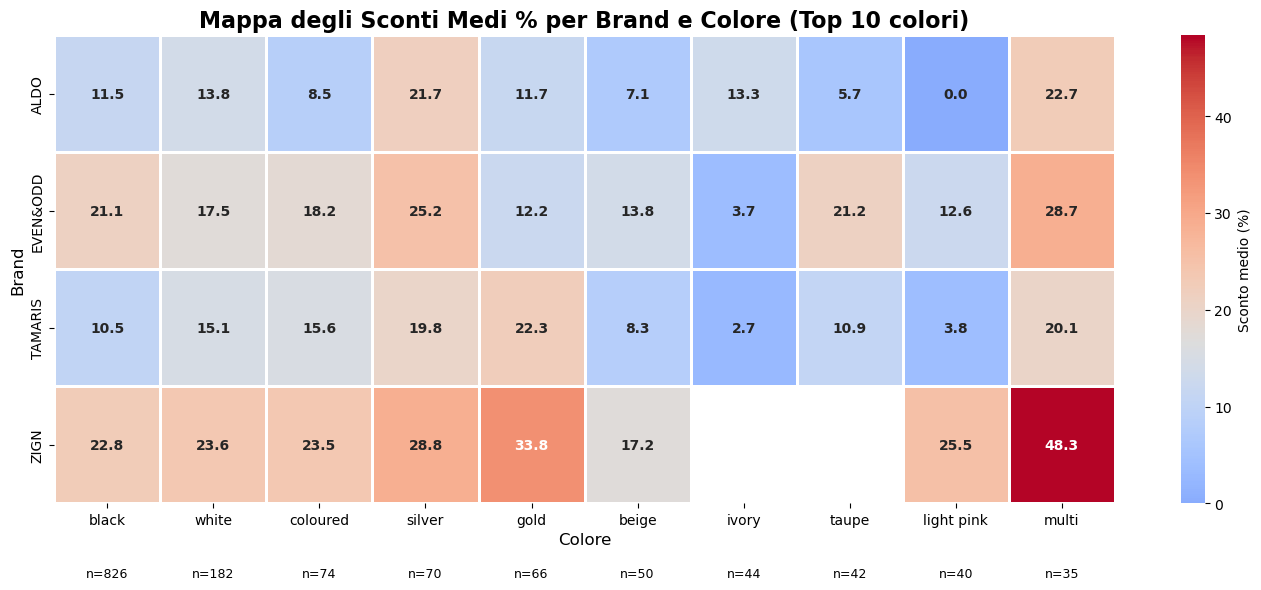

In [161]:
#Mappa degli Sconti Medi % per Brand e Colore (Top 10 colori)

db_completo = pd.merge(frequenzacoloriscarpe, db_scarpecompleto[['sconto_percentuale']], left_index = True, right_index = True)

#filtriamo solo i top 10 colori e imposta l'ordine
db_top_colori = db_completo[db_completo['colori'].isin(top_10_colori)]
db_top_colori['colori'] = pd.Categorical(db_top_colori['colori'],  categories = top_10_colori, ordered = True)

#calcoliamo la media degli sconti per marca e colore (ordinato)
sconti_medi_marca_colore = (db_top_colori.groupby(['marca', 'colori'])['sconto_percentuale'].mean().round(2).unstack()[top_10_colori])

plt.figure(figsize = (14, 6))
sns.heatmap(sconti_medi_marca_colore, annot = True, fmt = ".1f", cmap = "coolwarm", linewidths=1, center = sconti_medi_marca_colore.mean().mean(), cbar_kws = {'label': 'Sconto medio (%)'},
            square = False, annot_kws={'weight': 'bold'})
plt.title('Mappa degli Sconti Medi % per Brand e Colore (Top 10 colori)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Colore', fontsize = 12)
plt.ylabel('Brand', fontsize = 12)
plt.xticks(rotation = 0)

#aggiungiamo la legenda frequenza con allineamento perfetto
for i, colore in enumerate(top_10_colori):
    count = frequenzacoloriscarpe_statistica[colore]
    plt.text(i + 0.5,  -0.15,  # Posizione più stretta
        f"n={count}", ha = 'center', va = 'center', transform = plt.gca().get_xaxis_transform(),
        fontsize = 9, bbox = dict(facecolor = 'white', alpha = 0.7, edgecolor = 'none', boxstyle = 'round', pad = 0.2))

plt.tight_layout()
plt.savefig("sconti_medi_marca_colore.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

## Obiettivo: Analizziamo la distribuzione dei colori per ogni categoria in azienda.

### ALDO

In [164]:
#uniamo tutte le colonne colore in un'unica colonna tramite .melt()
frequenzacolorialdopercategoria = db_aldo[['categoria', 'colore_1', 'colore_2']].melt(id_vars=['categoria'], value_name='colori').dropna()

#raggruppiamo per categoria e otteniamo i colori unici come stringa separata da virgole
analisicolorealdopercategoria = frequenzacolorialdopercategoria.groupby('categoria')['colori'].apply(lambda x: ", ".join(sorted(set(x)))).reset_index()

pd.set_option('display.max_colwidth', None)  # Disabilita il troncamento
analisicolorealdopercategoria

categoria  \
0              Sneakers Basse   
1            Stivali classici   
2           Stivali invernali   
3             Stivali plateau   
4  Stivali sopra il ginocchio   
5          Stivali tacco alto   
6              Stivali texani   
7       Tacchi alti decollete   
8      Tacchi alti sandaletti   

                                                                                                                                                                                                                                                                                                                           colori  
0                                          beige, black, bright pink, champagne, coloured, cream, denim, gold, light pink, light yellow, multi, multi coloured, multi smooth, open grey, open pink, open white, other beige, other blue, other green, other white, pastel multi, silver, sky blue, white, white bone, white combo  
1                                                                                                                                                                                                                                                                                       beige overflow, black, dark brown, pewter  
2                                                                                                                                                                                             black, bone, coloured, light pink, medium brown, medium orange, multi, multi coloured, other pink, red, silver coloured, tan, white  
3                                                                                                                                                                                                                                                                                                                           black  
4                                                                                                                                                                                                                                                                                                              black, other black  
5                                                                                                                                    black, bone, coloured, dark brown, light pink, medium brown, medium orange, multi, multi coloured, other black, other dark beige, other pink, other red, pewter, red, silver coloured, white  
6                                                                                                                                                                                                                                                                                                                     other black  
7                                                                                                                                                                                                     black, bone, brown, coloured, gold, medium beige, medium brown, other black, other red, red, silver, silver coloured, white  
8  beige, black, blue, bone, brown, champagne, coloured, dark green, dark grey, gold, gold coloured, green, light beige, light brown, light pink, medium brown, medium orange, multi, multi coloured, natural, open pink, other black, other dark beige, other pink, other white, pink, red, sand, silver, silver coloured, white

In [165]:
#raggruppiamo per categoria e calcoliamo il numero di colori unici per ogni categoria
conteggiocolorialdopercategoria = frequenzacolorialdopercategoria.groupby('categoria')['colori'].nunique().reset_index()

conteggiocolorialdopercategoria.columns = ['Categoria', 'Numero di colori unici']  #cambiamo nome alle colonne

conteggiocolorialdopercategoria

Categoria  Numero di colori unici
0              Sneakers Basse                      26
1            Stivali classici                       4
2           Stivali invernali                      13
3             Stivali plateau                       1
4  Stivali sopra il ginocchio                       2
5          Stivali tacco alto                      17
6              Stivali texani                       1
7       Tacchi alti decollete                      13
8      Tacchi alti sandaletti                      31

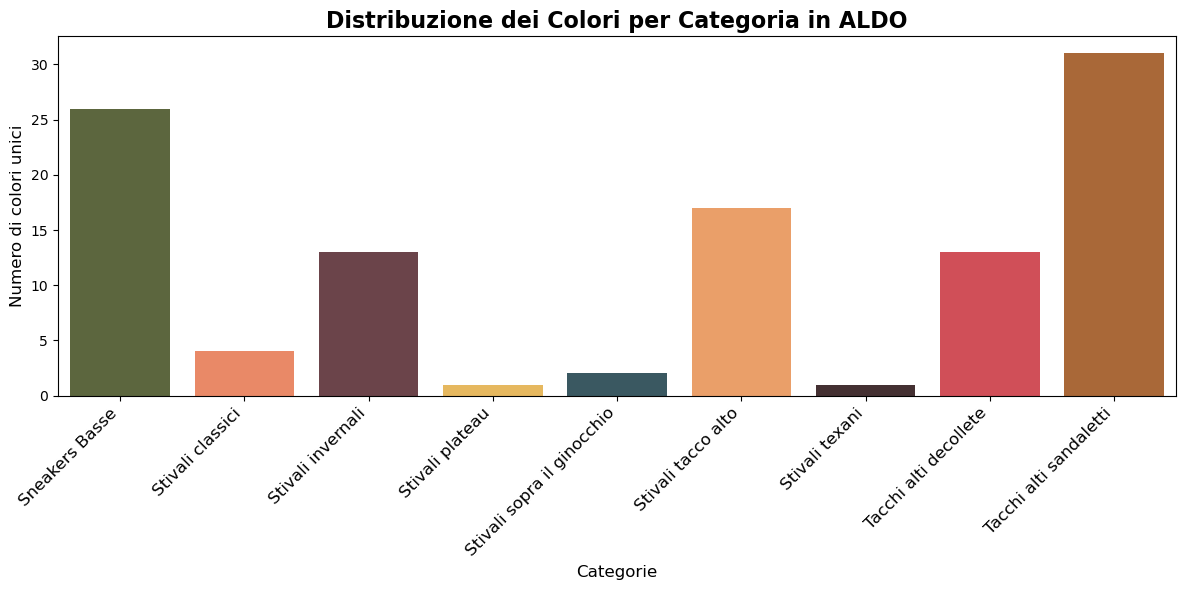

In [166]:
#Distribuzione dei Colori per Categoria in ALDO

plt.figure(figsize = (12, 6))
sns.barplot(data = conteggiocolorialdopercategoria, x = 'Categoria', y = 'Numero di colori unici', hue = 'Categoria', legend = False, palette = palette_aldo)
plt.xlabel('Categorie', fontsize = 12)
plt.ylabel('Numero di colori unici', fontsize = 12)
plt.title('Distribuzione dei Colori per Categoria in ALDO', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)
plt.tight_layout()
plt.savefig("conteggiocolorialdopercategoria.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

### EVEN&ODD

In [168]:
#uniamo tutte le colonne colore in un'unica colonna tramite .melt()
frequenzacolorievenpercategoria = db_even[['categoria', 'colore_1', 'colore_2','colore_3']].melt(id_vars=['categoria'], value_name='colori').dropna()

#raggruppiamo per categoria e otteniamo i colori unici come stringa separata da virgole
analisicoloreevenpercategoria = frequenzacolorievenpercategoria.groupby('categoria')['colori'].apply(lambda x: ", ".join(sorted(set(x)))).reset_index()

pd.set_option('display.max_colwidth', None)  # Disabilita il troncamento
analisicoloreevenpercategoria

categoria  \
0                Sneakers Alte   
1               Sneakers Basse   
2             Stivali classici   
3         Stivali con i tacchi   
4            Stivali invernali   
5              Stivali plateau   
6   Stivali sopra il ginocchio   
7           Stivali tacco alto   
8               Stivali texani   
9        Tacchi alti decollete   
10      Tacchi alti sandaletti   

                                                                                                             colori  
0                                                 beige denim, black, bleached blue, blue, light pink, taupe, white  
1                 beige, black, bleached denim, coloured, dark grey denim, light blue, off white, pink, sand, white  
2                                                                                                     black, silver  
3                                                                                                             black  
4                                                                                                      beige, black  
5                                                               black, brown, dark brown, grey, khaki, taupe, white  
6                                                                                                             black  
7                                                                  beige, black, cognac, dark red, gunmetal, silver  
8                                                                                     black, brown, dark grey, grey  
9                  gold,  turquoise, beige, black, blue denim, coloured, gold, light pink, pink, red, silver, white  
10  black, blue denim, gold, gunmetal, light pink, off white, orange, pink, red, silver, transparent, white, yellow

In [169]:
#raggruppiamo per categoria e calcoliamo il numero di colori unici per ogni categoria
conteggiocolorievenpercategoria = frequenzacolorievenpercategoria.groupby('categoria')['colori'].nunique().reset_index()

conteggiocolorievenpercategoria.columns = ['Categoria', 'Numero di colori unici'] #cambiamo nome alle colonne

conteggiocolorievenpercategoria

Categoria  Numero di colori unici
0                Sneakers Alte                       7
1               Sneakers Basse                      10
2             Stivali classici                       2
3         Stivali con i tacchi                       1
4            Stivali invernali                       2
5              Stivali plateau                       7
6   Stivali sopra il ginocchio                       1
7           Stivali tacco alto                       6
8               Stivali texani                       4
9        Tacchi alti decollete                      12
10      Tacchi alti sandaletti                      13

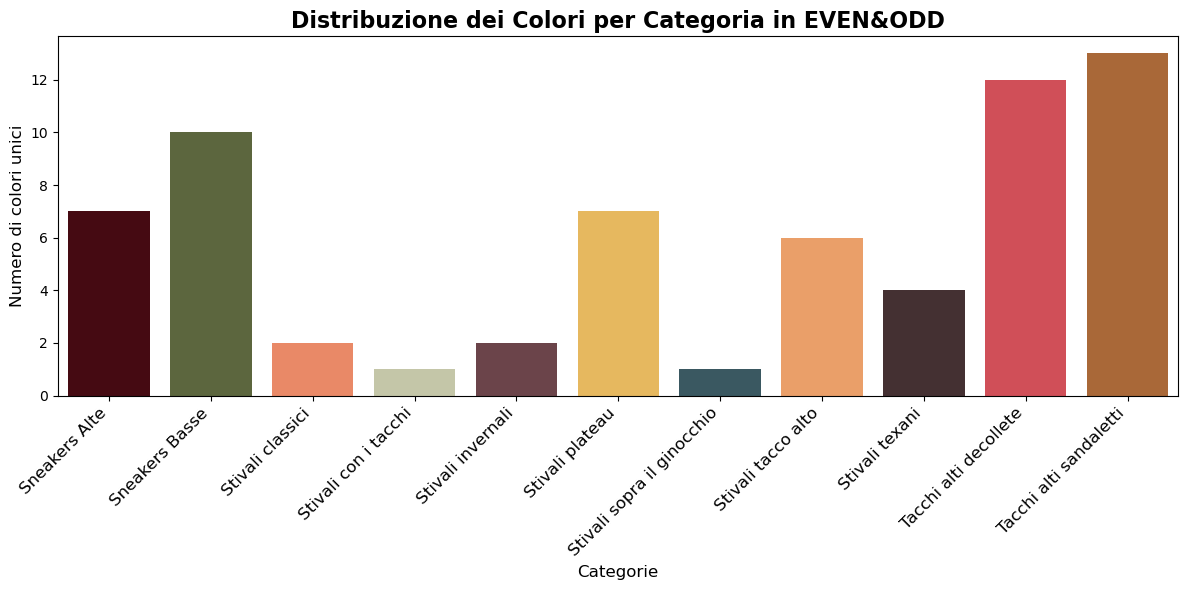

In [170]:
#Distribuzione dei colori per categoria in EVEN&ODD

plt.figure(figsize = (12, 6))
sns.barplot(data = conteggiocolorievenpercategoria, x = 'Categoria', y = 'Numero di colori unici', hue = 'Categoria', legend = False, palette = palette_even)
plt.xlabel('Categorie', fontsize = 12)
plt.ylabel('Numero di colori unici', fontsize = 12)
plt.title('Distribuzione dei Colori per Categoria in EVEN&ODD', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)
plt.tight_layout()
plt.savefig("conteggiocolorievenpercategoria.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

### TAMARIS

In [172]:
#uniamo tutte le colonne colore in un'unica colonna tramite .melt()
frequenzacoloritamarispercategoria = db_tamaris[['categoria', 'colore_1', 'colore_2']].melt(id_vars=['categoria'], value_name='colori').dropna()

#raggruppiamo per categoria e otteniamo i colori unici come stringa separata da virgole
analisicoloretamarispercategoria = frequenzacoloritamarispercategoria.groupby('categoria')['colori'].apply(lambda x: ", ".join(sorted(set(x)))).reset_index()

pd.set_option('display.max_colwidth', None)  # Disabilita il troncamento
analisicoloretamarispercategoria

categoria  \
0                Sneakers Alte   
1               Sneakers Basse   
2             Stivali classici   
3         Stivali con i tacchi   
4            Stivali invernali   
5              Stivali plateau   
6   Stivali sopra il ginocchio   
7           Stivali tacco alto   
8               Stivali texani   
9        Tacchi alti decollete   
10      Tacchi alti sandaletti   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            colori  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     black comb, black leopard, ivory, olive comb  
1   a white silver, antelope, anthracite, beige, beige comb, beige glam, beige gold, black, black comb, black gold, black leather, black nappa, black suede, black uni, brons, champagne, coloured, denim, denim blue, denim comb, denim nubuc, fuchsia comb, fuxia, fuxia comb, fuxia nubuc, gold, gold comb, gold silver, green comb, ivory, ivory comb, ivory macramee, ivory metallic, ivory struct, lavender, leopard, leopard comb, light blue, light gold, light green, light grey, light rose, lilac comb, lt blue, lt blue comb, lt gold, lt green nubuc, lt grey comb, lt grey silver, metallic comb, mint, multicolor, navy, offwhite, offwhite comb, offwht leo, olive comb, orange, orange comb, peach, peach comb, pearl, pink, pink comb, purple comb, red, red fuchsia, red rose, red suede, rose, rose comb, rose glam, rose gold, rose green, rose metallic, sage, sage comb, sand, silver comb, silver glam, sky, soft lemon, white, white black, white blue, white comb, white gold, white leather, white nappa, white pink, white red, white silver, white uni, wht rose gold, yellow, yellow green, yellow nubuc, zebra comb  
2                                                                                                                                                                                                                                                                                            

In [173]:
#raggruppiamo per categoria e calcoliamo il numero di colori unici per ogni categoria
conteggiocoloritamarispercategoria = frequenzacoloritamarispercategoria.groupby('categoria')['colori'].nunique().reset_index()

conteggiocoloritamarispercategoria.columns = ['Categoria', 'Numero di colori unici'] #cambiamo nome alle colonne

conteggiocoloritamarispercategoria

Categoria  Numero di colori unici
0                Sneakers Alte                       4
1               Sneakers Basse                      98
2             Stivali classici                       6
3         Stivali con i tacchi                       1
4            Stivali invernali                      24
5              Stivali plateau                       8
6   Stivali sopra il ginocchio                       1
7           Stivali tacco alto                       3
8               Stivali texani                       1
9        Tacchi alti decollete                       8
10      Tacchi alti sandaletti                      20

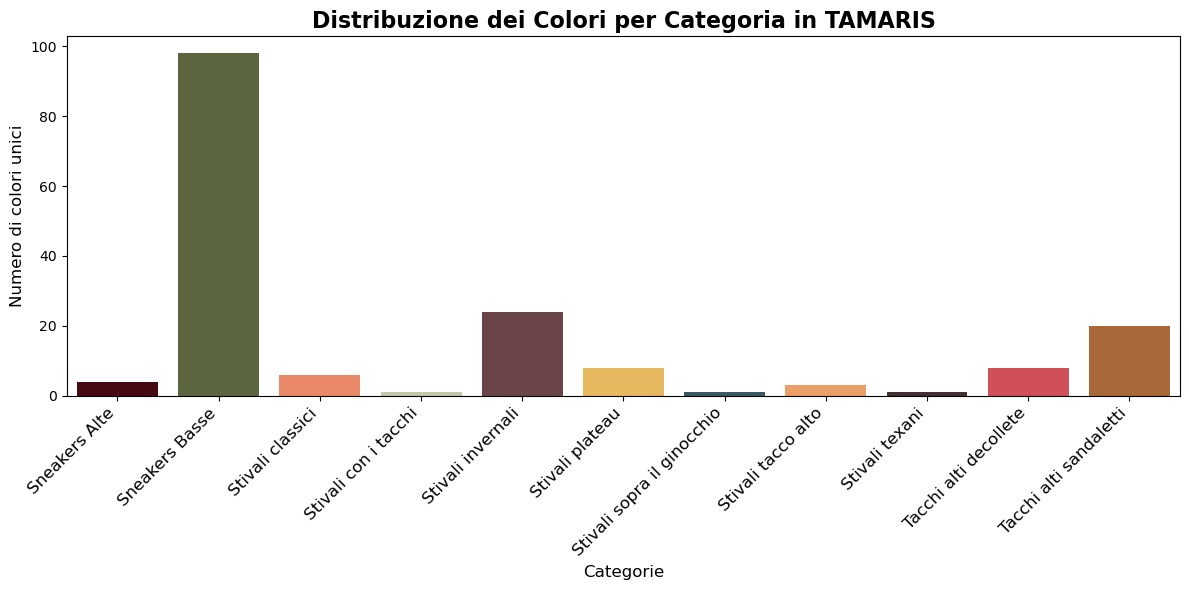

In [174]:
#Distribuzione dei Colori per Categoria in TAMARIS

plt.figure(figsize = (12, 6))
sns.barplot(data = conteggiocoloritamarispercategoria, x = 'Categoria', y = 'Numero di colori unici', hue = 'Categoria', legend = False, palette = palette_tamaris)
plt.xlabel('Categorie', fontsize = 12)
plt.ylabel('Numero di colori unici', fontsize = 12)
plt.title('Distribuzione dei Colori per Categoria in TAMARIS', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)
plt.tight_layout()
plt.savefig("conteggiocoloritamarispercategoria.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

### ZIGN

In [176]:
#uniamo tutte le colonne colore in un'unica colonna tramite .melt()
frequenzacolorizignpercategoria = db_zign[['categoria', 'colore_1', 'colore_2','colore_3']].melt(id_vars=['categoria'], value_name='colori').dropna()

#raggruppiamo per categoria e otteniamo i colori unici come stringa separata da virgole
analisicolorezignpercategoria = frequenzacolorizignpercategoria.groupby('categoria')['colori'].apply(lambda x: ", ".join(sorted(set(x)))).reset_index()

pd.set_option('display.max_colwidth', None)  # Disabilita il troncamento
analisicolorezignpercategoria

categoria                                              colori
0        Stivali classici                  beige, black, bordeaux, dark brown
1    Stivali con i tacchi                                               black
2       Stivali invernali       beige, black, cognac, grey, light pink, white
3         Stivali plateau                                               black
4      Stivali tacco alto       beige, black, bordeaux, dark brown, off white
5          Stivali texani                            beige, black, dark brown
6   Tacchi alti decollete  beige, black, brown, dark red, lilac, orange, pink
7  Tacchi alti sandaletti                                                gold

In [177]:
#raggruppiamo per categoria e calcoliamo il numero di colori unici per ogni categoria
conteggiocolorizignpercategoria = frequenzacolorizignpercategoria.groupby('categoria')['colori'].nunique().reset_index()

conteggiocolorizignpercategoria.columns = ['Categoria', 'Numero di colori unici'] #cambiamo nome alle colonne

conteggiocolorizignpercategoria

Categoria  Numero di colori unici
0        Stivali classici                       4
1    Stivali con i tacchi                       1
2       Stivali invernali                       6
3         Stivali plateau                       1
4      Stivali tacco alto                       5
5          Stivali texani                       3
6   Tacchi alti decollete                       7
7  Tacchi alti sandaletti                       1

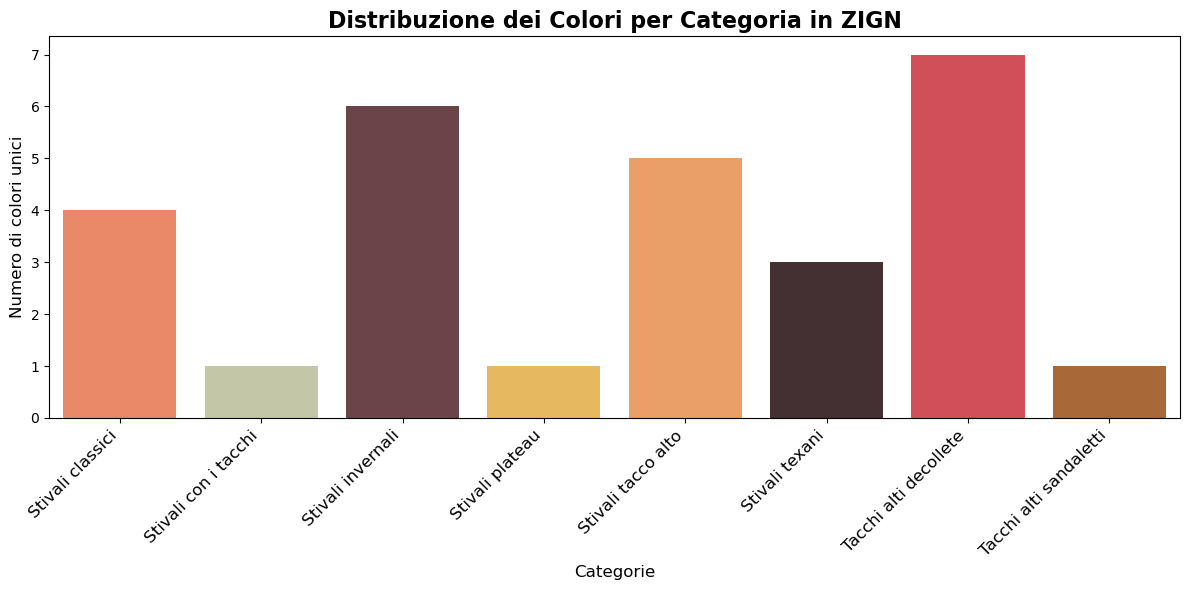

In [178]:
#Distribuzione dei Colori per Categoria in ZIGN

plt.figure(figsize = (12, 6))
sns.barplot(data = conteggiocolorizignpercategoria, x = 'Categoria', y = 'Numero di colori unici', hue = 'Categoria', legend = False, palette = palette_zign)
plt.xlabel('Categorie', fontsize = 12)
plt.ylabel('Numero di colori unici', fontsize = 12)
plt.title('Distribuzione dei Colori per Categoria in ZIGN', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)
plt.tight_layout()
plt.savefig("conteggiocolorizignpercategoria.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

## Obiettivo: Analizziamo la distribuzione dei colori per ogni taglia in azienda.

### ALDO

In [181]:
#uniamo tutte le colonne colore in un'unica colonna tramite .melt()
frequenzacolorialdopertaglia = db_aldo[['taglia', 'colore_1', 'colore_2']].melt(id_vars=['taglia'], value_name='colori').dropna()

#raggruppiamo per categoria e otteniamo i colori unici come stringa separata da virgole
analisicolorealdopertaglia = frequenzacolorialdopertaglia.groupby('taglia')['colori'].apply(lambda x: ", ".join(sorted(set(x)))).reset_index()

pd.set_option('display.max_colwidth', None)  # Disabilita il troncamento
analisicolorealdopertaglia

taglia  \
0     35.0   
1     36.0   
2     37.0   
3     37.5   
4     38.0   
5     38.5   
6     39.0   
7     40.0   
8     41.0   
9     42.5   
10    44.0   

                                                                                                                                                                                                                                                                                                                                                                                        colori  
0                                                                                                                                                                          beige overflow, black, brown, champagne, coloured, dark brown, dark green, dark grey, gold, light yellow, medium beige, multi, multi smooth, other black, other blue, other red, other white, pewter, silver, white  
1                                                                                                                                                                                                                          beige overflow, black, coloured, gold, medium brown, multi, open white, other black, other blue, other red, pastel multi, silver, sky blue, tan, white, white combo  
2                                                                                                                                                                                                                      beige overflow, black, champagne, coloured, gold coloured, multi, multi coloured, open white, other blue, pastel multi, red, sand, silver, sky blue, white, white combo  
3                                                                                                     beige, black, bone, brown, champagne, coloured, gold, gold coloured, light brown, light yellow, medium beige, medium brown, multi, multi coloured, multi smooth, natural, open white, other beige, other black, other blue, other green, other red, sand, silver, silver coloured, white  
4                                                                                                                 beige overflow, black, bone, brown, coloured, gold coloured, light pink, medium beige, medium orange, multi, multi coloured, open pink, open white, other black, other blue, other pink, other red, pewter, red, sand, silver, silver coloured, sky blue, white, white combo  
5                                                                                                       beige, black, bone, brown, champagne, coloured, dark grey, gold, gold coloured, light brown, medium beige, medium brown, medium orange, multi, multi coloured, natural, open grey, open pink, open white, other beige, other black, other green, sand, silver, tan, white, white combo  
6                                                                                                                                                   beige overflow, black, blue, bright pink, coloured, dark brown, dark green, gold, gold coloured, light beige, medium beige, medium orange, multi, natural, open white, other black, other blue, sand, silver, sky blue, white, white combo  
7                                                                                                                                                                              beige, black, bone, coloured, dark brown, denim, light pink, medium brown, multi, multi coloured, open white, other beige, other black, other blue, other dark beige, silver, sky blue, tan, white, white combo  
8                                                                                                                                           black, bone, coloured, gold, light pink, medium beige, medium brown, medium orange, multi, multi coloured, multi smooth, open white, other black, other green, other pink, other white, pink, red, silver, silver coloured, tan, white

In [182]:
#raggruppiamo per categoria e calcoliamo il numero di colori unici per ogni categoria
conteggiocolorialdopertaglia = frequenzacolorialdopertaglia.groupby('taglia')['colori'].nunique().reset_index()

conteggiocolorialdopertaglia.columns = ['Taglia', 'Numero di colori unici'] #cambiamo nome alle colonne

conteggiocolorialdopertaglia

Taglia  Numero di colori unici
0     35.0                      20
1     36.0                      16
2     37.0                      16
3     37.5                      26
4     38.0                      25
5     38.5                      27
6     39.0                      22
7     40.0                      20
8     41.0                      23
9     42.5                      35
10    44.0                      12

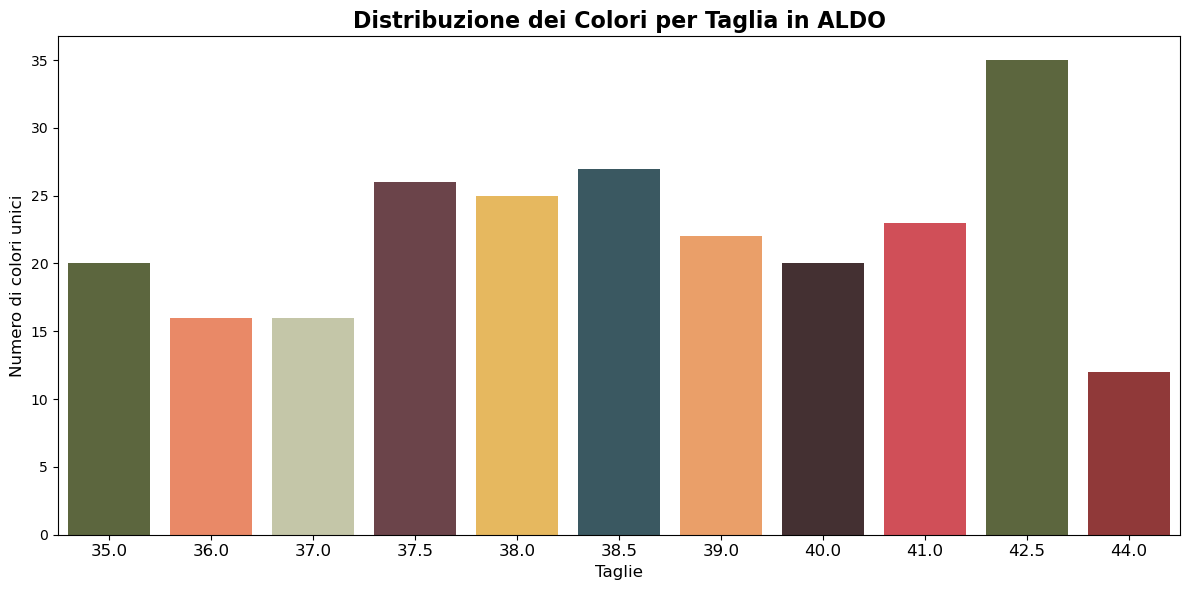

In [183]:
#Distribuzione dei colori per taglia in ALDO

palette_taglie_aldo = ['#606C38', '#FF7F51', '#C9CBA3', '#723D46', '#FCBF49', '#335C67', '#FF9B54', '#472D30', '#E63946', '#606C38', '#9E2A2B']
plt.figure(figsize = (12, 6))
sns.barplot(data = conteggiocolorialdopertaglia, x = 'Taglia', y = 'Numero di colori unici', hue = 'Taglia', legend = False, palette = palette_taglie_aldo)
plt.xlabel('Taglie', fontsize = 12)
plt.ylabel('Numero di colori unici', fontsize = 12)
plt.title('Distribuzione dei Colori per Taglia in ALDO', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.savefig("conteggiocolorialdopertaglia.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

### EVEN&ODD

In [185]:
#uniamo tutte le colonne colore in un'unica colonna tramite .melt()
frequenzacolorievenpertaglia = db_even[['taglia', 'colore_1', 'colore_2','colore_3']].melt(id_vars=['taglia'], value_name='colori').dropna()

#raggruppiamo per categoria e otteniamo i colori unici come stringa separata da virgole
analisicoloreevenpertaglia = frequenzacolorievenpertaglia.groupby('taglia')['colori'].apply(lambda x: ", ".join(sorted(set(x)))).reset_index()

pd.set_option('display.max_colwidth', None)  # Disabilita il troncamento
analisicoloreevenpertaglia

taglia  \
0     34.0   
1     35.0   
2     36.0   
3     37.0   
4     38.0   
5     39.0   
6     40.0   
7     41.0   
8     42.0   
9     43.0   
10    44.0   
11    45.0   

                                                                                                                                                                                                                        colori  
0                                                                                                                                                                                         black, coloured, gold, silver, taupe  
1                                                                          beige denim, black, bleached blue, blue, blue denim, coloured, dark brown, gold, gunmetal, light pink, off white, orange, red, silver, taupe, white  
2                                           beige, beige denim, black, bleached blue, blue, blue denim, brown, cognac, coloured, dark brown, dark grey, gold, grey, khaki, light pink, orange, pink, red, silver, taupe, white  
3                            beige, beige denim, black, bleached blue, blue, blue denim, brown, cognac, coloured, dark brown, dark grey denim, gold, grey, gunmetal, khaki, light pink, red, silver, taupe, transparent, white  
4                                                         beige, beige denim, black, bleached blue, blue, blue denim, brown, cognac, coloured, gold, grey, gunmetal, khaki, light pink, red, silver, taupe, transparent, white  
5                                                beige, beige denim, black, bleached blue, blue, blue denim, brown, cognac, coloured, dark brown, gold, grey, khaki, light blue, light pink, red, silver, taupe, white, yellow  
6                                                                    beige, beige denim, black, bleached blue, blue, blue denim, brown, cognac, coloured, dark brown, gold, grey, khaki, light pink, red, silver, taupe, white  
7               beige, beige denim, black, bleached blue, bleached denim, blue, blue denim, brown, cognac, coloured, dark brown, gold, grey, khaki, light blue, light pink, off white, pink, red, silver, taupe, white, yellow  
8   beige, beige denim, black, bleached blue, bleached denim, blue, blue denim, brown, cognac, coloured, dark brown, dark red, gold, grey, khaki, light blue, light pink, orange, pink, red, silver, taupe, transparent, white  
9                                                      beige, black, blue denim, cognac, coloured, dark brown, dark grey denim, gold, light blue, light pink, off white, orange, pink, red, sand, silver, taupe, white, yellow  
10                                                                                                                gold,  turquoise, beige, black, coloured, gold, light blue, off white, pink, red, sand, silver, taupe, white  
11                                                                                                    gold,  turquoise, beige, black, coloured, dark brown, gold, light blue, off white, pink, red, sand, silver, taupe, white

In [186]:
#raggruppiamo per categoria e calcoliamo il numero di colori unici per ogni categoria
conteggiocolorievenpertaglia = frequenzacolorievenpertaglia.groupby('taglia')['colori'].nunique().reset_index()

conteggiocolorievenpertaglia.columns = ['Taglia', 'Numero di colori unici'] #cambiamo il colore delle colonne

conteggiocolorievenpertaglia

Taglia  Numero di colori unici
0     34.0                       5
1     35.0                      16
2     36.0                      21
3     37.0                      21
4     38.0                      19
5     39.0                      20
6     40.0                      18
7     41.0                      23
8     42.0                      24
9     43.0                      19
10    44.0                      14
11    45.0                      15

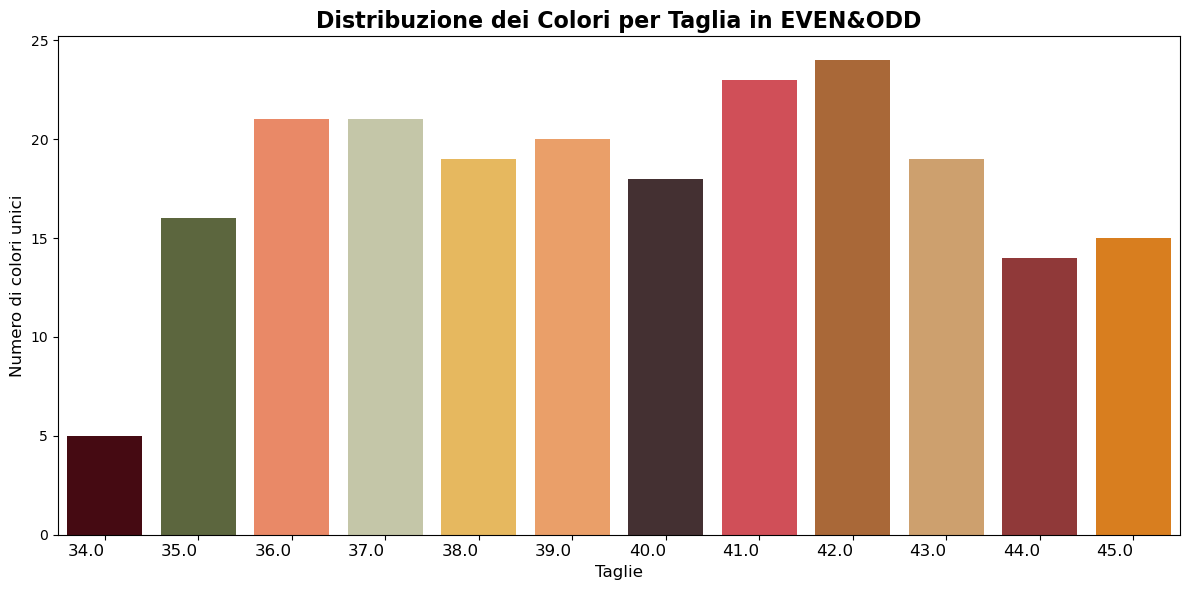

In [187]:
#Distribuzione dei colori per taglia in EVEN&ODD

palette_taglie_even = ['#4F000B','#606C38', '#FF7F51', '#C9CBA3', '#FCBF49', '#FF9B54', '#472D30', '#E63946', '#BC6525', '#DDA15E', '#9E2A2B', '#F77F00']
plt.figure(figsize = (12, 6))
sns.barplot(data = conteggiocolorievenpertaglia, x = 'Taglia', y = 'Numero di colori unici', hue = 'Taglia', legend = False, palette = palette_taglie_even)
plt.xlabel('Taglie', fontsize = 12)
plt.ylabel('Numero di colori unici', fontsize = 12)
plt.title('Distribuzione dei Colori per Taglia in EVEN&ODD', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 0, ha = 'right', fontsize = 12)
plt.tight_layout()
plt.savefig("conteggiocolorievenpertaglia.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

### TAMARIS

In [189]:
#uniamo tutte le colonne colore in un'unica colonna tramite .melt()
frequenzacoloritamarispertaglia = db_tamaris[['taglia', 'colore_1', 'colore_2']].melt(id_vars=['taglia'], value_name='colori').dropna()

#raggruppiamo per categoria e otteniamo i colori unici come stringa separata da virgole
analisicoloretamarispertaglia = frequenzacoloritamarispertaglia.groupby('taglia')['colori'].apply(lambda x: ", ".join(sorted(set(x)))).reset_index()

pd.set_option('display.max_colwidth', None)  # Disabilita il troncamento
analisicoloretamarispertaglia

taglia  \
0     35.0   
1     36.0   
2     37.0   
3     38.0   
4     39.0   
5     40.0   
6     41.0   
7     42.0   
8     43.0   
9     44.0   
10    45.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 colori  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     orange, pearl, tan, wht rose gold  
1                                                                                                                                                            antelope, anthracite, beige comb, beige fur, beige glam, beige gold, black, black comb, black lea fur, black nappa, black suede, black uni, brown, brown comb, camel, coloured, denim comb, fuxia comb, gold, gold comb, gold silver, green comb, grey, ivory, ivory struct, ivory uni, lavender, light gold, light green, light grey, light rose, lt blue comb, lt green nubuc, lt grey comb, metallic comb, mint, multicolor, navy, offwhite comb, offwht leo, olive comb, orange, orange comb, peach comb, pink, pink comb, purple comb, red, red rose, red suede, rose comb, rose glam, rose metallic, sage, sage comb, silver comb, silver glam, soft lemon, taupe, white, white comb, white red, white silver, wht rose gold, yellow  
2                                                  antelope, beige comb, beige fur, beige glam, black, black comb, black gold, black leopard, black nappa, black suede, black uni, blue, bronce comb, brown, brown comb, camel, champagne, cigar, coloured, corallo, cuoio, dark pink, denim, denim comb, fuxia, fuxia comb, gold, gold comb, gold silver, green comb, grey, ivory, ivory macramee, ivory metallic, ivory uni, lavender, light gold, light grey, light rose, lt blue comb, lt green nubuc, lt grey comb, metallic comb, mint, muscat, muscat comb, navy, offwhite comb, offwht leo, olive, olive comb, orange, orange comb, peach comb, pearl, pink, pink comb, purple comb, red rose, red suede, rose, rose comb, rose glam, rose green, sage, sage comb, silver glam, soft lemon, tan, taupe, taupe patent, white, white comb, white gold, white nappa, white uni, yellow, zebra comb  
3   antelope, anthracite, beige comb, beige glam, beige gold, black, black leather, black leopard, black nappa, black suede, black uni, blue, bronce comb, brown, brown comb, camel, cigar, cognac, coloured, cuoio, denim, denim comb, fuxia, fuxia comb, gold, gold comb, gold silver, green comb, grey, ivory, ivory macramee, ivory metallic, i

In [190]:
#raggruppiamo per categoria e calcoliamo il numero di colori unici per ogni categoria
conteggiocoloritamarispertaglia = frequenzacoloritamarispertaglia.groupby('taglia')['colori'].nunique().reset_index()

conteggiocoloritamarispertaglia.columns = ['Taglia', 'Numero di colori unici'] #cambiamo nome alle colonne

conteggiocoloritamarispertaglia

Taglia  Numero di colori unici
0     35.0                       4
1     36.0                      65
2     37.0                      78
3     38.0                      82
4     39.0                      80
5     40.0                      76
6     41.0                      71
7     42.0                      50
8     43.0                       1
9     44.0                       1
10    45.0                       1

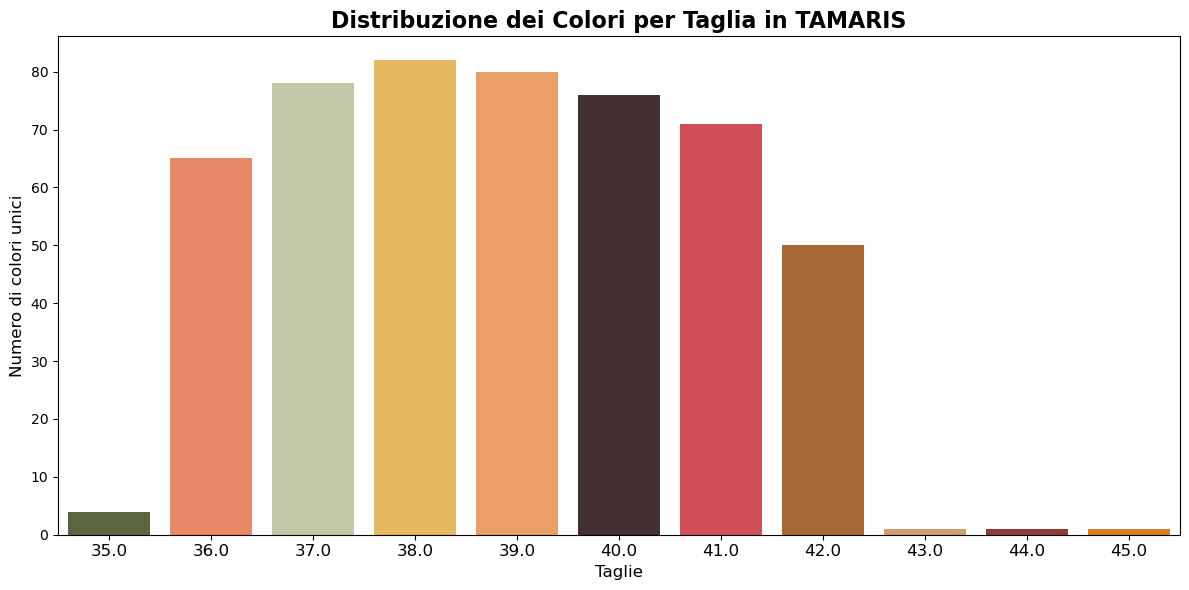

In [191]:
#Distribuzione dei Colori per Taglia in TAMARIS

palette_taglie_tamaris = ['#606C38', '#FF7F51', '#C9CBA3', '#FCBF49', '#FF9B54', '#472D30', '#E63946', '#BC6525', '#DDA15E', '#9E2A2B', '#F77F00']
plt.figure(figsize = (12, 6))
sns.barplot(data = conteggiocoloritamarispertaglia, x = 'Taglia', y = 'Numero di colori unici', hue = 'Taglia', legend = False, palette = palette_taglie_tamaris)
plt.xlabel('Taglie', fontsize = 12)
plt.ylabel('Numero di colori unici', fontsize = 12)
plt.title('Distribuzione dei Colori per Taglia in TAMARIS', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.savefig("conteggiocoloritamarispertaglia.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

### ZIGN

In [193]:
#uniamo tutte le colonne colore in un'unica colonna tramite .melt()
frequenzacolorizignpertaglia = db_zign[['taglia', 'colore_1', 'colore_2', 'colore_3']].melt(id_vars=['taglia'], value_name='colori').dropna()

#raggruppiamo per categoria e otteniamo i colori unici come stringa separata da virgole
analisicolorezignpertaglia = frequenzacolorizignpertaglia.groupby('taglia')['colori'].apply(lambda x: ", ".join(sorted(set(x)))).reset_index()

pd.set_option('display.max_colwidth', None)  # Disabilita il troncamento
analisicolorezignpertaglia

taglia  \
0     35.0   
1     36.0   
2     37.0   
3     38.0   
4     39.0   
5     40.0   
6     41.0   
7     42.0   
8     43.0   
9     44.0   
10    45.0   

                                                                                                colori  
0                                                         black, dark brown, grey, lilac, orange, pink  
1                                 beige, black, bordeaux, grey, light pink, lilac, orange, pink, white  
2                                beige, black, grey, light pink, lilac, off white, orange, pink, white  
3                            black, bordeaux, brown, dark brown, grey, light pink, lilac, orange, pink  
4                                    beige, black, brown, grey, light pink, lilac, orange, pink, white  
5                                beige, black, cognac, dark brown, dark red, grey, lilac, orange, pink  
6                                      beige, black, bordeaux, cognac, light pink, lilac, orange, pink  
7   beige, black, bordeaux, brown, dark brown, gold, light pink, lilac, off white, orange, pink, white  
8                                                 beige, black, light pink, lilac, orange, pink, white  
9                                                beige, black, cognac, light pink, lilac, orange, pink  
10                                        beige, black, cognac, light pink, lilac, orange, pink, white

In [194]:
#raggruppiamo per categoria e calcoliamo il numero di colori unici per ogni categoria
conteggiocolorizignpertaglia = frequenzacolorizignpertaglia.groupby('taglia')['colori'].nunique().reset_index()

conteggiocolorizignpertaglia.columns = ['Taglia', 'Numero di colori unici'] #cambiamo nome alle colonne

conteggiocolorizignpertaglia

Taglia  Numero di colori unici
0     35.0                       6
1     36.0                       9
2     37.0                       9
3     38.0                       9
4     39.0                       9
5     40.0                       9
6     41.0                       8
7     42.0                      12
8     43.0                       7
9     44.0                       7
10    45.0                       8

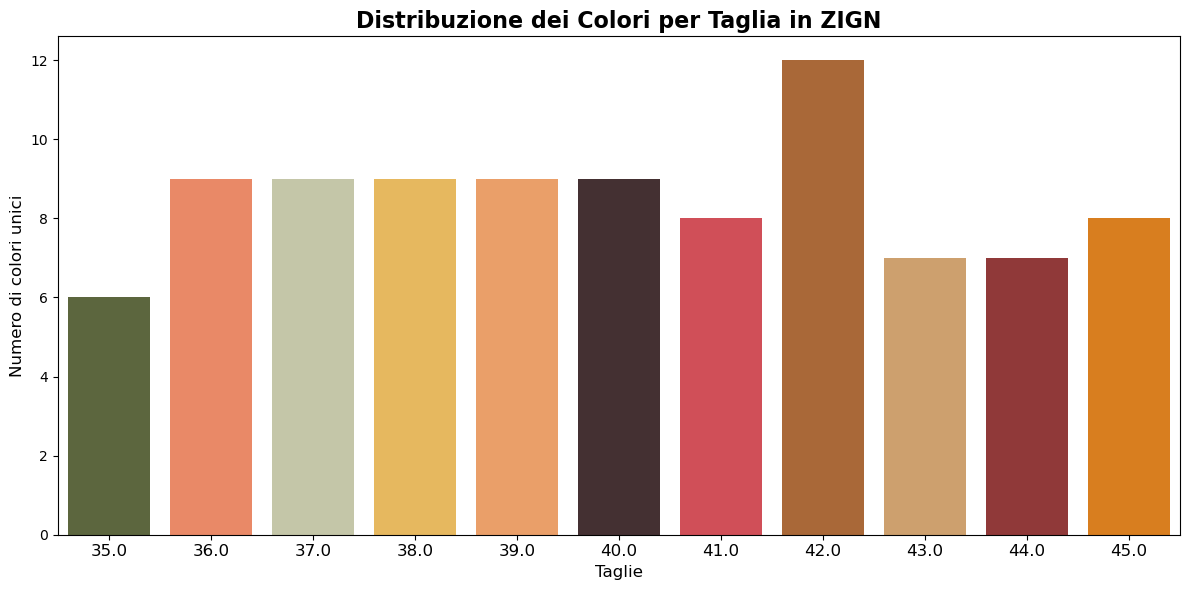

In [198]:
#Distribuzione dei colori per taglia in ZIGN

palette_taglie_zign = ['#606C38', '#FF7F51', '#C9CBA3', '#FCBF49', '#FF9B54', '#472D30', '#E63946', '#BC6525', '#DDA15E', '#9E2A2B', '#F77F00']
plt.figure(figsize = (12, 6))
sns.barplot(data = conteggiocolorizignpertaglia, x = 'Taglia', y = 'Numero di colori unici', hue = 'Taglia', legend = False, palette = palette_taglie_zign)
plt.xlabel('Taglie', fontsize = 12)
plt.ylabel('Numero di colori unici', fontsize = 12)
plt.title('Distribuzione dei Colori per Taglia in ZIGN', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.savefig("conteggiocolorizignpertaglia.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

# ANALISI SULLE TAGLIE

## Obiettivo: Analizziamo quante e quali taglie sono presenti in ogni azienda.

### ALDO

In [200]:
frequenzatagliealdo_statistica = db_aldo['taglia'].value_counts().sort_index()
frequenzatagliealdo_statistica.to_frame()

count
taglia       
35.0       41
36.0       36
37.0       32
37.5       50
38.0       50
38.5       56
39.0       37
40.0       36
41.0       50
42.5       88
44.0       16

In [202]:
#calcoliamo la frequenza in percentuale
frequenzatagliealdo_percentuale = (db_aldo['taglia'].value_counts(normalize = True) * 100).round(2).sort_index()
display(frequenzatagliealdo_percentuale.to_frame())

proportion
taglia            
35.0          8.33
36.0          7.32
37.0          6.50
37.5         10.16
38.0         10.16
38.5         11.38
39.0          7.52
40.0          7.32
41.0         10.16
42.5         17.89
44.0          3.25

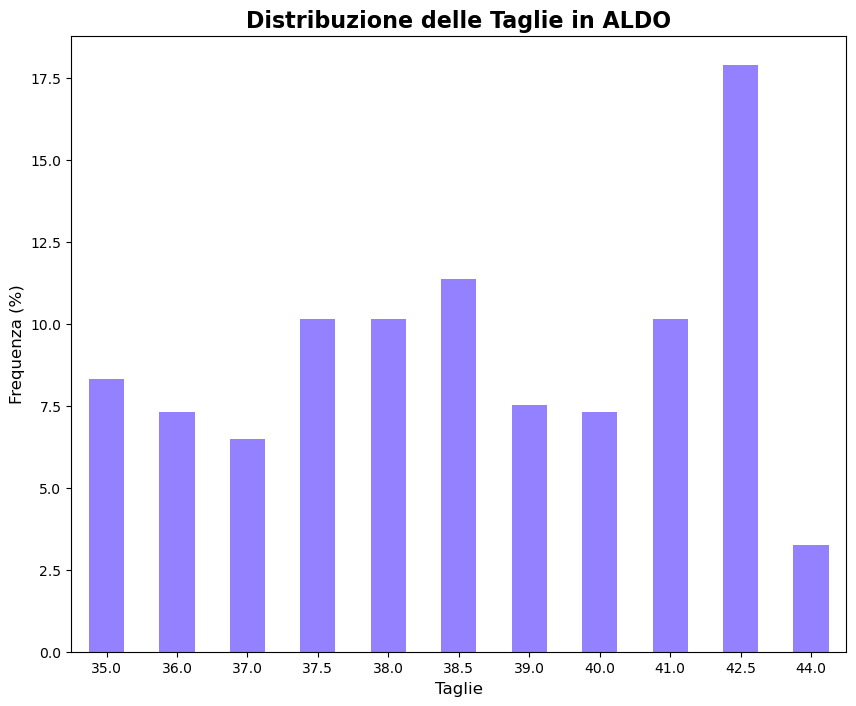

In [204]:
#Distribuzione delle Taglie in ALDO

plt.figure(figsize = (10, 8))
frequenzatagliealdo_percentuale.plot(kind = "bar", color = "#9381FF")
plt.xlabel("Taglie", fontsize = 12)
plt.ylabel("Frequenza (%)", fontsize = 12)
plt.title("Distribuzione delle Taglie in ALDO", fontsize = 16, fontweight = 'bold' )
plt.xticks(rotation = 0, fontsize = 10)
plt.savefig("frequenzatagliealdo_percentuale.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

### EVEN&ODD

In [207]:
frequenzataglieeven_statistica = db_even['taglia'].value_counts().sort_index()
frequenzataglieeven_statistica.to_frame()

count
taglia       
34.0        7
35.0       61
36.0       83
37.0       85
38.0       75
39.0       83
40.0       71
41.0       91
42.0      101
43.0       60
44.0       22
45.0       22

In [209]:
#calcoliamo la frequenza in percentuale
frequenzataglieeven_percentuale = (db_even['taglia'].value_counts(normalize=True) * 100 ).round(2).sort_index()
frequenzataglieeven_percentuale.to_frame()

proportion
taglia            
34.0          0.92
35.0          8.02
36.0         10.91
37.0         11.17
38.0          9.86
39.0         10.91
40.0          9.33
41.0         11.96
42.0         13.27
43.0          7.88
44.0          2.89
45.0          2.89

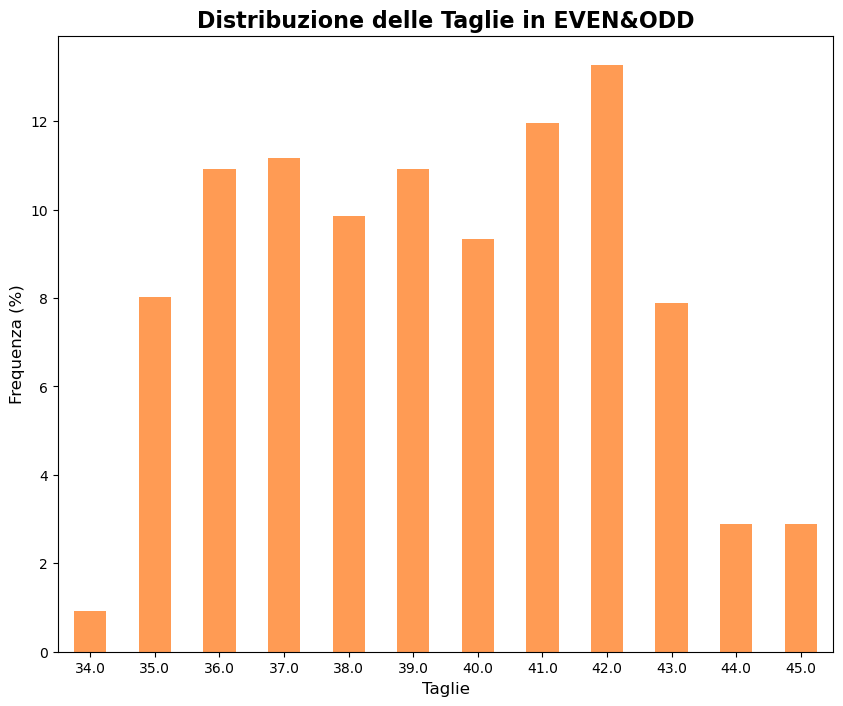

In [211]:
#Distribuzione delle Taglie in EVEN&ODD

plt.figure(figsize = (10,8))
frequenzataglieeven_percentuale.plot(kind = "bar", color = "#FF9B54")
plt.xlabel("Taglie", fontsize = 12)
plt.ylabel("Frequenza (%)", fontsize = 12)
plt.title("Distribuzione delle Taglie in EVEN&ODD", fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 10)
plt.savefig("frequenzataglieeven_percentuale.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

### TAMARIS

In [214]:
frequenzataglietamaris_statistica = db_tamaris['taglia'].value_counts().sort_index()
frequenzataglietamaris_statistica.to_frame()

count
taglia       
35.0        4
36.0      131
37.0      152
38.0      144
39.0      148
40.0      147
41.0      125
42.0       91
43.0        1
44.0        1
45.0        1

In [216]:
#calcoliamo la frequenza in percentuale
frequenzataglietamaris_percentuale = (db_tamaris['taglia'].value_counts(normalize=True) * 100 ).round(2).sort_index()
frequenzataglietamaris_percentuale.to_frame()

proportion
taglia            
35.0          0.42
36.0         13.86
37.0         16.08
38.0         15.24
39.0         15.66
40.0         15.56
41.0         13.23
42.0          9.63
43.0          0.11
44.0          0.11
45.0          0.11

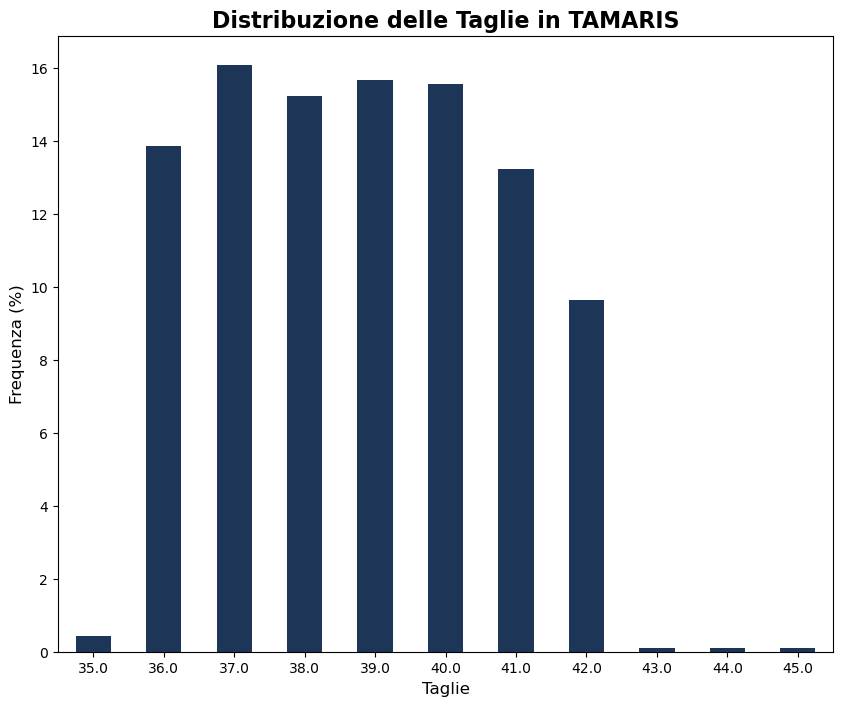

In [218]:
#Distribuzione delle Ttaglie in TAMARIS

plt.figure(figsize = (10,8))
frequenzataglietamaris_percentuale.plot(kind = "bar", color = "#1D3557")
plt.xlabel("Taglie", fontsize = 12)
plt.ylabel("Frequenza (%)", fontsize = 12)
plt.title("Distribuzione delle Taglie in TAMARIS", fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 10)
plt.savefig("frequenzataglietamaris_percentuale.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

### ZIGN

In [221]:
frequenzatagliezign_statistica = db_zign['taglia'].value_counts().sort_index()
frequenzatagliezign_statistica.to_frame()

count
taglia       
35.0       10
36.0       27
37.0       24
38.0       28
39.0       18
40.0       16
41.0       23
42.0       21
43.0        4
44.0        4
45.0        5

In [223]:
#calcoliamo la frequenza in percentuale
frequenzatagliezign_percentuale = (db_zign['taglia'].value_counts(normalize=True) * 100 ).round(2).sort_index()
frequenzatagliezign_percentuale.to_frame()

proportion
taglia            
35.0          5.56
36.0         15.00
37.0         13.33
38.0         15.56
39.0         10.00
40.0          8.89
41.0         12.78
42.0         11.67
43.0          2.22
44.0          2.22
45.0          2.78

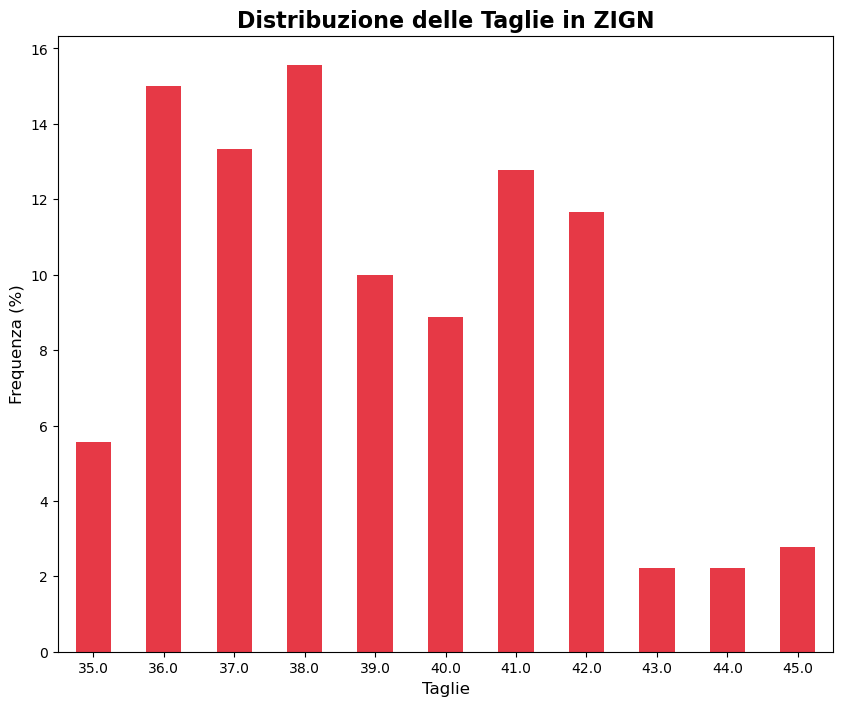

In [225]:
#Distribuzione delle Taglie in ZIGN

plt.figure(figsize = (10,8))
frequenzatagliezign_percentuale.plot(kind = "bar", color = "#E63946")
plt.xlabel("Taglie", fontsize = 12)
plt.ylabel("Frequenza (%)", fontsize = 12)
plt.title("Distribuzione delle Taglie in ZIGN", fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 10)
plt.savefig("frequenzatagliezign_percentuale.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

### COMPLESSIVA

In [227]:
#quali taglie di scarpe abbiamo nel db
db_scarpe["taglia"].unique()

array([35. , 36. , 37. , 38. , 39. , 40. , 41. , 42. , 42.5, 43. , 38.5,
       44. , 45. , 34. , 37.5])

In [229]:
#quante sono le taglie disponibili
len(db_scarpe["categoria"].unique())

11

In [231]:
#raggruppiamo per marca e taglia e contiamo il numero di prodotti disponobili
analisimarchepertaglie = db_scarpe.groupby(['marca', 'taglia'])['nome_prodotto'].count()

pd.set_option('display.max_rows', None)  #mostriamo tutte le righe
analisimarchepertaglie.to_frame()

nome_prodotto
marca    taglia               
ALDO     35.0               41
         36.0               36
         37.0               32
         37.5               50
         38.0               50
         38.5               56
         39.0               37
         40.0               36
         41.0               50
         42.5               88
         44.0               16
EVEN&ODD 34.0                7
         35.0               61
         36.0               83
         37.0               85
         38.0               75
         39.0               83
         40.0               71
         41.0               91
         42.0              101
         43.0               60
         44.0               22
         45.0               22
TAMARIS  35.0                4
         36.0              131
         37.0              152
         38.0              144
         39.0              148
         40.0              147
         41.0              125
         42.0               91
         43.0                1
         44.0                1
         45.0                1
ZIGN     35.0               10
         36.0               27
         37.0               24
         38.0               28
         39.0               18
         40.0               16
         41.0               23
         42.0               21
         43.0                4
         44.0                4
         45.0                5

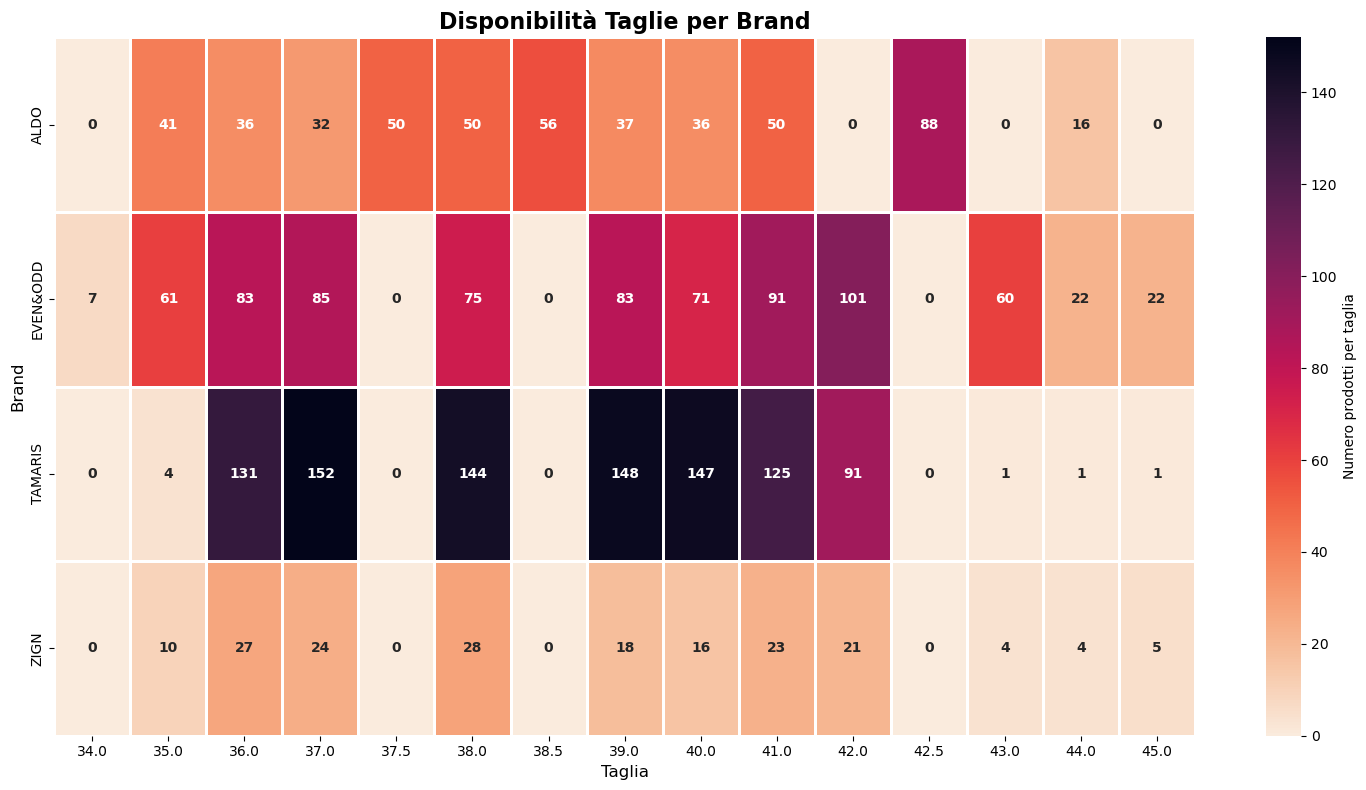

In [233]:
#Disponibilità Taglie per Brand

#tabella pivot
pivot_table_marca_taglia = analisimarchepertaglie.unstack(level = 'taglia').fillna(0)
plt.figure(figsize = (15, 8))
sns.heatmap(pivot_table_marca_taglia, annot = True, fmt = 'g', cmap = 'rocket_r', cbar_kws = {'label': 'Numero prodotti per taglia'}, annot_kws = {'weight': 'bold'},linewidths = 1)
plt.title('Disponibilità Taglie per Brand', fontsize = 16, fontweight = 'bold')
plt.xlabel('Taglia', fontsize = 12)
plt.ylabel('Brand', fontsize = 12)
plt.tight_layout()
plt.savefig("pivot_table_marca_taglia.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

## Obiettivo: Analizziamo la distribuzione delle taglie per ogni categoria in azienda.

### ALDO

In [236]:
#raggruppiamo per taglia e categoria e contiamo le taglie disponibili
analisitagliaaldopercategoria = db_aldo.groupby(['taglia', 'categoria'])['taglia'].count()

pd.set_option('display.max_rows', None)
analisitagliaaldopercategoria.to_frame()

taglia
taglia categoria                         
35.0   Sneakers Basse                  15
       Stivali classici                 3
       Stivali sopra il ginocchio       2
       Stivali tacco alto               4
       Tacchi alti decollete           10
       Tacchi alti sandaletti           7
36.0   Sneakers Basse                  17
       Stivali classici                 1
       Stivali invernali                1
       Stivali sopra il ginocchio       1
       Stivali tacco alto               3
       Stivali texani                   1
       Tacchi alti decollete           10
       Tacchi alti sandaletti           2
37.0   Sneakers Basse                  15
       Stivali classici                 2
       Stivali tacco alto               3
       Tacchi alti decollete            9
       Tacchi alti sandaletti           3
37.5   Sneakers Basse                  20
       Stivali sopra il ginocchio       1
       Stivali tacco alto               1
       Tacchi alti decollete            8
       Tacchi alti sandaletti          20
38.0   Sneakers Basse                  14
       Stivali classici                 3
       Stivali invernali                1
       Stivali sopra il ginocchio       2
       Stivali tacco alto               3
       Tacchi alti decollete            8
       Tacchi alti sandaletti          19
38.5   Sneakers Basse                  21
       Stivali invernali                1
       Stivali tacco alto               2
       Stivali texani                   1
       Tacchi alti decollete           10
       Tacchi alti sandaletti          21
39.0   Sneakers Basse                  13
       Stivali classici                 2
       Stivali invernali                1
       Stivali tacco alto               2
       Tacchi alti decollete            6
       Tacchi alti sandaletti          13
40.0   Sneakers Basse                  18
       Stivali classici                 3
       Stivali invernali                2
       Stivali tacco alto               5
       Stivali texani                   1
       Tacchi alti decollete            4
       Tacchi alti sandaletti           3
41.0   Sneakers Basse                   7
       Stivali classici                 2
       Stivali invernali               17
       Stivali plateau                  1
       Stivali sopra il ginocchio       2
       Stivali tacco alto               4
       Tacchi alti decollete            6
       Tacchi alti sandaletti          11
42.5   Sneakers Basse                  22
       Stivali classici                 1
       Stivali invernali                1
       Stivali tacco alto               5
       Tacchi alti decollete           23
       Tacchi alti sandaletti          36
44.0   Stivali tacco alto              15
       Tacchi alti sandaletti           1

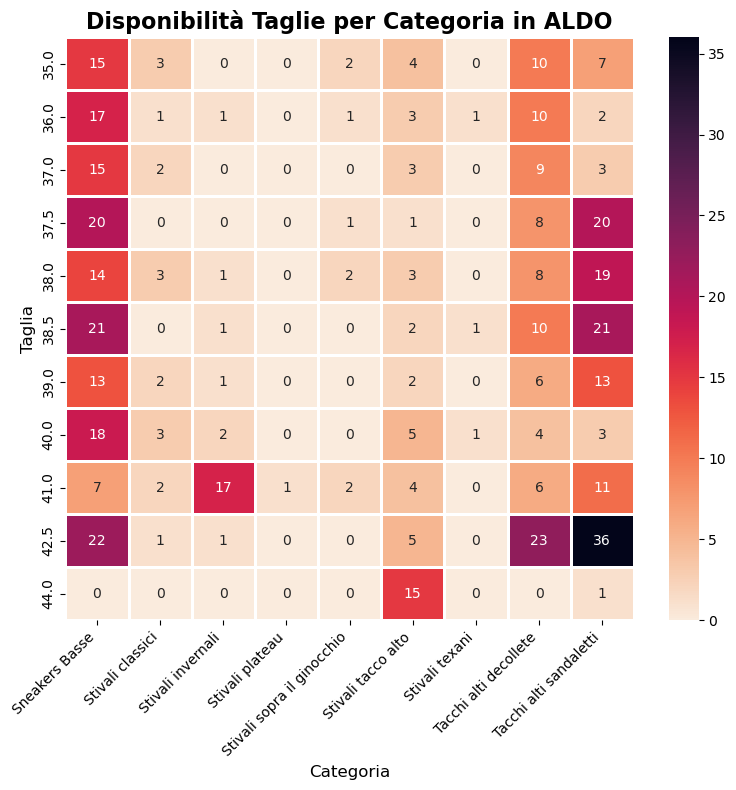

In [238]:
#Disponibilità Taglie per Categoria (ALDO)

pivot_table_aldo = analisitagliaaldopercategoria.unstack(level = 'categoria').fillna(0)
plt.figure(figsize = (8, 8))
sns.heatmap(pivot_table_aldo, annot = True, fmt = 'g', cmap = 'rocket_r', linewidths = 1)
plt.title('Disponibilità Taglie per Categoria in ALDO', fontsize = 16, fontweight = 'bold')
plt.xlabel('Categoria', fontsize = 12)
plt.ylabel('Taglia', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.savefig("pivot_table_aldo.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

In [239]:
#raggruppiamo per taglia e categoria e raccogliamo le categorie corrispondenti
categoriealdopertaglia = db_aldo.groupby('taglia')['categoria'].apply(lambda x: ", ".join(sorted(set(x)))).reset_index()

categoriealdopertaglia.columns = ['Taglia', 'Categorie corrispondenti'] #cambiamo nome alle colonne

pd.set_option('display.max_colwidth', None)  # Disabilita il troncamento
categoriealdopertaglia

Taglia  \
0     35.0   
1     36.0   
2     37.0   
3     37.5   
4     38.0   
5     38.5   
6     39.0   
7     40.0   
8     41.0   
9     42.5   
10    44.0   

                                                                                                                                               Categorie corrispondenti  
0                                       Sneakers Basse, Stivali classici, Stivali sopra il ginocchio, Stivali tacco alto, Tacchi alti decollete, Tacchi alti sandaletti  
1    Sneakers Basse, Stivali classici, Stivali invernali, Stivali sopra il ginocchio, Stivali tacco alto, Stivali texani, Tacchi alti decollete, Tacchi alti sandaletti  
2                                                                   Sneakers Basse, Stivali classici, Stivali tacco alto, Tacchi alti decollete, Tacchi alti sandaletti  
3                                                         Sneakers Basse, Stivali sopra il ginocchio, Stivali tacco alto, Tacchi alti decollete, Tacchi alti sandaletti  
4                    Sneakers Basse, Stivali classici, Stivali invernali, Stivali sopra il ginocchio, Stivali tacco alto, Tacchi alti decollete, Tacchi alti sandaletti  
5                                                  Sneakers Basse, Stivali invernali, Stivali tacco alto, Stivali texani, Tacchi alti decollete, Tacchi alti sandaletti  
6                                                Sneakers Basse, Stivali classici, Stivali invernali, Stivali tacco alto, Tacchi alti decollete, Tacchi alti sandaletti  
7                                Sneakers Basse, Stivali classici, Stivali invernali, Stivali tacco alto, Stivali texani, Tacchi alti decollete, Tacchi alti sandaletti  
8   Sneakers Basse, Stivali classici, Stivali invernali, Stivali plateau, Stivali sopra il ginocchio, Stivali tacco alto, Tacchi alti decollete, Tacchi alti sandaletti  
9                                                Sneakers Basse, Stivali classici, Stivali invernali, Stivali tacco alto, Tacchi alti decollete, Tacchi alti sandaletti  
10                                                                                                                           Stivali tacco alto, Tacchi alti sandaletti

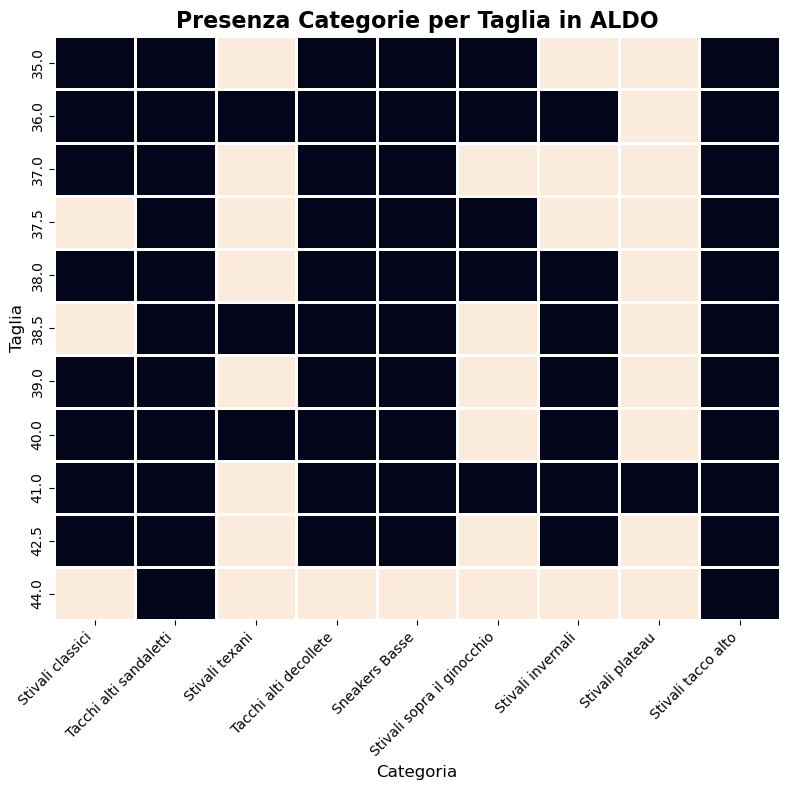

In [242]:
#Presenza categorie per Taglia in ALDO

#creiamo una matrice binaria (1 = categoria presente, 0 = assente)
categorie_lista = categoriealdopertaglia['Categorie corrispondenti'].str.split(', ')
categorie_uniche = list(set([cat for sublist in categorie_lista for cat in sublist]))

heatmap_data = []
for taglia in categoriealdopertaglia['Taglia']:
    categorie_taglia = categoriealdopertaglia.loc[categoriealdopertaglia['Taglia'] == taglia, 'Categorie corrispondenti'].iloc[0].split(', ')
    heatmap_data.append([1 if cat in categorie_taglia else 0 for cat in categorie_uniche])

heatmap_df_aldo = pd.DataFrame(heatmap_data, index=categoriealdopertaglia['Taglia'], columns = categorie_uniche)

plt.figure(figsize = (8, 8))
sns.heatmap(heatmap_df_aldo, cmap = 'rocket_r', cbar = False, linewidths = 1 )
plt.title('Presenza Categorie per Taglia in ALDO', fontsize = 16, fontweight = 'bold')
plt.xlabel('Categoria', fontsize = 12)
plt.ylabel('Taglia', fontsize = 12)
plt.xticks(rotation = 45, ha ='right')
plt.tight_layout()
plt.savefig("heatmap_df_aldo.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

In [244]:
#raggruppiamo per categoria e calcoliamo il numero di taglie uniche per ogni categoria
conteggiotagliealdopercategoria = db_aldo.groupby('categoria')['taglia'].nunique().reset_index()

conteggiotagliealdopercategoria.columns = ['Categoria', 'Numero di taglie uniche'] #cambiamo nome alle colonne

conteggiotagliealdopercategoria

Categoria  Numero di taglie uniche
0              Sneakers Basse                       10
1            Stivali classici                        8
2           Stivali invernali                        7
3             Stivali plateau                        1
4  Stivali sopra il ginocchio                        5
5          Stivali tacco alto                       11
6              Stivali texani                        3
7       Tacchi alti decollete                       10
8      Tacchi alti sandaletti                       11

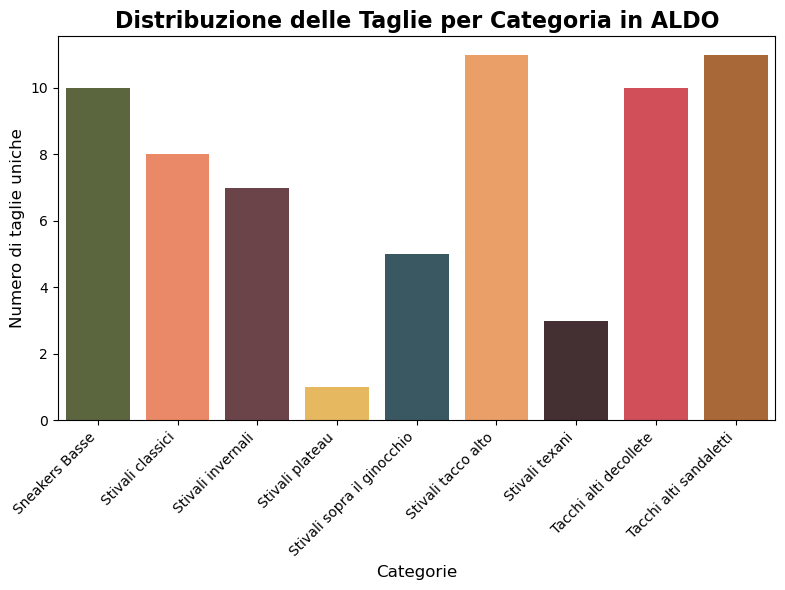

In [246]:
#Distribuzione delle Taglie per Categoria in ALDO

plt.figure(figsize = (8, 6))
sns.barplot(data = conteggiotagliealdopercategoria, x = 'Categoria', y = 'Numero di taglie uniche', hue = 'Categoria', legend = False, palette = palette_aldo)
plt.xlabel('Categorie', fontsize = 12)
plt.ylabel('Numero di taglie uniche', fontsize = 12)
plt.title('Distribuzione delle Taglie per Categoria in ALDO', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.tight_layout()
plt.savefig("conteggiotagliealdopercategoria.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

### EVEN&ODD

In [248]:
#raggruppiamo per taglia e categoria e contiamo le taglie disponibili
analisitagliaevenpercategoria = db_even.groupby(['taglia', 'categoria'])['taglia'].count()

pd.set_option('display.max_rows', None)
analisitagliaevenpercategoria.to_frame()

taglia
taglia categoria                         
34.0   Stivali plateau                  3
       Tacchi alti decollete            3
       Tacchi alti sandaletti           1
35.0   Sneakers Alte                    9
       Sneakers Basse                   3
       Stivali classici                 3
       Stivali invernali                1
       Stivali plateau                  6
       Stivali sopra il ginocchio       6
       Stivali tacco alto               7
       Tacchi alti decollete           11
       Tacchi alti sandaletti          15
36.0   Sneakers Alte                   10
       Sneakers Basse                   8
       Stivali classici                 5
       Stivali con i tacchi             2
       Stivali invernali                1
       Stivali plateau                 14
       Stivali sopra il ginocchio       4
       Stivali tacco alto              12
       Stivali texani                   7
       Tacchi alti decollete            8
       Tacchi alti sandaletti          12
37.0   Sneakers Alte                   10
       Sneakers Basse                   9
       Stivali classici                 5
       Stivali con i tacchi             1
       Stivali invernali                2
       Stivali plateau                 12
       Stivali sopra il ginocchio       3
       Stivali tacco alto              13
       Stivali texani                   7
       Tacchi alti decollete            9
       Tacchi alti sandaletti          14
38.0   Sneakers Alte                    9
       Sneakers Basse                   8
       Stivali classici                 4
       Stivali con i tacchi             1
       Stivali invernali                3
       Stivali plateau                 11
       Stivali sopra il ginocchio       1
       Stivali tacco alto              13
       Stivali texani                   6
       Tacchi alti decollete            7
       Tacchi alti sandaletti          12
39.0   Sneakers Alte                   10
       Sneakers Basse                  10
       Stivali classici                 4
       Stivali con i tacchi             1
       Stivali invernali                2
       Stivali plateau                 16
       Stivali sopra il ginocchio       1
       Stivali tacco alto              13
       Stivali texani                   5
       Tacchi alti decollete            9
       Tacchi alti sandaletti          12
40.0   Sneakers Alte                    9
       Sneakers Basse                   9
       Stivali classici                 6
       Stivali invernali                2
       Stivali plateau                 13
       Stivali sopra il ginocchio       2
       Stivali tacco alto              10
       Stivali texani                   6
       Tacchi alti decollete           10
       Tacchi alti sandaletti           4
41.0   Sneakers Alte                    9
       Sneakers Basse                  10
       Stivali classici                 5
       Stivali con i tacchi             1
       Stivali invernali                3
       Stivali plateau                 12
       Stivali sopra il ginocchio       2
       Stivali tacco alto               9
       Stivali texani                   6
       Tacchi alti decollete           14
       Tacchi alti sandaletti          20
42.0   Sneakers Alte                   10
       Sneakers Basse                   8
       Stivali classici                 6
       Stivali invernali                4
       Stivali plateau                 17
       Stivali sopra il ginocchio       1
       Stivali tacco alto              18
       Stivali texani                   3
       Tacchi alti decollete           18
       Tacchi alti sandaletti          16
43.0   Sneakers Alte                    1
       Sneakers Basse                  11
       Stivali classici                 2
       Stivali invernali                1
       Stivali plateau                  5
       Stivali sopra il ginocchio       1
       Stivali tacco alto               4
   

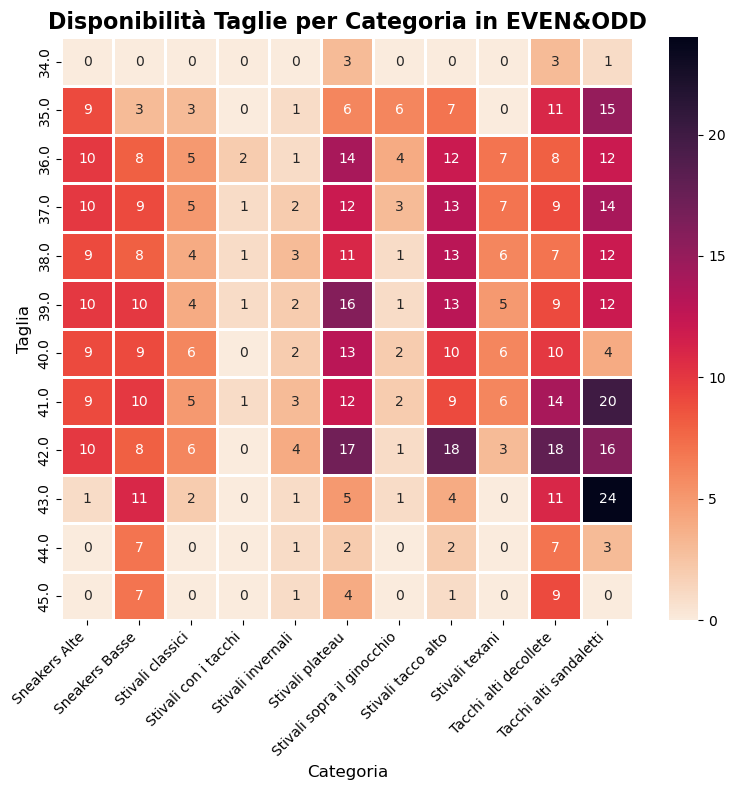

In [250]:
#Disponibilità Taglie per Categoria (EVEN)

pivot_table_even = analisitagliaevenpercategoria.unstack(level = 'categoria').fillna(0)
plt.figure(figsize = (8, 8))
sns.heatmap(pivot_table_even, annot = True, fmt = 'g', cmap = 'rocket_r', linewidths = 1)
plt.title('Disponibilità Taglie per Categoria in EVEN&ODD', fontsize = 16, fontweight = 'bold')
plt.xlabel('Categoria', fontsize = 12)
plt.ylabel('Taglia', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.savefig("pivot_table_even.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

In [252]:
#raggruppiamo per taglia e categoria e raccogliamo le categorie corrispondenti
categorieevenpertaglia = db_even.groupby('taglia')['categoria'].apply(lambda x: ", ".join(sorted(set(x)))).reset_index()

categorieevenpertaglia.columns = ['Taglia', 'Categorie corrispondenti'] #cambiamo nome alle colonne

pd.set_option('display.max_colwidth', None)  # Disabilita il troncamento
categorieevenpertaglia

Taglia  \
0     34.0   
1     35.0   
2     36.0   
3     37.0   
4     38.0   
5     39.0   
6     40.0   
7     41.0   
8     42.0   
9     43.0   
10    44.0   
11    45.0   

                                                                                                                                                                                                    Categorie corrispondenti  
0                                                                                                                                                             Stivali plateau, Tacchi alti decollete, Tacchi alti sandaletti  
1                                         Sneakers Alte, Sneakers Basse, Stivali classici, Stivali invernali, Stivali plateau, Stivali sopra il ginocchio, Stivali tacco alto, Tacchi alti decollete, Tacchi alti sandaletti  
2   Sneakers Alte, Sneakers Basse, Stivali classici, Stivali con i tacchi, Stivali invernali, Stivali plateau, Stivali sopra il ginocchio, Stivali tacco alto, Stivali texani, Tacchi alti decollete, Tacchi alti sandaletti  
3   Sneakers Alte, Sneakers Basse, Stivali classici, Stivali con i tacchi, Stivali invernali, Stivali plateau, Stivali sopra il ginocchio, Stivali tacco alto, Stivali texani, Tacchi alti decollete, Tacchi alti sandaletti  
4   Sneakers Alte, Sneakers Basse, Stivali classici, Stivali con i tacchi, Stivali invernali, Stivali plateau, Stivali sopra il ginocchio, Stivali tacco alto, Stivali texani, Tacchi alti decollete, Tacchi alti sandaletti  
5   Sneakers Alte, Sneakers Basse, Stivali classici, Stivali con i tacchi, Stivali invernali, Stivali plateau, Stivali sopra il ginocchio, Stivali tacco alto, Stivali texani, Tacchi alti decollete, Tacchi alti sandaletti  
6                         Sneakers Alte, Sneakers Basse, Stivali classici, Stivali invernali, Stivali plateau, Stivali sopra il ginocchio, Stivali tacco alto, Stivali texani, Tacchi alti decollete, Tacchi alti sandaletti  
7   Sneakers Alte, Sneakers Basse, Stivali classici, Stivali con i tacchi, Stivali invernali, Stivali plateau, Stivali sopra il ginocchio, Stivali tacco alto, Stivali texani, Tacchi alti decollete, Tacchi alti sandaletti  
8                         Sneakers Alte, Sneakers Basse, Stivali classici, Stivali invernali, Stivali plateau, Stivali sopra il ginocchio, Stivali tacco alto, Stivali texani, Tacchi alti decollete, Tacchi alti sandaletti  
9                                         Sneakers Alte, Sneakers Basse, Stivali classici, Stivali invernali, Stivali plateau, Stivali sopra il ginocchio, Stivali tacco alto, Tacchi alti decollete, Tacchi alti sandaletti  
10                                                                                                     Sneakers Basse, Stivali invernali, Stivali plateau, Stivali tacco alto, Tacchi alti decollete, Tacchi alti sandaletti  
11                                                                                                                             Sneakers Basse, Stivali invernali, Stivali plateau, Stivali tacco alto, Tacchi alti decollete

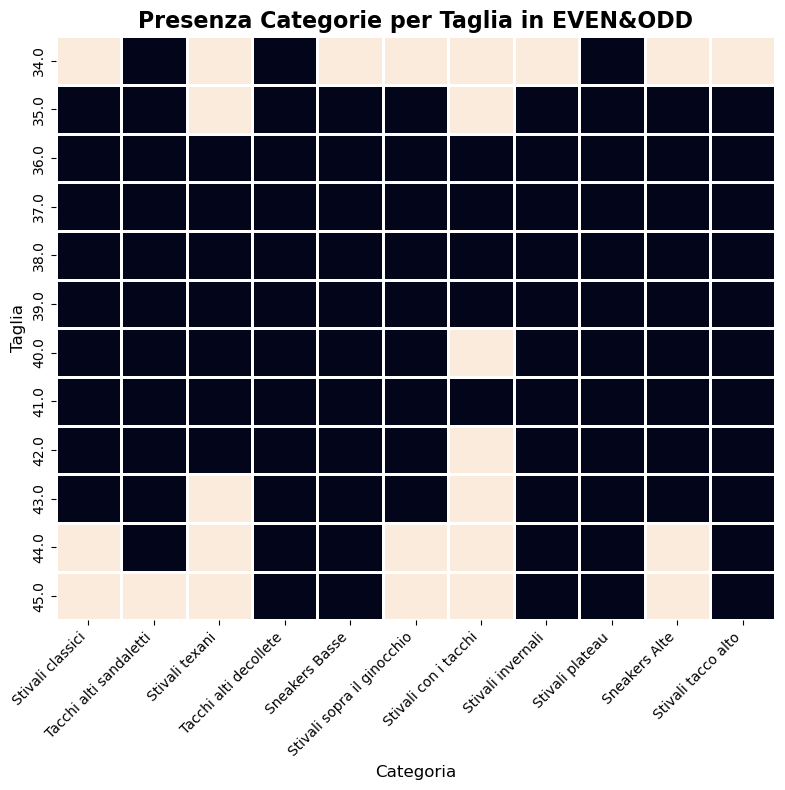

In [254]:
#Presenza categorie per Taglia in ALDO

#creiamo una matrice binaria (1 = categoria presente, 0 = assente)
categorie_lista = categorieevenpertaglia['Categorie corrispondenti'].str.split(', ')
categorie_uniche = list(set([cat for sublist in categorie_lista for cat in sublist]))

heatmap_data = []
for taglia in categorieevenpertaglia['Taglia']:
    categorie_taglia = categorieevenpertaglia.loc[categorieevenpertaglia['Taglia'] == taglia, 'Categorie corrispondenti'].iloc[0].split(', ')
    heatmap_data.append([1 if cat in categorie_taglia else 0 for cat in categorie_uniche])

heatmap_df_even = pd.DataFrame(heatmap_data, index=categorieevenpertaglia['Taglia'], columns = categorie_uniche)
plt.figure(figsize = (8, 8))
sns.heatmap(heatmap_df_even, cmap = 'rocket_r', cbar = False, linewidths = 1)
plt.title('Presenza Categorie per Taglia in EVEN&ODD', fontsize = 16, fontweight = 'bold')
plt.xlabel('Categoria', fontsize = 12)
plt.ylabel('Taglia', fontsize = 12)
plt.xticks(rotation = 45, ha ='right')
plt.tight_layout()
plt.savefig("heatmap_df_even.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

In [256]:
#raggruppiamo per categoria e calcoliamo il numero di taglie uniche per ogni categoria
conteggiotaglieevenpercategoria = db_even.groupby('categoria')['taglia'].nunique().reset_index()

conteggiotaglieevenpercategoria.columns = ['Categoria', 'Numero di taglie uniche'] #cambiamo nome alle colonne

conteggiotaglieevenpercategoria

Categoria  Numero di taglie uniche
0                Sneakers Alte                        9
1               Sneakers Basse                       11
2             Stivali classici                        9
3         Stivali con i tacchi                        5
4            Stivali invernali                       11
5              Stivali plateau                       12
6   Stivali sopra il ginocchio                        9
7           Stivali tacco alto                       11
8               Stivali texani                        7
9        Tacchi alti decollete                       12
10      Tacchi alti sandaletti                       11

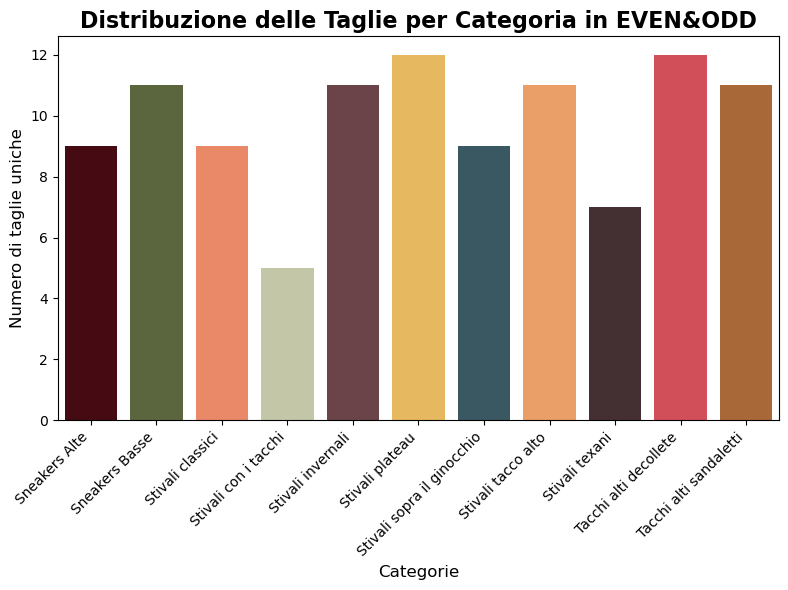

In [258]:
#Distribuzione delle Taglie per Categoria in EVEN&ODD

plt.figure(figsize = (8, 6))
sns.barplot(data = conteggiotaglieevenpercategoria, x = 'Categoria', y = 'Numero di taglie uniche', hue = 'Categoria', legend = False, palette = palette_even)
plt.xlabel('Categorie', fontsize = 12)
plt.ylabel('Numero di taglie uniche', fontsize = 12)
plt.title('Distribuzione delle Taglie per Categoria in EVEN&ODD', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.tight_layout()
plt.savefig("conteggiotaglieevenpercategoria.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

### TAMARIS

In [260]:
#raggruppiamo per taglia e categoria e contiamo le taglie disponibili
analisitagliatamarispercategoria = db_tamaris.groupby(['taglia', 'categoria'])['taglia'].count()

pd.set_option('display.max_rows', None)
analisitagliatamarispercategoria.to_frame()

taglia
taglia categoria                         
35.0   Sneakers Basse                   2
       Tacchi alti decollete            2
36.0   Sneakers Basse                  81
       Stivali classici                 9
       Stivali con i tacchi             1
       Stivali invernali               24
       Stivali plateau                  4
       Stivali sopra il ginocchio       1
       Stivali tacco alto               2
       Stivali texani                   1
       Tacchi alti decollete            4
       Tacchi alti sandaletti           4
37.0   Sneakers Alte                    3
       Sneakers Basse                  87
       Stivali classici                12
       Stivali con i tacchi             1
       Stivali invernali               24
       Stivali plateau                  7
       Stivali sopra il ginocchio       1
       Stivali tacco alto               2
       Stivali texani                   2
       Tacchi alti decollete            4
       Tacchi alti sandaletti           9
38.0   Sneakers Alte                    2
       Sneakers Basse                  89
       Stivali classici                 9
       Stivali con i tacchi             1
       Stivali invernali               17
       Stivali plateau                  9
       Stivali sopra il ginocchio       1
       Stivali tacco alto               1
       Stivali texani                   2
       Tacchi alti decollete            6
       Tacchi alti sandaletti           7
39.0   Sneakers Alte                    3
       Sneakers Basse                  86
       Stivali classici                 8
       Stivali con i tacchi             1
       Stivali invernali               18
       Stivali plateau                  6
       Stivali sopra il ginocchio       1
       Stivali tacco alto               3
       Stivali texani                   2
       Tacchi alti decollete            6
       Tacchi alti sandaletti          14
40.0   Sneakers Alte                    2
       Sneakers Basse                  84
       Stivali classici                 6
       Stivali invernali               17
       Stivali plateau                  9
       Stivali sopra il ginocchio       1
       Stivali tacco alto               5
       Stivali texani                   2
       Tacchi alti decollete            8
       Tacchi alti sandaletti          13
41.0   Sneakers Alte                    1
       Sneakers Basse                  70
       Stivali classici                 6
       Stivali con i tacchi             1
       Stivali invernali               17
       Stivali plateau                  7
       Stivali sopra il ginocchio       1
       Stivali tacco alto               5
       Stivali texani                   1
       Tacchi alti decollete            3
       Tacchi alti sandaletti          13
42.0   Sneakers Alte                    1
       Sneakers Basse                  55
       Stivali classici                 1
       Stivali invernali               23
       Stivali plateau                  5
       Stivali sopra il ginocchio       1
       Tacchi alti sandaletti           5
43.0   Stivali plateau                  1
44.0   Stivali invernali                1
45.0   Stivali invernali                1

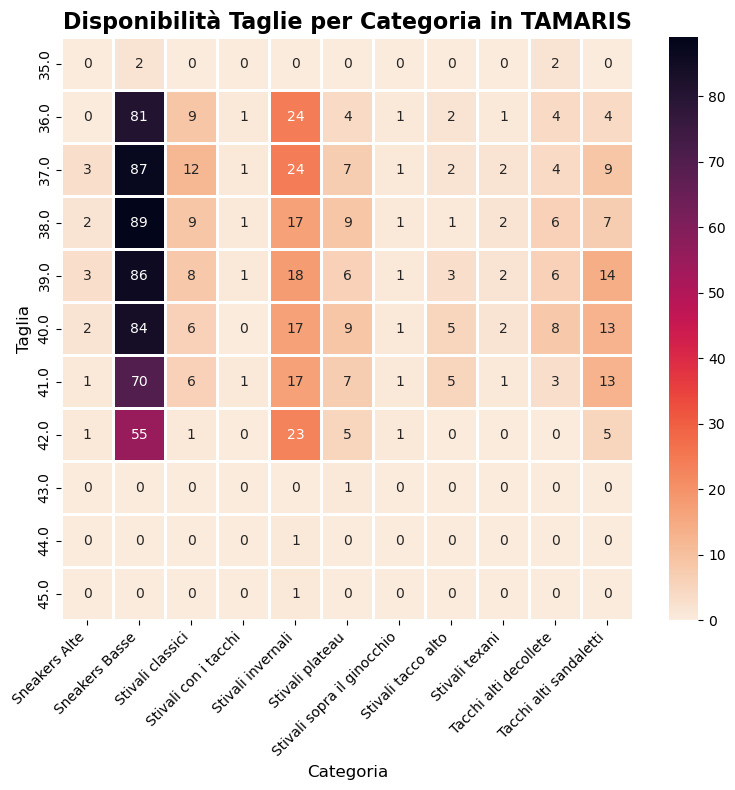

In [262]:
#Disponibilità Taglie per Categoria (TAMARIS)

pivot_table_tamaris = analisitagliatamarispercategoria.unstack(level = 'categoria').fillna(0)
plt.figure(figsize = (8, 8))
sns.heatmap(pivot_table_tamaris, annot = True, fmt = 'g', cmap = 'rocket_r', linewidths = 1)
plt.title('Disponibilità Taglie per Categoria in TAMARIS', fontsize = 16, fontweight = 'bold')
plt.xlabel('Categoria', fontsize = 12)
plt.ylabel('Taglia', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.savefig("pivot_table_tamaris.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

In [264]:
#raggruppiamo per taglia e categoria e raccogliamo le categorie corrispondenti
categorietamarispertaglia = db_tamaris.groupby('taglia')['categoria'].apply(lambda x: ", ".join(sorted(set(x)))).reset_index()

categorietamarispertaglia.columns = ['Taglia', 'Categorie corrispondenti'] #cambiamo nome alle colonne

pd.set_option('display.max_colwidth', None)  # Disabilita il troncamento
categorietamarispertaglia

Taglia  \
0     35.0   
1     36.0   
2     37.0   
3     38.0   
4     39.0   
5     40.0   
6     41.0   
7     42.0   
8     43.0   
9     44.0   
10    45.0   

                                                                                                                                                                                                    Categorie corrispondenti  
0                                                                                                                                                                                      Sneakers Basse, Tacchi alti decollete  
1                  Sneakers Basse, Stivali classici, Stivali con i tacchi, Stivali invernali, Stivali plateau, Stivali sopra il ginocchio, Stivali tacco alto, Stivali texani, Tacchi alti decollete, Tacchi alti sandaletti  
2   Sneakers Alte, Sneakers Basse, Stivali classici, Stivali con i tacchi, Stivali invernali, Stivali plateau, Stivali sopra il ginocchio, Stivali tacco alto, Stivali texani, Tacchi alti decollete, Tacchi alti sandaletti  
3   Sneakers Alte, Sneakers Basse, Stivali classici, Stivali con i tacchi, Stivali invernali, Stivali plateau, Stivali sopra il ginocchio, Stivali tacco alto, Stivali texani, Tacchi alti decollete, Tacchi alti sandaletti  
4   Sneakers Alte, Sneakers Basse, Stivali classici, Stivali con i tacchi, Stivali invernali, Stivali plateau, Stivali sopra il ginocchio, Stivali tacco alto, Stivali texani, Tacchi alti decollete, Tacchi alti sandaletti  
5                         Sneakers Alte, Sneakers Basse, Stivali classici, Stivali invernali, Stivali plateau, Stivali sopra il ginocchio, Stivali tacco alto, Stivali texani, Tacchi alti decollete, Tacchi alti sandaletti  
6   Sneakers Alte, Sneakers Basse, Stivali classici, Stivali con i tacchi, Stivali invernali, Stivali plateau, Stivali sopra il ginocchio, Stivali tacco alto, Stivali texani, Tacchi alti decollete, Tacchi alti sandaletti  
7                                                                                    Sneakers Alte, Sneakers Basse, Stivali classici, Stivali invernali, Stivali plateau, Stivali sopra il ginocchio, Tacchi alti sandaletti  
8                                                                                                                                                                                                            Stivali plateau  
9                                                                                                                                                                                                          Stivali invernali  
10                                                                                                                                                                                                         Stivali invernali

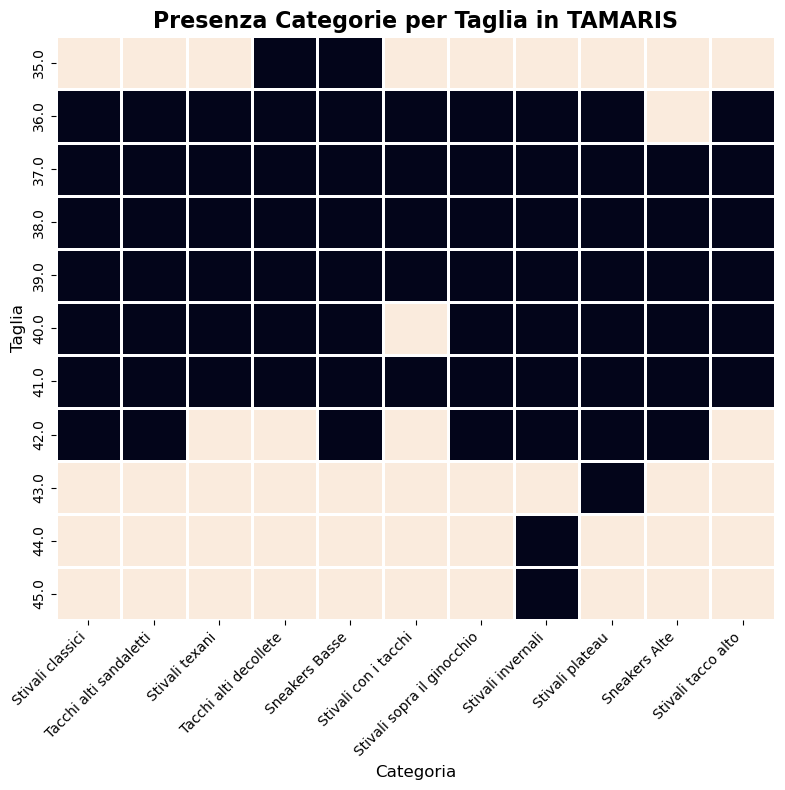

In [266]:
#Presenza Categorie per Taglia in TAMARIS

#creiamo una matrice binaria (1 = categoria presente, 0 = assente)
categorie_lista = categorietamarispertaglia['Categorie corrispondenti'].str.split(', ')
categorie_uniche = list(set([cat for sublist in categorie_lista for cat in sublist]))

heatmap_data = []
for taglia in categorietamarispertaglia['Taglia']:
    categorie_taglia = categorietamarispertaglia.loc[categorietamarispertaglia['Taglia'] == taglia, 'Categorie corrispondenti'].iloc[0].split(', ')
    heatmap_data.append([1 if cat in categorie_taglia else 0 for cat in categorie_uniche])

heatmap_df_tamaris = pd.DataFrame(heatmap_data, index=categorietamarispertaglia['Taglia'], columns = categorie_uniche)
plt.figure(figsize = (8, 8))
sns.heatmap( heatmap_df_tamaris, cmap = 'rocket_r', cbar = False, linewidths = 1)
plt.title('Presenza Categorie per Taglia in TAMARIS', fontsize = 16, fontweight = 'bold')
plt.xlabel('Categoria', fontsize = 12)
plt.ylabel('Taglia', fontsize = 12)
plt.xticks(rotation = 45, ha ='right')
plt.tight_layout()
plt.savefig("heatmap_df_tamaris.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

In [268]:
#raggruppiamo per categoria e calcoliamo il numero di taglie uniche per ogni categoria
conteggiotaglietamarispercategoria = db_tamaris.groupby('categoria')['taglia'].nunique().reset_index()

conteggiotaglietamarispercategoria.columns = ['Categoria', 'Numero di taglie uniche'] #cambiamo nome alle colonne

conteggiotaglietamarispercategoria

Categoria  Numero di taglie uniche
0                Sneakers Alte                        6
1               Sneakers Basse                        8
2             Stivali classici                        7
3         Stivali con i tacchi                        5
4            Stivali invernali                        9
5              Stivali plateau                        8
6   Stivali sopra il ginocchio                        7
7           Stivali tacco alto                        6
8               Stivali texani                        6
9        Tacchi alti decollete                        7
10      Tacchi alti sandaletti                        7

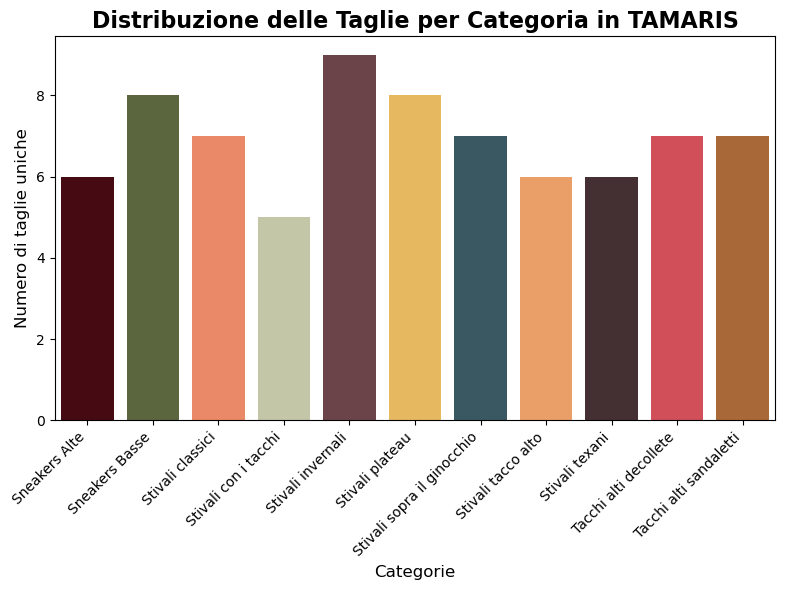

In [270]:
#Distribuzione delle Taglie per Categoria in TAMARIS

plt.figure(figsize = (8, 6))
sns.barplot(data = conteggiotaglietamarispercategoria, x = 'Categoria', y = 'Numero di taglie uniche', hue = 'Categoria', legend = False, palette = palette_tamaris)
plt.xlabel('Categorie', fontsize = 12)
plt.ylabel('Numero di taglie uniche', fontsize = 12)
plt.title('Distribuzione delle Taglie per Categoria in TAMARIS', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.tight_layout()
plt.savefig("conteggiotaglietamarispercategoria.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

### ZIGN

In [273]:
#raggruppiamo per taglia e categoria e contiamo le taglie disponibili
analisitagliazignpercategoria = db_zign.groupby(['taglia', 'categoria'])['taglia'].count()

pd.set_option('display.max_rows', None)
analisitagliazignpercategoria.to_frame()

taglia
taglia categoria                     
35.0   Stivali classici             2
       Stivali con i tacchi         1
       Stivali invernali            2
       Stivali plateau              2
       Stivali texani               2
       Tacchi alti decollete        1
36.0   Stivali classici             4
       Stivali con i tacchi         3
       Stivali invernali            5
       Stivali plateau              6
       Stivali tacco alto           5
       Stivali texani               2
       Tacchi alti decollete        2
37.0   Stivali classici             4
       Stivali con i tacchi         2
       Stivali invernali            5
       Stivali plateau              5
       Stivali tacco alto           5
       Stivali texani               1
       Tacchi alti decollete        2
38.0   Stivali classici             8
       Stivali con i tacchi         3
       Stivali invernali            3
       Stivali plateau              4
       Stivali tacco alto           6
       Stivali texani               1
       Tacchi alti decollete        3
39.0   Stivali classici             3
       Stivali con i tacchi         2
       Stivali invernali            3
       Stivali plateau              2
       Stivali tacco alto           5
       Tacchi alti decollete        3
40.0   Stivali classici             4
       Stivali invernali            3
       Stivali plateau              2
       Stivali tacco alto           3
       Stivali texani               2
       Tacchi alti decollete        2
41.0   Stivali classici             6
       Stivali con i tacchi         2
       Stivali invernali            2
       Stivali plateau              4
       Stivali tacco alto           5
       Stivali texani               3
       Tacchi alti decollete        1
42.0   Stivali classici             4
       Stivali invernali            4
       Stivali plateau              2
       Stivali tacco alto           6
       Stivali texani               2
       Tacchi alti decollete        2
       Tacchi alti sandaletti       1
43.0   Stivali invernali            3
       Tacchi alti decollete        1
44.0   Stivali invernali            3
       Tacchi alti decollete        1
45.0   Stivali invernali            4
       Tacchi alti decollete        1

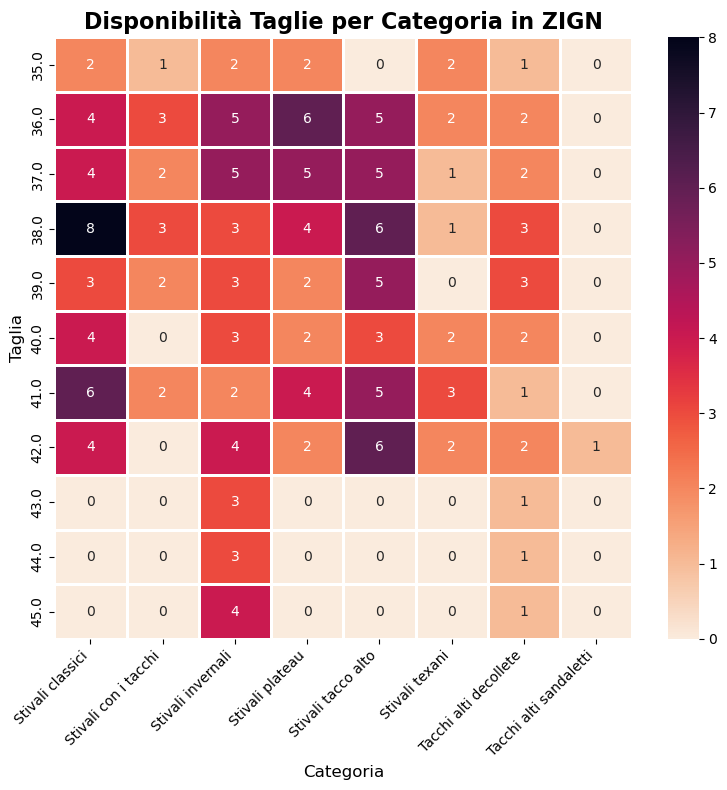

In [275]:
#Disponibilità Taglie per Categoria (ZIGN)

pivot_table_zign = analisitagliazignpercategoria.unstack(level = 'categoria').fillna(0)
plt.figure(figsize = (8, 8))
sns.heatmap(pivot_table_zign, annot = True, fmt = 'g', cmap = 'rocket_r', linewidths = 1)
plt.title('Disponibilità Taglie per Categoria in ZIGN', fontsize = 16, fontweight = 'bold')
plt.xlabel('Categoria', fontsize = 12)
plt.ylabel('Taglia', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.savefig("pivot_table_zign.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

In [277]:
#raggruppiamo per taglia e categoria e raccogliamo le categorie corrispondenti
categoriezignpertaglia = db_zign.groupby('taglia')['categoria'].apply(lambda x: ", ".join(sorted(set(x)))).reset_index()

categoriezignpertaglia.columns = ['Taglia', 'Categorie corrispondenti'] #cambiamo nome alle colonne

pd.set_option('display.max_colwidth', None)  # Disabilita il troncamento
categoriezignpertaglia

Taglia  \
0     35.0   
1     36.0   
2     37.0   
3     38.0   
4     39.0   
5     40.0   
6     41.0   
7     42.0   
8     43.0   
9     44.0   
10    45.0   

                                                                                                                   Categorie corrispondenti  
0                         Stivali classici, Stivali con i tacchi, Stivali invernali, Stivali plateau, Stivali texani, Tacchi alti decollete  
1     Stivali classici, Stivali con i tacchi, Stivali invernali, Stivali plateau, Stivali tacco alto, Stivali texani, Tacchi alti decollete  
2     Stivali classici, Stivali con i tacchi, Stivali invernali, Stivali plateau, Stivali tacco alto, Stivali texani, Tacchi alti decollete  
3     Stivali classici, Stivali con i tacchi, Stivali invernali, Stivali plateau, Stivali tacco alto, Stivali texani, Tacchi alti decollete  
4                     Stivali classici, Stivali con i tacchi, Stivali invernali, Stivali plateau, Stivali tacco alto, Tacchi alti decollete  
5                           Stivali classici, Stivali invernali, Stivali plateau, Stivali tacco alto, Stivali texani, Tacchi alti decollete  
6     Stivali classici, Stivali con i tacchi, Stivali invernali, Stivali plateau, Stivali tacco alto, Stivali texani, Tacchi alti decollete  
7   Stivali classici, Stivali invernali, Stivali plateau, Stivali tacco alto, Stivali texani, Tacchi alti decollete, Tacchi alti sandaletti  
8                                                                                                  Stivali invernali, Tacchi alti decollete  
9                                                                                                  Stivali invernali, Tacchi alti decollete  
10                                                                                                 Stivali invernali, Tacchi alti decollete

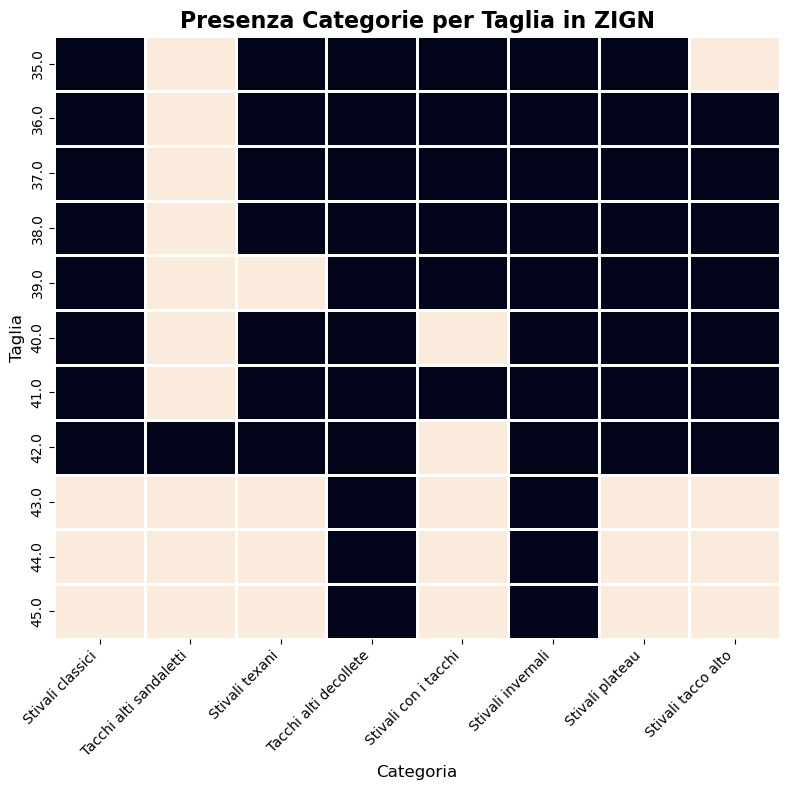

In [279]:
#Presenza categorie per Taglia in ZIGN

#creiamo una matrice binaria (1 = categoria presente, 0 = assente)
categorie_lista = categoriezignpertaglia['Categorie corrispondenti'].str.split(', ')
categorie_uniche = list(set([cat for sublist in categorie_lista for cat in sublist]))

heatmap_data = []
for taglia in categoriezignpertaglia['Taglia']:
    categorie_taglia = categoriezignpertaglia.loc[categoriezignpertaglia['Taglia'] == taglia, 'Categorie corrispondenti'].iloc[0].split(', ')
    heatmap_data.append([1 if cat in categorie_taglia else 0 for cat in categorie_uniche])

heatmap_df_zign = pd.DataFrame(heatmap_data, index=categoriezignpertaglia['Taglia'], columns = categorie_uniche)
plt.figure(figsize = (8, 8))
sns.heatmap(heatmap_df_zign, cmap = 'rocket_r', cbar = False, linewidths = 1)
plt.title('Presenza Categorie per Taglia in ZIGN', fontsize = 16, fontweight = 'bold')
plt.xlabel('Categoria', fontsize = 12)
plt.ylabel('Taglia', fontsize = 12)
plt.xticks(rotation = 45, ha ='right')
plt.tight_layout()
plt.savefig("heatmap_df_zign.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

In [281]:
#raggruppiamo per categoria e calcoliamo il numero di taglie uniche per ogni categoria
conteggiotagliezignpercategoria = db_zign.groupby('categoria')['taglia'].nunique().reset_index()

conteggiotagliezignpercategoria.columns = ['Categoria', 'Numero di taglie uniche'] #cambiamo nome alle colonne

conteggiotagliezignpercategoria

Categoria  Numero di taglie uniche
0        Stivali classici                        8
1    Stivali con i tacchi                        6
2       Stivali invernali                       11
3         Stivali plateau                        8
4      Stivali tacco alto                        7
5          Stivali texani                        7
6   Tacchi alti decollete                       11
7  Tacchi alti sandaletti                        1

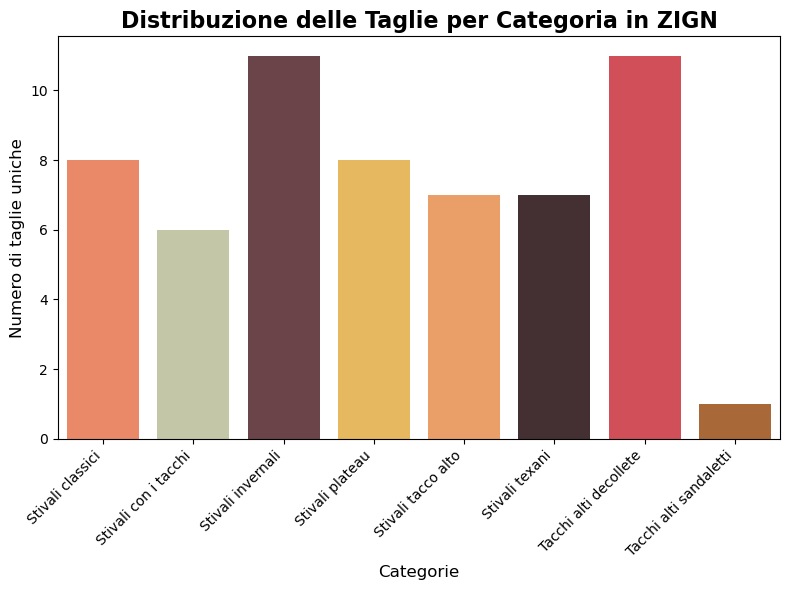

In [283]:
#Distribuzione delle Taglie per Categoria in ZIGN
plt.figure(figsize = (8, 6))

sns.barplot(data = conteggiotagliezignpercategoria, x = 'Categoria', y = 'Numero di taglie uniche', hue = 'Categoria', legend = False, palette = palette_zign)
plt.xlabel('Categorie', fontsize = 12)
plt.ylabel('Numero di taglie uniche', fontsize = 12)
plt.title('Distribuzione delle Taglie per Categoria in ZIGN', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.tight_layout()
plt.savefig("conteggiotagliezignpercategoria.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()

### COMPLESSIVO

In [286]:
#raggruppiamo per brand, taglia e categoria e contiamo il numero di prodotti disponobili
analisimarchetagliacategoria = db_scarpe.groupby(['marca', 'taglia','categoria'])['nome_prodotto'].count()

pd.set_option('display.max_rows', None)
analisimarchetagliacategoria.to_frame()

nome_prodotto
marca    taglia categoria                                
ALDO     35.0   Sneakers Basse                         15
                Stivali classici                        3
                Stivali sopra il ginocchio              2
                Stivali tacco alto                      4
                Tacchi alti decollete                  10
                Tacchi alti sandaletti                  7
         36.0   Sneakers Basse                         17
                Stivali classici                        1
                Stivali invernali                       1
                Stivali sopra il ginocchio              1
                Stivali tacco alto                      3
                Stivali texani                          1
                Tacchi alti decollete                  10
                Tacchi alti sandaletti                  2
         37.0   Sneakers Basse                         15
                Stivali classici                        2
                Stivali tacco alto                      3
                Tacchi alti decollete                   9
                Tacchi alti sandaletti                  3
         37.5   Sneakers Basse                         20
                Stivali sopra il ginocchio              1
                Stivali tacco alto                      1
                Tacchi alti decollete                   8
                Tacchi alti sandaletti                 20
         38.0   Sneakers Basse                         14
                Stivali classici                        3
                Stivali invernali                       1
                Stivali sopra il ginocchio              2
                Stivali tacco alto                      3
                Tacchi alti decollete                   8
                Tacchi alti sandaletti                 19
         38.5   Sneakers Basse                         21
                Stivali invernali                       1
                Stivali tacco alto                      2
                Stivali texani                          1
                Tacchi alti decollete                  10
                Tacchi alti sandaletti                 21
         39.0   Sneakers Basse                         13
                Stivali classici                        2
                Stivali invernali                       1
                Stivali tacco alto                      2
                Tacchi alti decollete                   6
                Tacchi alti sandaletti                 13
         40.0   Sneakers Basse                         18
                Stivali classici                        3
                Stivali invernali                       2
                Stivali tacco alto                      5
                Stivali texani                          1
                Tacchi alti decollete                   4
                Tacchi alti sandaletti                  3
         41.0   Sneakers Basse                          7
                Stivali classici                        2
                Stivali invernali                      17
                Stivali plateau                         1
                Stivali sopra il ginocchio              2
                Stivali tacco alto                      4
                Tacchi alti decollete                   6
                Tacchi alti sandaletti                 11
         42.5   Sneakers Basse                         22
                Stivali classici                        1
                Stivali invernali                       1
                Stivali tacco alto                      5
                Tacchi alti decollete                  23
                Tacchi alti sandaletti                 36
         44.0   Stivali tacco alto                     15
                Tacchi alti sandaletti                  1
EVEN&ODD 34.0   Stivali plateau                         3
                Tacchi alti decollete     

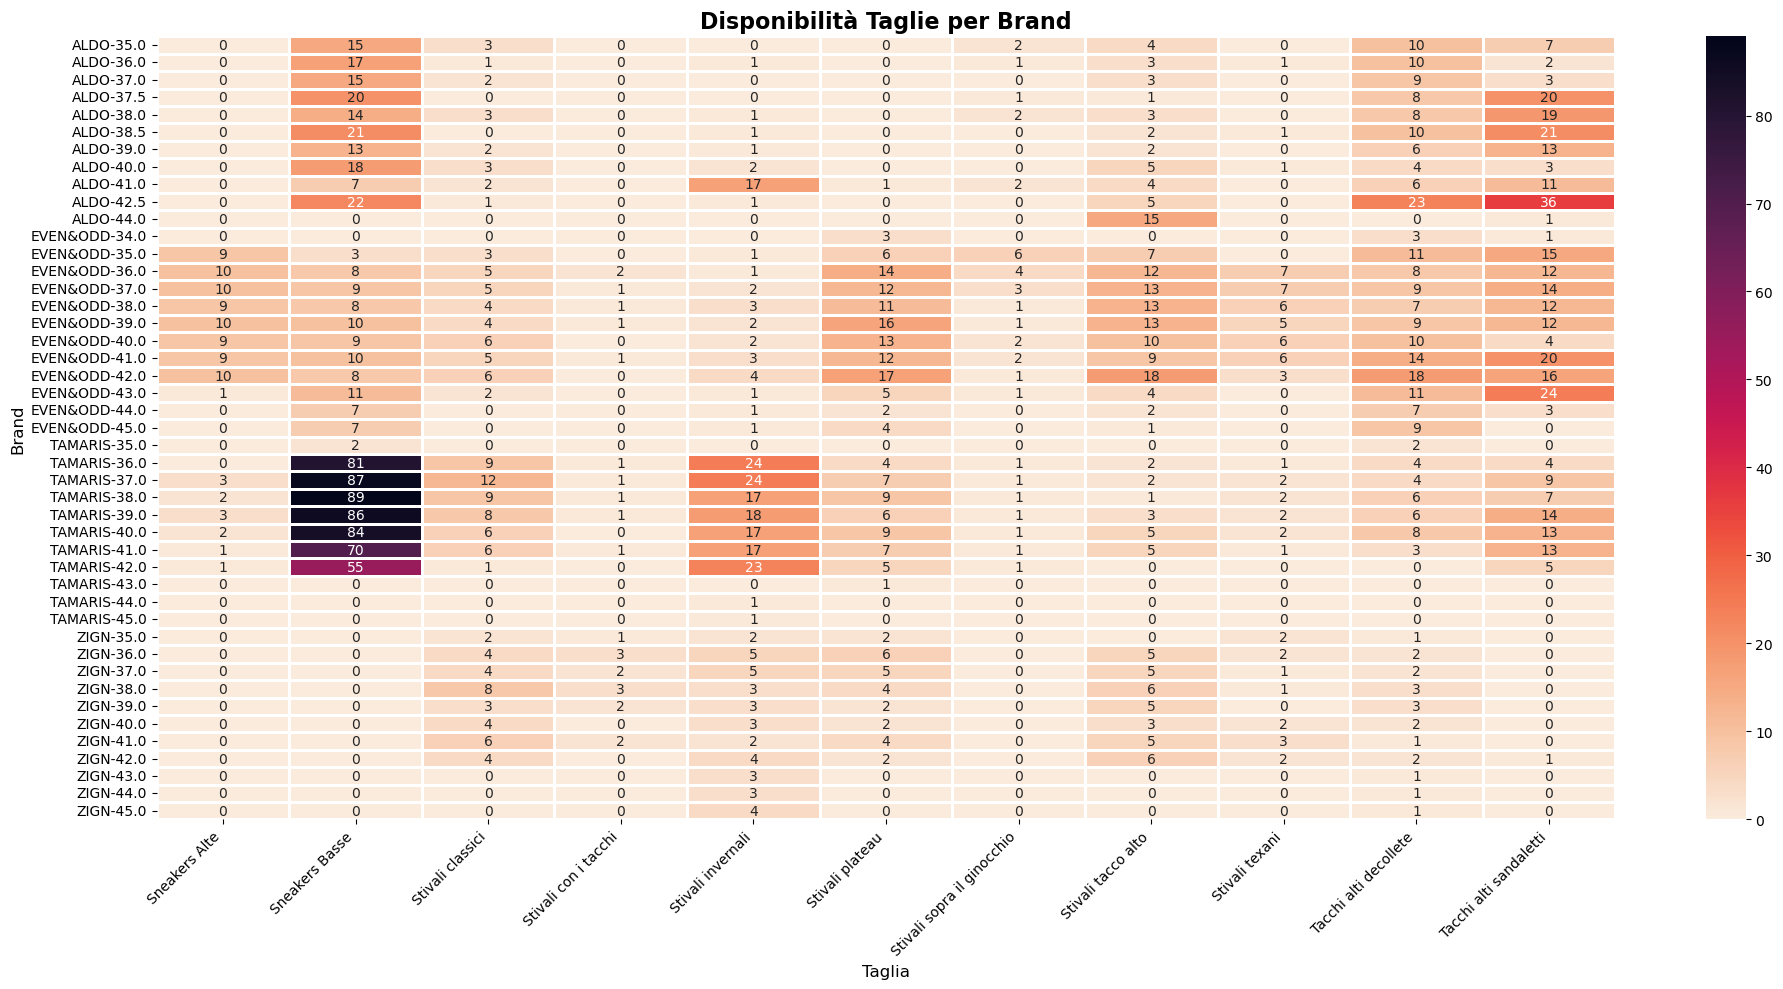

In [288]:
#Disponibilità Taglie per Brand

#tabella pivot
pivot_table_marca_taglia_categoria = analisimarchetagliacategoria.unstack(level = 'categoria').fillna(0)

plt.figure(figsize = (20, 10))
sns.heatmap(pivot_table_marca_taglia_categoria, annot = True, fmt = 'g', cmap = 'rocket_r', linewidths = 1)
plt.title('Disponibilità Taglie per Brand', fontsize = 16, fontweight = 'bold')
plt.xlabel('Taglia', fontsize = 12)
plt.ylabel('Brand', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.tight_layout()
plt.savefig("pivot_table_marca_taglia_categoria.png", dpi = 300, bbox_inches = 'tight')  #salvataggio grafico come immagine
plt.show()